<a href="https://colab.research.google.com/github/DSteinmann/HSG-AIML-CC/blob/KP/Traings_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -r /content/requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 71.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 122.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 134.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 134.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
!pip install numpy

In [2]:
!pip install torch==2.7.0 torchvision==0.22.0 torchaudio==2.7.0 --index-url https://download.pytorch.org/whl/cu118



Looking in indexes: https://download.pytorch.org/whl/cu118
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 90.2 MB/s eta 0:00:00
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.6.0+cu124
    Uninstalling torchaudio-2.6.0+cu124:
      Successfully uninstalled torchaudio-2.6.0+cu124


In [3]:
!pip show torch

Name: torch
Version: 2.7.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-cufile-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchdata, torchvision


In [4]:
!pip install rasterio

In [18]:
import sys
sys.argv = ['train.py', '--config', '/content/config_track1.yaml']

import argparse
parser = argparse.ArgumentParser(description='Train ResNet model for EuroSAT classification.')
parser.add_argument('--config', type=str, required=True, help='Path to the YAML configuration file.')
args, unknown = parser.parse_known_args()


In [6]:
!pip install -q kaggle

In [13]:
!ls -la /root/.config/kaggle/



total 8
drwxr-xr-x 2 root root 4096 May 16 15:08 .
drwxr-xr-x 1 root root 4096 May 16 15:08 ..


In [7]:
from google.colab import files

# 1. Hochladen der kaggle.json Datei (diese musst du zuvor von Kaggle heruntergeladen haben)
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kevinpfister99","key":"ad7b2c0ff831f3ffa2ee45aa13513935"}'}

In [8]:
!mkdir -p /root/.config/kaggle
!cp "kaggle.json" /root/.config/kaggle/kaggle.json
!chmod 600 /root/.config/kaggle/kaggle.json


In [9]:
!wget --no-check-certificate https://madm.dfki.de/files/sentinel/EuroSATallBands.zip -O EuroSAT_MS.zip


--2025-05-17 13:20:51--  https://madm.dfki.de/files/sentinel/EuroSATallBands.zip
Resolving madm.dfki.de (madm.dfki.de)... 131.246.195.183
Connecting to madm.dfki.de (madm.dfki.de)|131.246.195.183|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 2067725275 (1.9G) [application/zip]
Saving to: ‘EuroSAT_MS.zip’

EuroSAT_MS.zip      100%[===================>]   1.92G  19.9MB/s    in 1m 43s  

2025-05-17 13:22:35 (19.2 MB/s) - ‘EuroSAT_MS.zip’ saved [2067725275/2067725275]



In [21]:
# 4. Wettbewerb herunterladen (nur wenn du beigetreten bist!)
!kaggle competitions download -c 8-860-1-00-coding-challenge-2025


 85% 256M/303M [00:00<00:00, 1.34GB/s]
100% 303M/303M [00:00<00:00, 1.33GB/s]


In [10]:
import zipfile

with zipfile.ZipFile("EuroSAT_MS.zip", 'r') as zip_ref:
    zip_ref.extractall("training_data")


In [1]:
!pip install numpy==1.23.5 pandas==1.4.4 --force-reinstall



  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached pandas-1.4.4-cp311-cp311-linux_x86_64.whl
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: numpy
    Found existing installation:

Loaded configuration from: /content/config_track1.yaml
Using device: cuda
AMP Enabled: True
Random seed set to 1337
Using BAND_MAP_12 reflecting standard order: {'B1_Coastal': 0, 'B2_Blue': 1, 'B3_Green': 2, 'B4_Red': 3, 'B5_RE1': 4, 'B6_RE2': 5, 'B7_RE3': 6, 'B8_NIR': 7, 'B8A_NIR2': 8, 'B9_WV': 9, 'B11_SWIR1': 10, 'B12_SWIR2': 11}
Scanning training directory and creating dataset splits...
Found 27000 training paths in 10 classes: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
Class mapping: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}
Creating Sentinel2Dataset instances...
Initialized Sentinel2Dataset with 24300 samples. Output channels: 16
Initialized Sentinel2Dataset with 2700 samples. Output channels: 16
Train and Validation DataLoaders created.
Loading resnet50 architectur


    Epoch 69 Validation Summary: Loss: 168.0163 | Accuracy: 0.0926 | Duration: 7.28s
Confusion Matrix (Before SWA):
[[  0   0   0 300   0   0   0   0   0   0]
 [  0   0   0 300   0   0   0   0   0   0]
 [  0   0   0 300   0   0   0   0   0   0]
 [  0   0   0 250   0   0   0   0   0   0]
 [  0   0   0 250   0   0   0   0   0   0]
 [  0   0   0 200   0   0   0   0   0   0]
 [  0   0   0 250   0   0   0   0   0   0]
 [  0   0   0 300   0   0   0   0   0   0]
 [  0   0   0 250   0   0   0   0   0   0]
 [  0   0   0 300   0   0   0   0   0   0]]


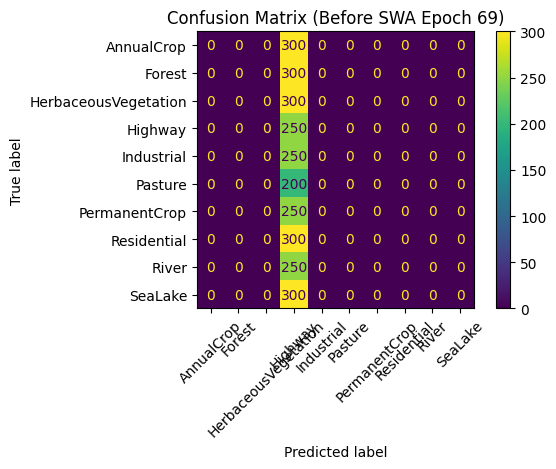

---> Training Epoch 1/150 | Target LR: 5.0000e-04



    Epoch 1 Training Summary: Loss: 1.8956 | Accuracy: 0.2951 | Final LR: 2.0032e-04 | Duration: 69.73s
---> Validation Epoch 1/150



    Epoch 1 Validation Summary: Loss: 1.4176 | Accuracy: 0.6744 | Duration: 6.10s
---> Best non-SWA model state saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_best_non_swa.pth

--- Konfusionsmatrix nach letzter Epoche (1) ---
---> Validation Epoch 1/150



    Epoch 1 Validation Summary: Loss: 1.4176 | Accuracy: 0.6744 | Duration: 6.57s
Konfusionsmatrix (normalisiert auf Zeilen):
[[84.    0.33  0.    0.67  1.    5.    3.    0.    2.67  3.33]
 [ 0.   84.67  0.    0.    0.    2.    0.67 10.    2.    0.67]
 [12.   17.33  5.67  0.67  4.   16.67 30.67  2.67  7.67  2.67]
 [10.8   2.4   0.   14.4   5.2   4.4  10.   10.   42.    0.8 ]
 [ 2.    0.    0.    2.8  72.8   0.    6.   11.2   5.2   0.  ]
 [ 3.5   7.    0.    0.    0.   68.    7.5   2.5   9.    2.5 ]
 [21.6   4.4   0.8   1.6   1.6   9.6  57.6   0.8   1.2   0.8 ]
 [ 0.    0.67  0.    1.33  0.    0.33  0.67 95.67  1.33  0.  ]
 [ 0.4   0.4   0.    0.4   0.8   0.4   0.    0.   96.4   1.2 ]
 [ 0.    5.67  0.    0.    0.33  0.67  0.    1.    1.67 90.67]]


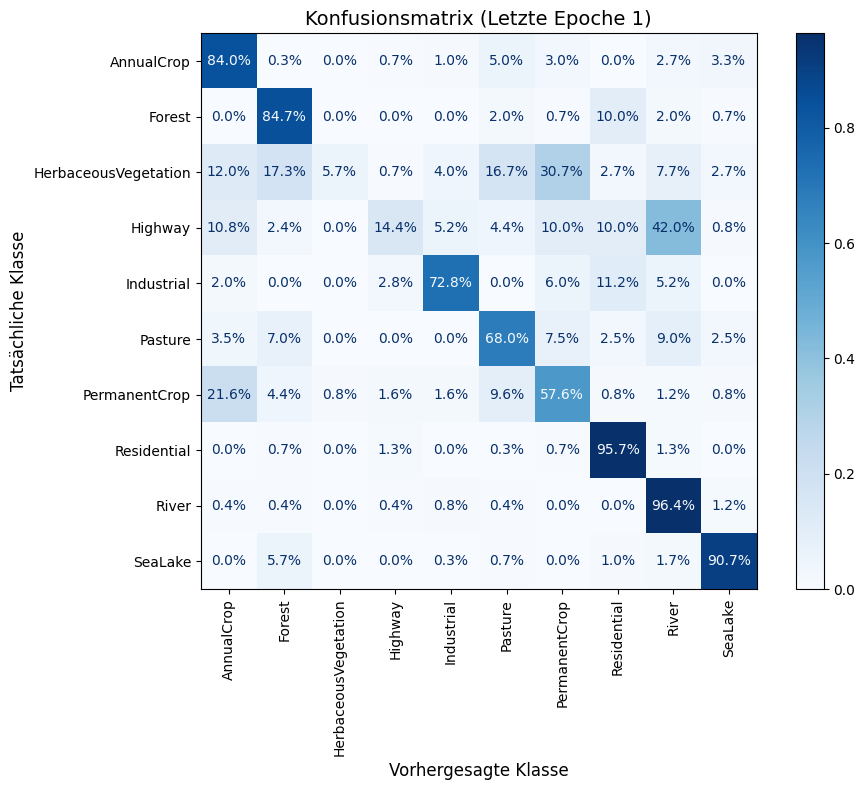

---> Training Epoch 2/150 | Target LR: 5.0000e-04



    Epoch 2 Training Summary: Loss: 1.3370 | Accuracy: 0.4522 | Final LR: 3.0030e-04 | Duration: 69.35s
---> Validation Epoch 2/150



    Epoch 2 Validation Summary: Loss: 0.8546 | Accuracy: 0.8841 | Duration: 6.44s
---> Best non-SWA model state saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_best_non_swa.pth

--- Konfusionsmatrix nach letzter Epoche (2) ---
---> Validation Epoch 2/150



    Epoch 2 Validation Summary: Loss: 0.8546 | Accuracy: 0.8841 | Duration: 6.26s
Konfusionsmatrix (normalisiert auf Zeilen):
[[95.67  1.    1.33  0.33  0.    0.33  0.67  0.33  0.    0.33]
 [ 0.33 95.33  2.    0.    0.    0.67  0.    0.33  0.    1.33]
 [ 2.67  0.33 77.67  5.    2.    0.33  6.33  3.67  1.    1.  ]
 [ 1.6   0.4   2.4  83.6   2.4   0.    1.6   4.4   3.6   0.  ]
 [ 0.    0.    0.    4.   92.4   0.    0.4   3.2   0.    0.  ]
 [11.5   2.5   3.    0.    0.   77.5   1.5   0.    4.    0.  ]
 [ 9.2   0.   12.    4.    0.8   0.8  72.    0.8   0.4   0.  ]
 [ 0.    0.    0.    1.    1.67  0.    0.33 97.    0.    0.  ]
 [ 0.    0.    0.4   1.2   0.4   0.8   0.    0.   96.4   0.8 ]
 [ 0.    0.    4.    3.    0.    0.    0.    0.67  1.   91.33]]


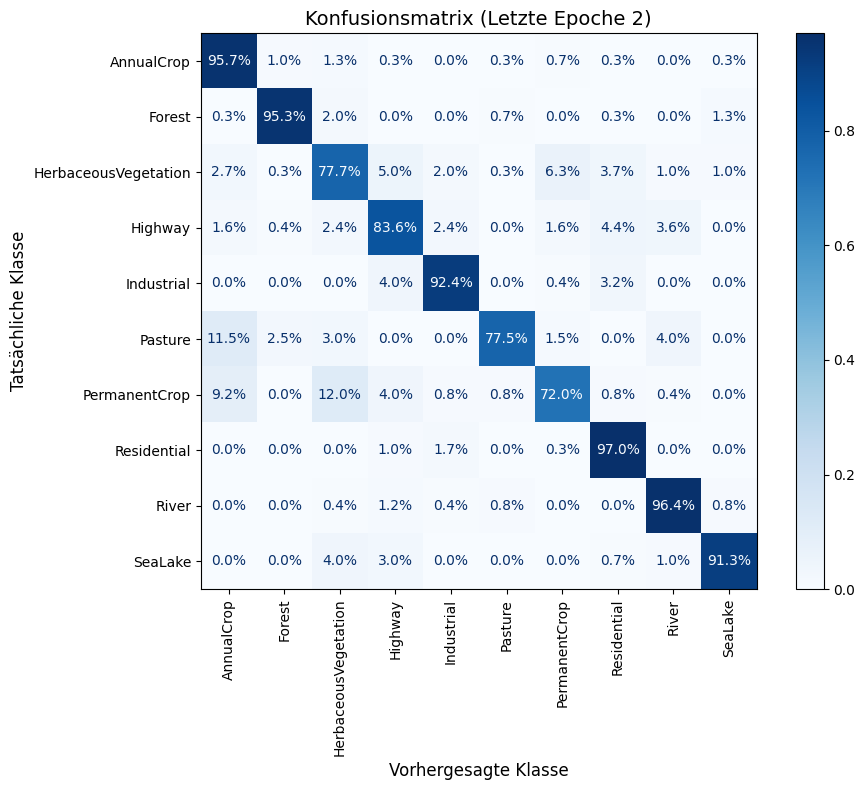

---> Training Epoch 3/150 | Target LR: 5.0000e-04



    Epoch 3 Training Summary: Loss: 1.1615 | Accuracy: 0.5161 | Final LR: 4.0028e-04 | Duration: 69.36s
---> Validation Epoch 3/150



    Epoch 3 Validation Summary: Loss: 0.7999 | Accuracy: 0.9026 | Duration: 6.26s
---> Best non-SWA model state saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_best_non_swa.pth

--- Konfusionsmatrix nach letzter Epoche (3) ---
---> Validation Epoch 3/150



    Epoch 3 Validation Summary: Loss: 0.7999 | Accuracy: 0.9026 | Duration: 6.33s
Konfusionsmatrix (normalisiert auf Zeilen):
[[92.    0.33  1.33  1.    0.    0.33  4.33  0.    0.    0.67]
 [ 0.33 93.33  1.33  0.    0.    3.33  0.    0.    0.    1.67]
 [ 4.33  0.   88.    0.67  0.67  0.67  3.67  0.    0.33  1.67]
 [ 6.4   0.    1.2  82.4   2.8   0.8   0.8   1.6   4.    0.  ]
 [ 0.4   0.    0.8   2.   95.6   0.    0.8   0.4   0.    0.  ]
 [ 9.5   1.    3.    1.    0.   84.    0.5   0.    1.    0.  ]
 [ 8.    0.   12.4   2.    0.    0.8  76.4   0.    0.4   0.  ]
 [ 0.    0.    3.67  0.67  3.    0.    0.67 91.67  0.    0.33]
 [ 1.2   0.    0.    0.8   0.4   0.4   0.    0.   96.8   0.4 ]
 [ 0.33  0.    0.    0.    0.    0.    0.    0.    1.   98.67]]


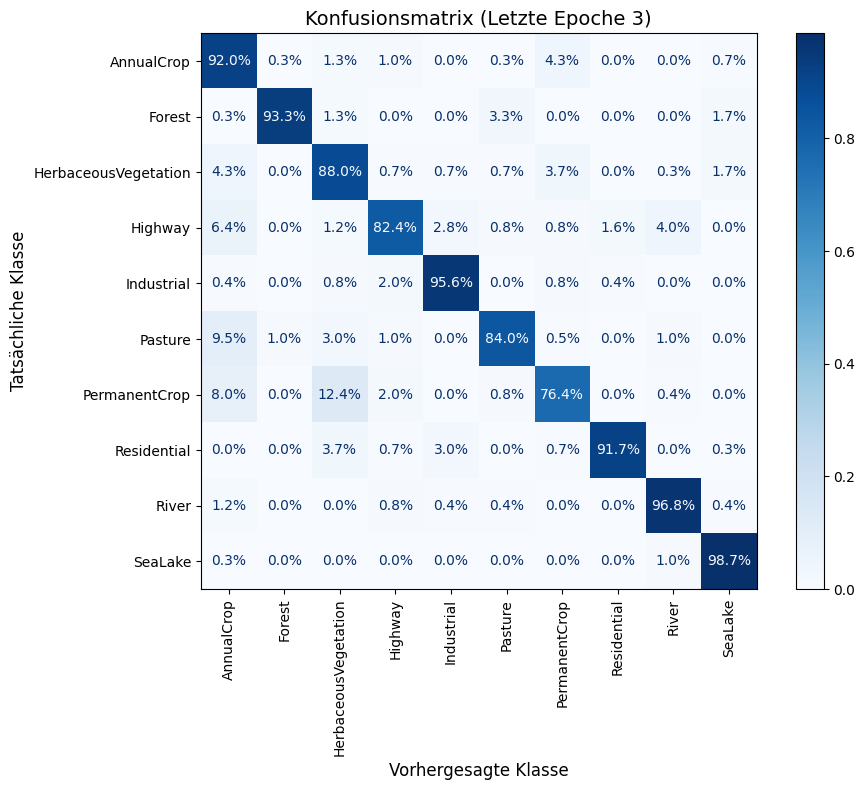

---> Training Epoch 4/150 | Target LR: 5.0000e-04



    Epoch 4 Training Summary: Loss: 1.1511 | Accuracy: 0.5193 | Final LR: 5.0000e-04 | Duration: 69.49s
---> Validation Epoch 4/150



    Epoch 4 Validation Summary: Loss: 0.7502 | Accuracy: 0.9122 | Duration: 6.32s
---> Best non-SWA model state saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_best_non_swa.pth

--- Konfusionsmatrix nach letzter Epoche (4) ---
---> Validation Epoch 4/150



    Epoch 4 Validation Summary: Loss: 0.7502 | Accuracy: 0.9122 | Duration: 6.50s
Konfusionsmatrix (normalisiert auf Zeilen):
[[96.    0.67  0.    0.33  0.    1.33  1.33  0.    0.    0.33]
 [ 0.   99.    0.33  0.    0.    0.67  0.    0.    0.    0.  ]
 [ 2.    0.67 75.33  3.67  1.    6.   10.33  0.    0.67  0.33]
 [ 1.6   3.2   0.   83.2   2.4   1.6   3.2   2.8   2.    0.  ]
 [ 0.4   0.    0.4   1.6  96.4   0.    0.    1.2   0.    0.  ]
 [ 3.5   2.5   0.5   0.5   0.   91.    0.    0.    2.    0.  ]
 [ 4.8   0.    5.6   0.8   0.    3.2  85.2   0.    0.4   0.  ]
 [ 0.    0.    4.    0.33  0.67  0.    2.67 92.    0.33  0.  ]
 [ 0.    0.4   0.    2.    0.    0.8   0.    0.   96.8   0.  ]
 [ 1.33  0.    0.33  0.    0.    0.    0.    0.    1.67 96.67]]


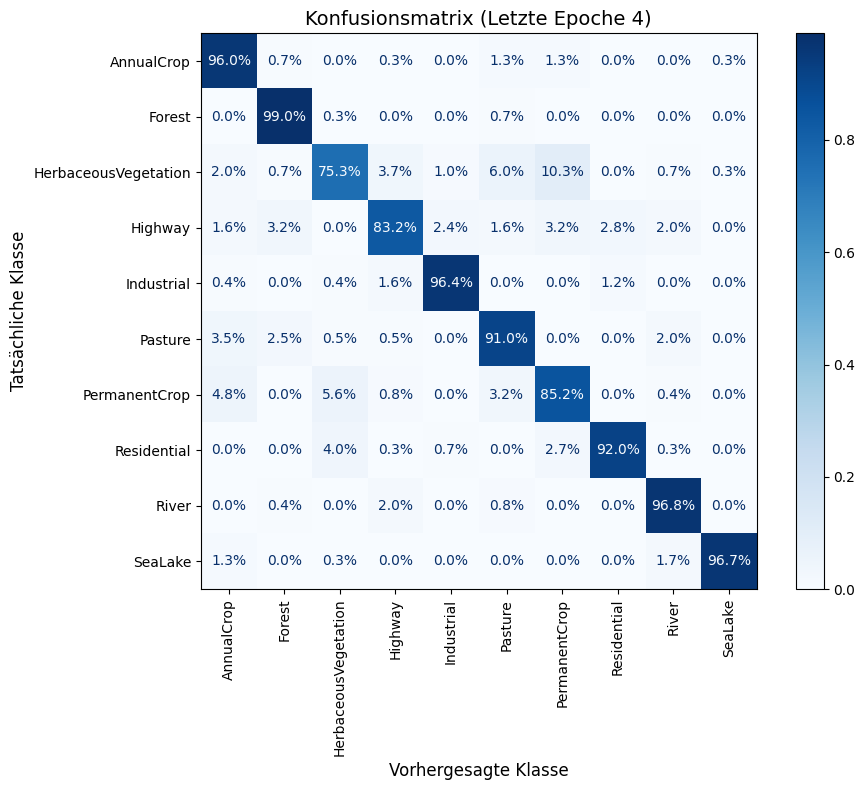

---> Training Epoch 5/150 | Target LR: 5.0000e-04



    Epoch 5 Training Summary: Loss: 1.1288 | Accuracy: 0.5236 | Final LR: 5.0000e-04 | Duration: 69.63s
---> Validation Epoch 5/150



    Epoch 5 Validation Summary: Loss: 0.8058 | Accuracy: 0.9059 | Duration: 6.57s
---> Val loss did not improve for 1 epochs.

--- Konfusionsmatrix nach letzter Epoche (5) ---
---> Validation Epoch 5/150



    Epoch 5 Validation Summary: Loss: 0.8058 | Accuracy: 0.9059 | Duration: 6.20s
Konfusionsmatrix (normalisiert auf Zeilen):
[[93.33  0.67  3.33  0.33  0.    0.33  1.67  0.    0.    0.33]
 [ 0.   99.    0.33  0.    0.    0.    0.    0.33  0.    0.33]
 [ 0.    0.67 97.    0.    1.    0.    0.33  0.    0.33  0.67]
 [ 2.8   0.    1.2  90.8   3.6   0.    0.    0.4   1.2   0.  ]
 [ 0.    0.    0.    0.   99.6   0.    0.4   0.    0.    0.  ]
 [ 2.    5.    5.5   1.5   0.   85.    0.    0.    0.5   0.5 ]
 [ 3.2   0.8  15.2   3.2   0.    0.4  76.8   0.    0.4   0.  ]
 [ 0.    0.    1.33  0.33  5.    0.    0.33 92.67  0.33  0.  ]
 [ 0.    0.    0.    1.6   0.4   0.8   0.    0.   96.4   0.8 ]
 [ 0.33  0.   20.33  0.    0.    0.    0.    5.67  0.   73.67]]


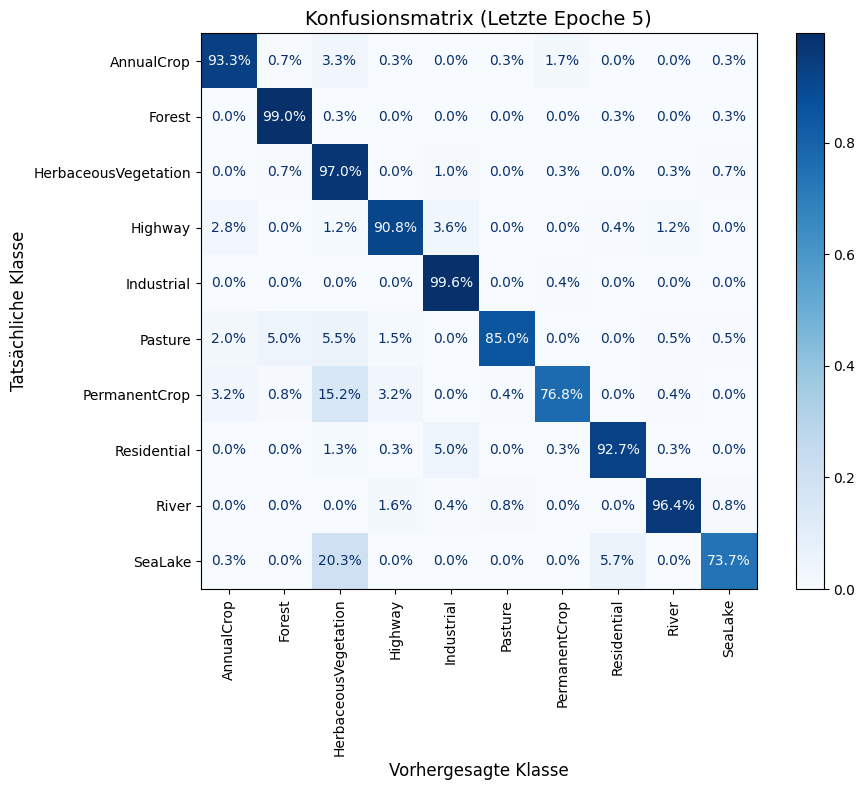

---> Training Epoch 6/150 | Target LR: 5.0000e-04



    Epoch 6 Training Summary: Loss: 1.1057 | Accuracy: 0.5336 | Final LR: 4.9970e-04 | Duration: 69.69s
---> Validation Epoch 6/150



    Epoch 6 Validation Summary: Loss: 0.6834 | Accuracy: 0.9526 | Duration: 6.21s
---> Best non-SWA model state saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_best_non_swa.pth

--- Konfusionsmatrix nach letzter Epoche (6) ---
---> Validation Epoch 6/150



    Epoch 6 Validation Summary: Loss: 0.6834 | Accuracy: 0.9526 | Duration: 6.47s
Konfusionsmatrix (normalisiert auf Zeilen):
[[93.    0.67  0.33  1.33  0.    1.33  1.67  0.    0.    1.67]
 [ 0.   99.    0.    0.    0.    0.67  0.    0.33  0.    0.  ]
 [ 0.67  0.   95.33  0.33  0.    0.33  2.33  0.    0.67  0.33]
 [ 0.8   0.    0.4  94.8   0.4   0.    0.4   1.2   2.    0.  ]
 [ 0.    0.    0.8   3.2  94.8   0.    0.4   0.8   0.    0.  ]
 [ 1.5   0.5   0.5   0.5   0.   96.5   0.    0.    0.5   0.  ]
 [ 2.8   0.    3.6   1.6   0.4   3.2  88.    0.    0.4   0.  ]
 [ 0.    0.    0.33  0.33  0.67  0.    1.   97.33  0.33  0.  ]
 [ 0.    0.    0.    0.8   0.    0.8   0.    0.   97.6   0.8 ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    4.33 95.67]]


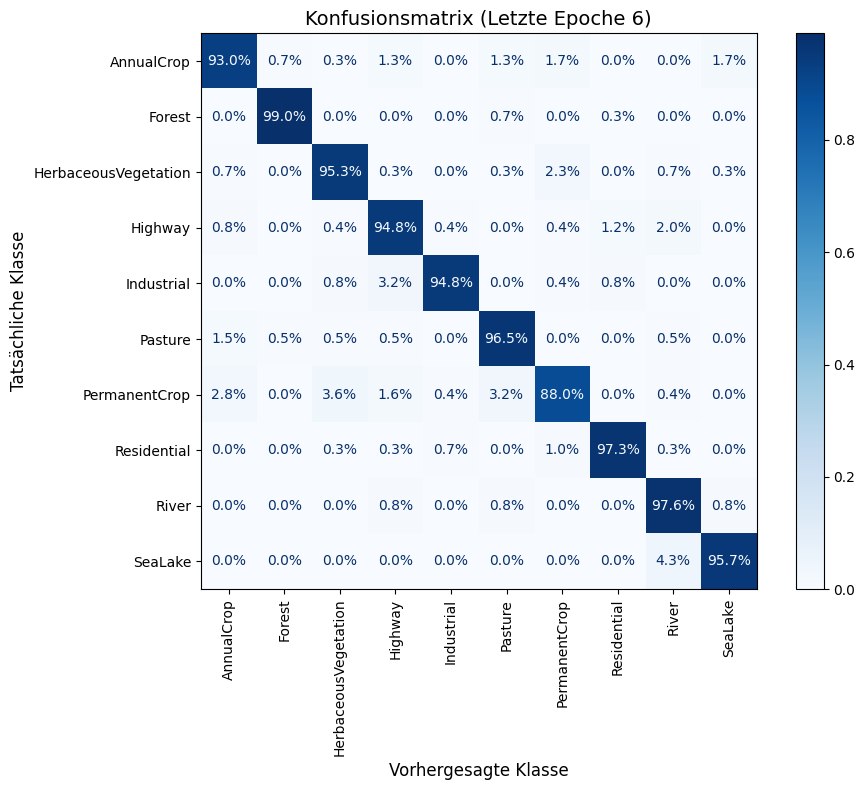

---> Training Epoch 7/150 | Target LR: 5.0000e-04



    Epoch 7 Training Summary: Loss: 1.0628 | Accuracy: 0.5388 | Final LR: 4.9880e-04 | Duration: 69.60s
---> Validation Epoch 7/150



    Epoch 7 Validation Summary: Loss: 0.7030 | Accuracy: 0.9411 | Duration: 6.36s
---> Val loss did not improve for 1 epochs.

--- Konfusionsmatrix nach letzter Epoche (7) ---
---> Validation Epoch 7/150



    Epoch 7 Validation Summary: Loss: 0.7030 | Accuracy: 0.9411 | Duration: 6.55s
Konfusionsmatrix (normalisiert auf Zeilen):
[[94.67  0.67  0.    1.67  0.    1.33  1.33  0.    0.33  0.  ]
 [ 0.   99.    0.    0.    0.    0.    0.    0.33  0.33  0.33]
 [ 1.    0.33 88.67  2.33  0.    0.33  6.33  0.67  0.33  0.  ]
 [ 0.4   0.    0.   96.4   0.    0.    0.4   0.8   2.    0.  ]
 [ 0.    0.    0.8   2.8  94.8   0.    0.    1.6   0.    0.  ]
 [ 1.    2.5   1.    1.5   0.   92.5   0.5   0.    1.    0.  ]
 [ 3.2   0.    3.2   1.2   0.    0.   92.    0.    0.4   0.  ]
 [ 0.    0.    0.67  0.    0.33  0.    0.33 98.33  0.33  0.  ]
 [ 0.    0.    0.    1.6   0.    0.8   0.    0.   97.6   0.  ]
 [ 0.67  0.    1.    0.    0.    0.    0.    0.   11.   87.33]]


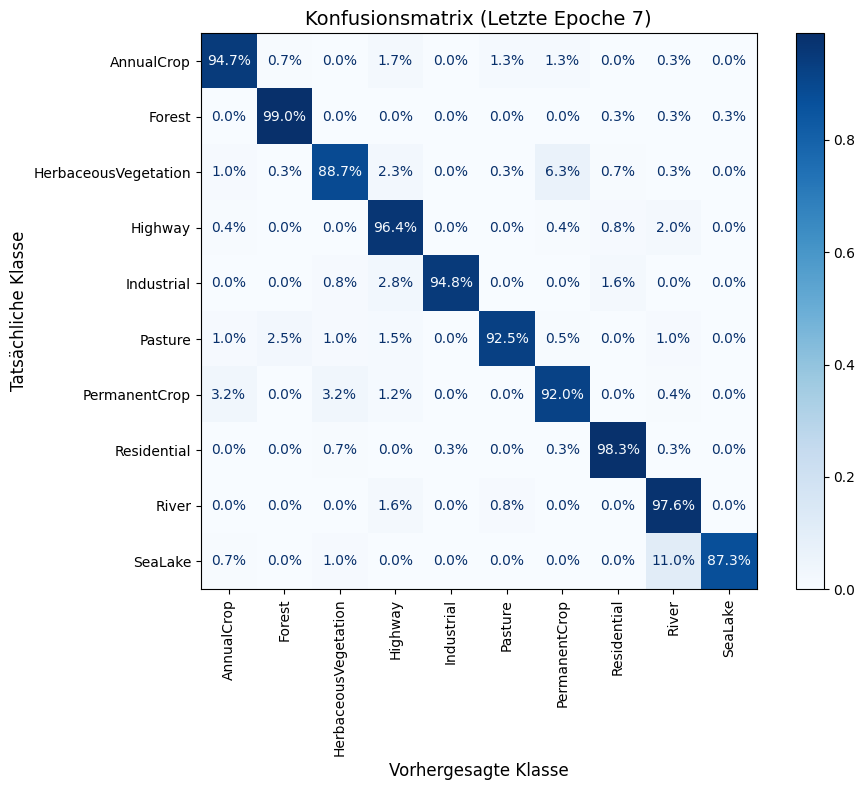

---> Training Epoch 8/150 | Target LR: 5.0000e-04



    Epoch 8 Training Summary: Loss: 1.0254 | Accuracy: 0.5424 | Final LR: 4.9730e-04 | Duration: 69.66s
---> Validation Epoch 8/150



    Epoch 8 Validation Summary: Loss: 0.6787 | Accuracy: 0.9507 | Duration: 6.59s
---> Best non-SWA model state saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_best_non_swa.pth

--- Konfusionsmatrix nach letzter Epoche (8) ---
---> Validation Epoch 8/150



    Epoch 8 Validation Summary: Loss: 0.6787 | Accuracy: 0.9507 | Duration: 6.46s
Konfusionsmatrix (normalisiert auf Zeilen):
[[96.    0.33  1.    0.33  0.    1.    1.33  0.    0.    0.  ]
 [ 0.   99.67  0.    0.    0.    0.33  0.    0.    0.    0.  ]
 [ 0.    0.33 95.67  1.    0.    0.67  2.    0.    0.33  0.  ]
 [ 0.4   0.    0.   97.2   0.    0.    0.8   0.    1.6   0.  ]
 [ 0.4   0.    0.8   5.2  92.    0.    0.    1.6   0.    0.  ]
 [ 1.5   0.    0.5   0.5   0.   95.5   1.    0.    1.    0.  ]
 [ 3.2   0.    6.    0.4   0.    0.   90.    0.    0.4   0.  ]
 [ 0.    0.    0.    0.33  0.33  0.    0.   99.    0.33  0.  ]
 [ 0.4   0.    0.8   1.6   0.    0.4   0.    0.   96.4   0.4 ]
 [ 0.    0.    2.67  0.    0.    0.    0.    0.67  8.   88.67]]


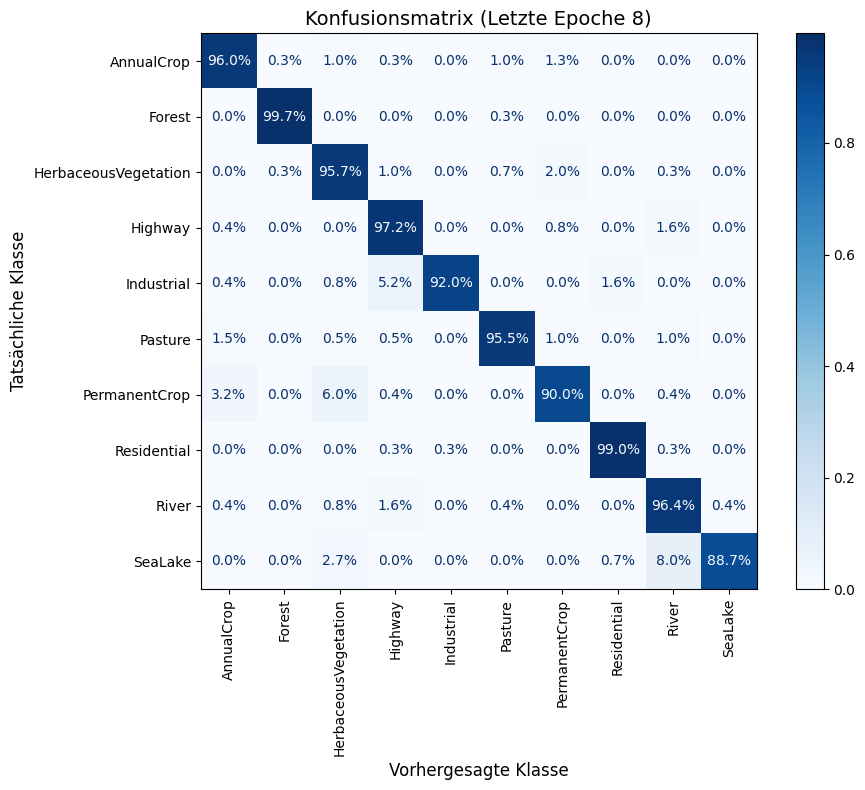

---> Training Epoch 9/150 | Target LR: 5.0000e-04



    Epoch 9 Training Summary: Loss: 1.0283 | Accuracy: 0.5470 | Final LR: 4.9521e-04 | Duration: 69.60s
---> Validation Epoch 9/150



    Epoch 9 Validation Summary: Loss: 0.7084 | Accuracy: 0.9470 | Duration: 6.37s
---> Val loss did not improve for 1 epochs.

--- Konfusionsmatrix nach letzter Epoche (9) ---
---> Validation Epoch 9/150



    Epoch 9 Validation Summary: Loss: 0.7084 | Accuracy: 0.9470 | Duration: 6.55s
Konfusionsmatrix (normalisiert auf Zeilen):
[[96.67  0.33  0.    0.    0.    0.33  2.    0.    0.    0.67]
 [ 0.   99.33  0.33  0.    0.    0.    0.    0.    0.    0.33]
 [ 0.    0.   97.67  0.    0.33  0.67  1.    0.    0.33  0.  ]
 [ 0.8   0.    0.8  94.8   0.    0.    0.8   0.8   2.    0.  ]
 [ 0.    0.    0.4   0.4  98.4   0.    0.    0.8   0.    0.  ]
 [ 1.5   0.5   1.    0.    0.   96.    0.5   0.    0.5   0.  ]
 [ 2.8   0.    7.2   0.    0.    0.   89.6   0.    0.4   0.  ]
 [ 0.    0.    3.    0.    1.    0.    0.   95.33  0.67  0.  ]
 [ 0.    0.    0.    0.8   0.4   0.8   0.    0.   97.6   0.4 ]
 [ 0.    0.    0.    0.    5.67  0.    0.67  0.   11.33 82.33]]


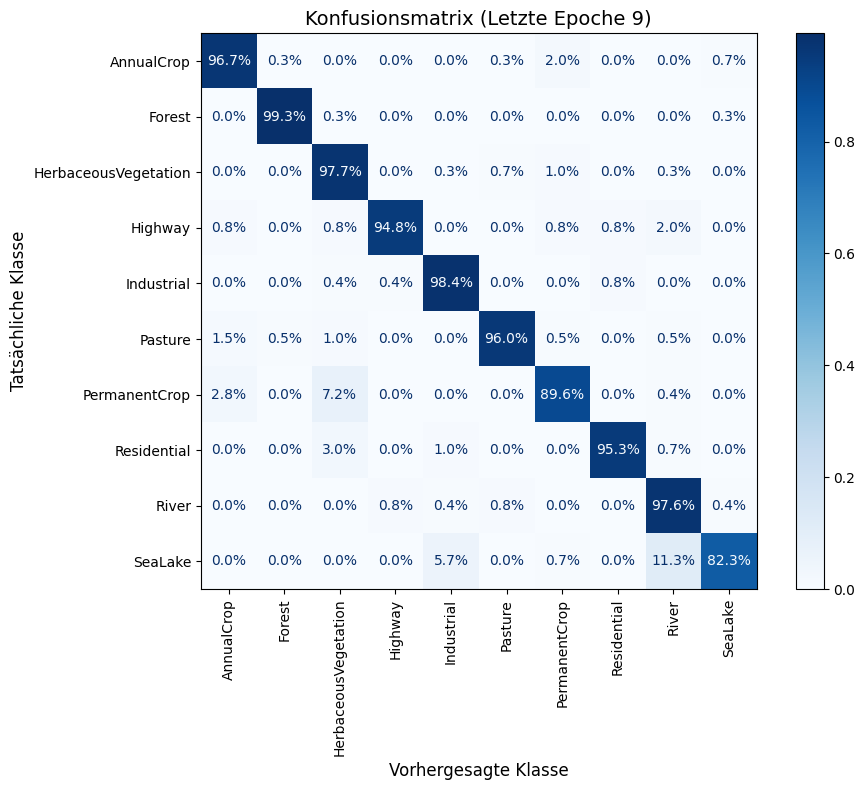

---> Training Epoch 10/150 | Target LR: 5.0000e-04



    Epoch 10 Training Summary: Loss: 0.9895 | Accuracy: 0.5453 | Final LR: 4.9252e-04 | Duration: 69.66s
---> Validation Epoch 10/150



    Epoch 10 Validation Summary: Loss: 0.6680 | Accuracy: 0.9519 | Duration: 6.34s
---> Best non-SWA model state saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_best_non_swa.pth

--- Konfusionsmatrix nach letzter Epoche (10) ---
---> Validation Epoch 10/150



    Epoch 10 Validation Summary: Loss: 0.6680 | Accuracy: 0.9519 | Duration: 6.51s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 96.33   0.67   0.     0.     0.     0.33   2.     0.     0.     0.67]
 [  0.   100.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.67  97.33   0.     0.33   0.67   0.33   0.     0.33   0.33]
 [  0.8    0.     0.4   95.6    0.     0.4    0.8    0.4    1.6    0.  ]
 [  0.4    0.     0.4    0.8   98.     0.     0.     0.4    0.     0.  ]
 [  2.     0.5    1.     0.     0.    95.     1.     0.     0.5    0.  ]
 [  3.6    0.     7.2    0.     0.     0.    88.8    0.     0.4    0.  ]
 [  0.     0.     1.33   0.     0.33   0.     0.33  97.67   0.33   0.  ]
 [  0.     0.     0.     0.8    0.     0.8    0.     0.    98.4    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.    15.33  84.67]]


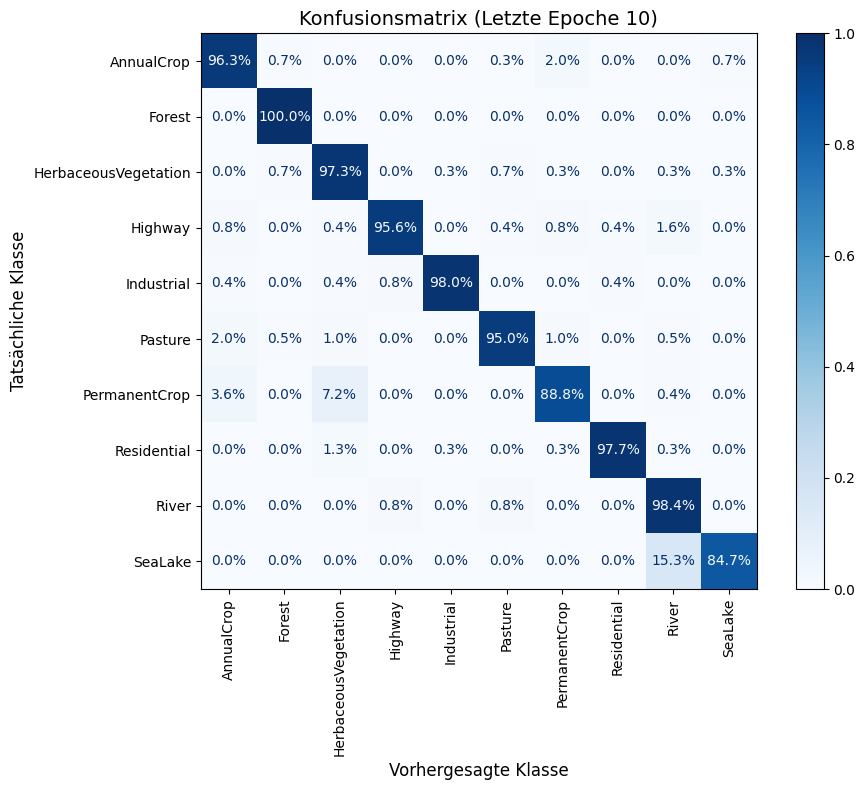

---> Training Epoch 11/150 | Target LR: 5.0000e-04



    Epoch 11 Training Summary: Loss: 0.9920 | Accuracy: 0.5455 | Final LR: 4.8926e-04 | Duration: 69.56s
---> Validation Epoch 11/150



    Epoch 11 Validation Summary: Loss: 0.6315 | Accuracy: 0.9641 | Duration: 6.64s
---> Best non-SWA model state saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_best_non_swa.pth

--- Konfusionsmatrix nach letzter Epoche (11) ---
---> Validation Epoch 11/150



    Epoch 11 Validation Summary: Loss: 0.6315 | Accuracy: 0.9641 | Duration: 6.18s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 98.67   0.33   0.33   0.     0.     0.     0.33   0.     0.     0.33]
 [  0.   100.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.33   0.33  94.33   0.33   0.33   1.     2.33   0.     0.33   0.67]
 [  1.2    0.     0.4   94.8    0.     0.     1.2    0.8    1.6    0.  ]
 [  0.8    0.     0.8    0.8   96.4    0.     0.     1.2    0.     0.  ]
 [  2.5    2.     1.5    0.5    0.    92.     1.     0.     0.5    0.  ]
 [  4.8    0.     5.6    0.     0.     0.    89.2    0.     0.4    0.  ]
 [  0.     0.     0.     0.     0.33   0.     0.67  98.67   0.33   0.  ]
 [  0.     0.     0.     0.8    0.     0.4    0.     0.    97.2    1.6 ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


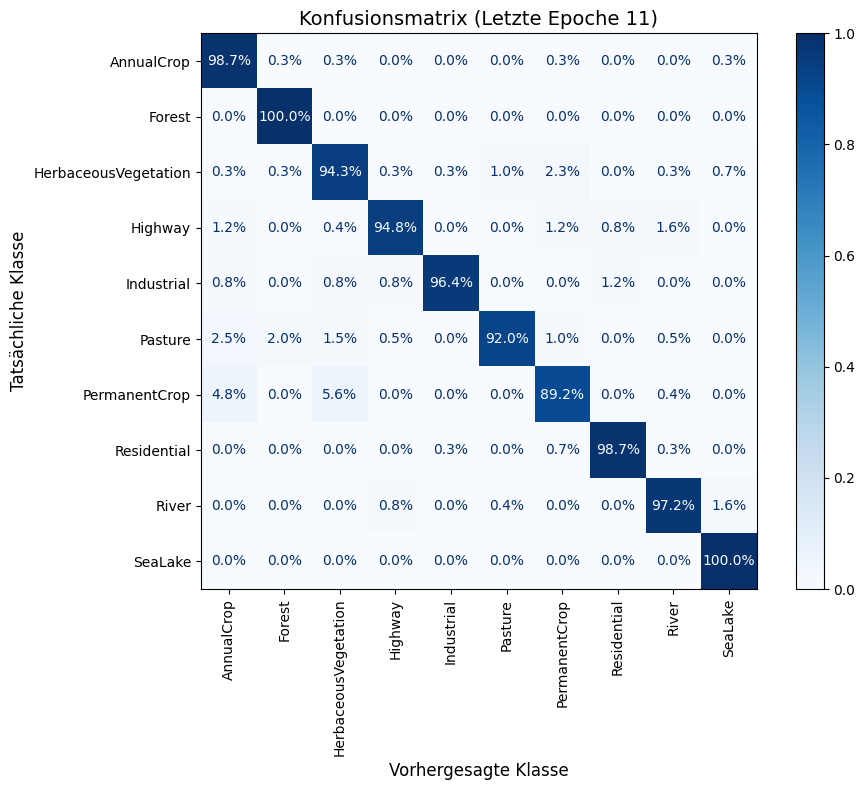

---> Training Epoch 12/150 | Target LR: 5.0000e-04



    Epoch 12 Training Summary: Loss: 0.9896 | Accuracy: 0.5400 | Final LR: 4.8542e-04 | Duration: 69.80s
---> Validation Epoch 12/150



    Epoch 12 Validation Summary: Loss: 0.6430 | Accuracy: 0.9581 | Duration: 6.41s
---> Val loss did not improve for 1 epochs.

--- Konfusionsmatrix nach letzter Epoche (12) ---
---> Validation Epoch 12/150



    Epoch 12 Validation Summary: Loss: 0.6430 | Accuracy: 0.9581 | Duration: 6.39s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 97.     0.33   0.     0.     0.     1.     1.67   0.     0.     0.  ]
 [  0.   100.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.33   0.67  92.33   0.67   0.     1.33   4.     0.     0.     0.67]
 [  0.4    0.     0.    96.     0.     0.     0.8    0.4    2.4    0.  ]
 [  0.4    0.     0.     2.    94.     0.     0.     3.6    0.     0.  ]
 [  1.     1.     0.5    0.5    0.    95.     0.5    0.     1.5    0.  ]
 [  1.2    0.     2.8    0.4    0.     0.4   94.8    0.     0.4    0.  ]
 [  0.     0.     0.     0.33   0.33   0.33   0.    98.67   0.33   0.  ]
 [  0.     0.     0.     0.     0.     0.8    0.     0.    98.4    0.8 ]
 [  0.     0.     0.     0.     0.     8.33   0.     0.     0.    91.67]]


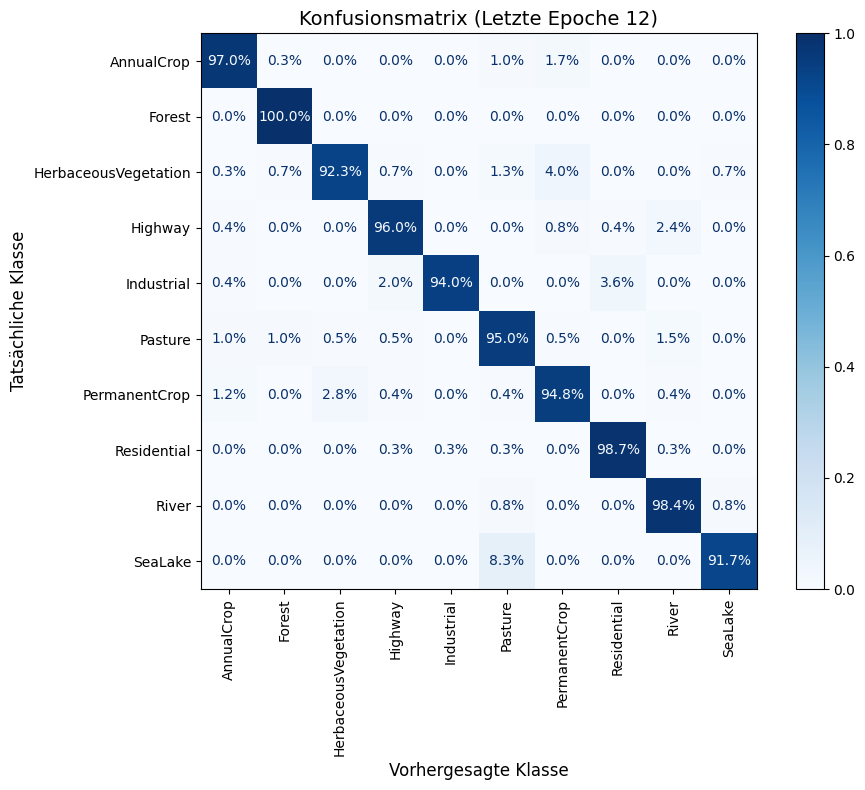

---> Training Epoch 13/150 | Target LR: 5.0000e-04



    Epoch 13 Training Summary: Loss: 0.9717 | Accuracy: 0.5479 | Final LR: 4.8101e-04 | Duration: 69.78s
---> Validation Epoch 13/150



    Epoch 13 Validation Summary: Loss: 0.6070 | Accuracy: 0.9715 | Duration: 6.23s
---> Best non-SWA model state saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_best_non_swa.pth

--- Konfusionsmatrix nach letzter Epoche (13) ---
---> Validation Epoch 13/150



    Epoch 13 Validation Summary: Loss: 0.6070 | Accuracy: 0.9715 | Duration: 6.51s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 96.67   0.33   0.33   0.67   0.     1.     1.     0.     0.     0.  ]
 [  0.   100.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.33   0.33  92.     0.67   0.33   1.     5.33   0.     0.     0.  ]
 [  0.4    0.     0.    96.8    0.     0.     0.4    0.4    2.     0.  ]
 [  0.     0.     0.     1.2   98.4    0.     0.     0.4    0.     0.  ]
 [  0.5    0.     0.5    0.     0.    98.5    0.     0.     0.5    0.  ]
 [  1.2    0.     2.     0.4    0.4    0.    95.6    0.     0.4    0.  ]
 [  0.     0.     0.     0.67   1.67   0.     0.    97.33   0.33   0.  ]
 [  0.     0.     0.4    0.     0.     2.     0.     0.    97.2    0.4 ]
 [  0.     0.     0.     0.33   0.     0.     0.     0.     0.33  99.33]]


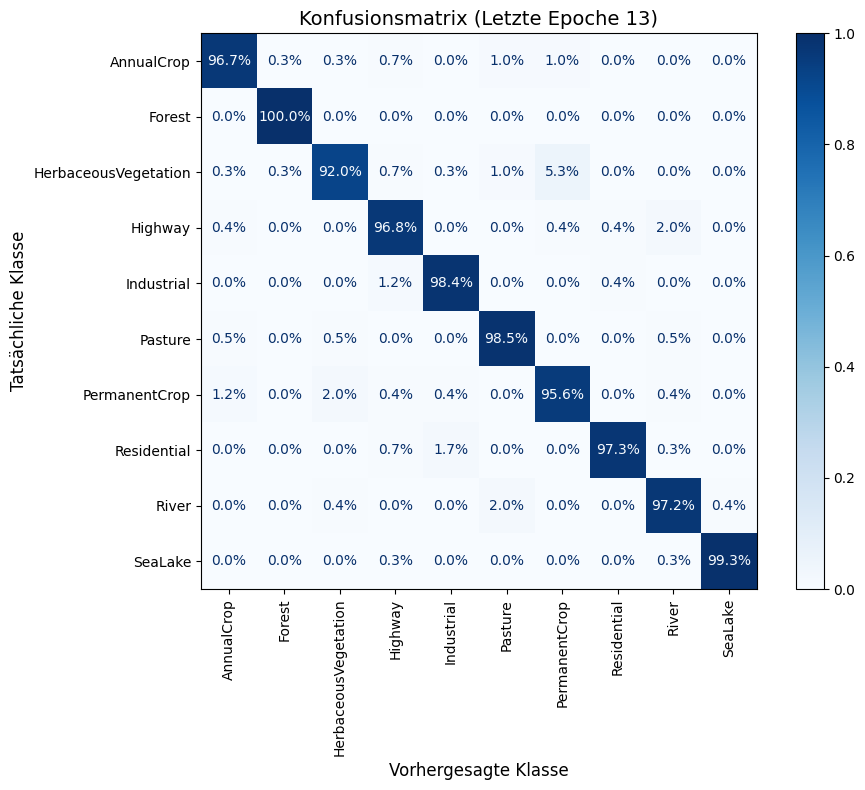

---> Training Epoch 14/150 | Target LR: 5.0000e-04



    Epoch 14 Training Summary: Loss: 0.9589 | Accuracy: 0.5357 | Final LR: 4.7605e-04 | Duration: 69.65s
---> Validation Epoch 14/150



    Epoch 14 Validation Summary: Loss: 0.6188 | Accuracy: 0.9700 | Duration: 6.52s
---> Val loss did not improve for 1 epochs.

--- Konfusionsmatrix nach letzter Epoche (14) ---
---> Validation Epoch 14/150



    Epoch 14 Validation Summary: Loss: 0.6188 | Accuracy: 0.9700 | Duration: 6.52s
Konfusionsmatrix (normalisiert auf Zeilen):
[[98.67  0.33  0.    0.    0.    0.    0.67  0.    0.    0.33]
 [ 0.   99.67  0.33  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.67 96.33  0.    0.33  0.33  1.67  0.    0.33  0.33]
 [ 0.8   0.    0.   95.6   0.    0.4   1.2   0.4   1.6   0.  ]
 [ 0.8   0.    0.    0.4  96.8   0.    0.4   1.6   0.    0.  ]
 [ 1.    1.5   0.5   0.    0.   96.    0.5   0.    0.5   0.  ]
 [ 3.2   0.    4.8   0.4   0.    0.4  90.8   0.    0.4   0.  ]
 [ 0.    0.    0.    0.    0.67  0.    0.33 98.67  0.33  0.  ]
 [ 0.    0.    0.    0.    0.    0.8   0.    0.   98.8   0.4 ]
 [ 0.    0.    0.    0.    0.    0.    0.    2.33  0.33 97.33]]


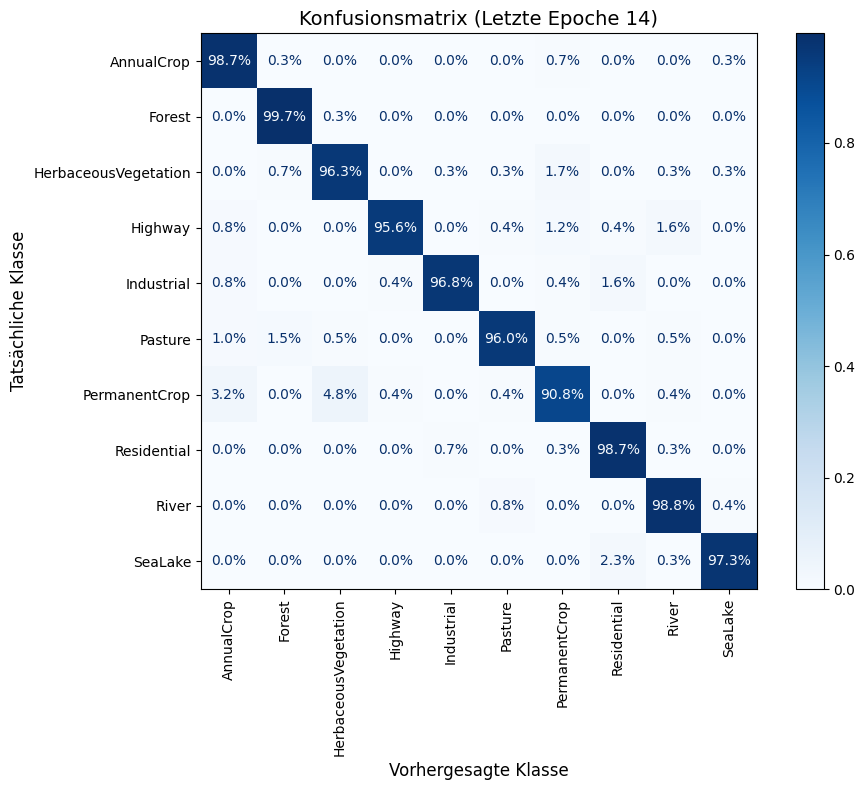

---> Training Epoch 15/150 | Target LR: 5.0000e-04



    Epoch 15 Training Summary: Loss: 0.9593 | Accuracy: 0.5388 | Final LR: 4.7054e-04 | Duration: 69.77s
---> Validation Epoch 15/150



    Epoch 15 Validation Summary: Loss: 0.6164 | Accuracy: 0.9741 | Duration: 6.29s
---> Val loss did not improve for 2 epochs.
---> Periodic checkpoint saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_epoch_15.pth

--- Konfusionsmatrix nach letzter Epoche (15) ---
---> Validation Epoch 15/150



    Epoch 15 Validation Summary: Loss: 0.6164 | Accuracy: 0.9741 | Duration: 6.32s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 97.67   0.33   0.     0.     0.     0.     2.     0.     0.     0.  ]
 [  0.    98.     0.     0.     0.     2.     0.     0.     0.     0.  ]
 [  0.33   0.67  94.     0.33   0.67   0.67   2.67   0.     0.     0.67]
 [  0.4    0.     0.    97.2    0.     0.     1.2    0.4    0.8    0.  ]
 [  0.     0.     0.     0.    96.8    0.     0.4    2.8    0.     0.  ]
 [  2.     0.     0.5    0.5    0.    96.     0.     0.     1.     0.  ]
 [  0.8    0.     1.2    0.4    0.     0.    97.2    0.     0.4    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.67  99.     0.33   0.  ]
 [  0.     0.     0.     1.2    0.     0.8    0.     0.    97.6    0.4 ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


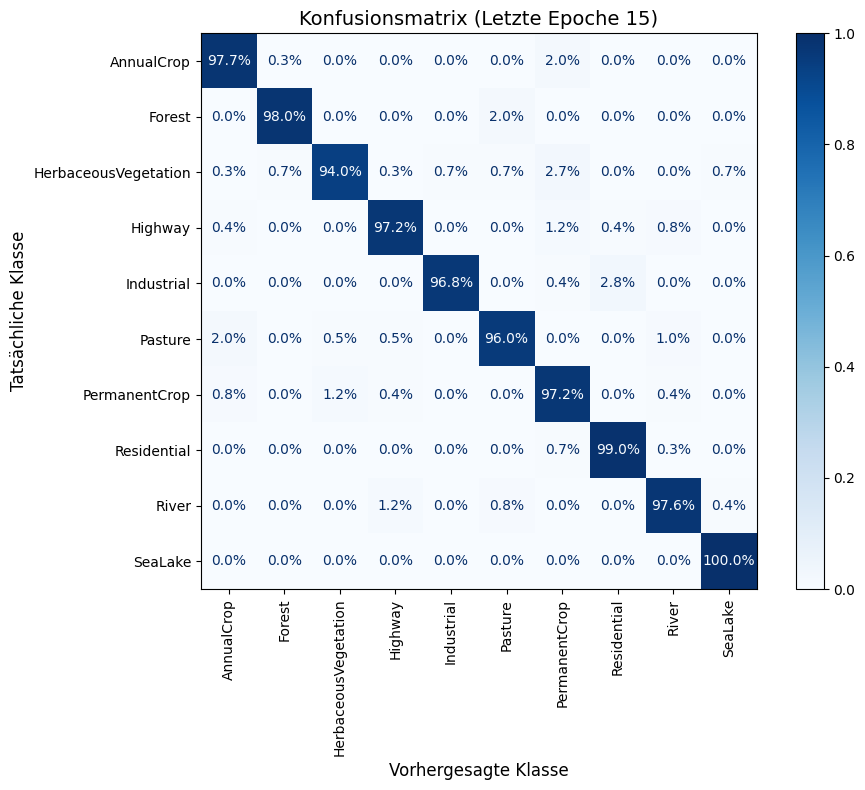

---> Training Epoch 16/150 | Target LR: 5.0000e-04



    Epoch 16 Training Summary: Loss: 0.9478 | Accuracy: 0.5680 | Final LR: 4.6450e-04 | Duration: 69.79s
---> Validation Epoch 16/150



    Epoch 16 Validation Summary: Loss: 0.5982 | Accuracy: 0.9752 | Duration: 6.53s
---> Best non-SWA model state saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_best_non_swa.pth

--- Konfusionsmatrix nach letzter Epoche (16) ---
---> Validation Epoch 16/150



    Epoch 16 Validation Summary: Loss: 0.5982 | Accuracy: 0.9752 | Duration: 6.70s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 97.67   0.33   0.     0.     0.     1.67   0.     0.     0.     0.33]
 [  0.   100.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.33  97.67   0.33   0.     0.     1.33   0.     0.33   0.  ]
 [  1.6    0.     0.    94.8    0.4    0.     0.8    0.     2.     0.4 ]
 [  0.     0.     0.     0.4   99.2    0.     0.     0.4    0.     0.  ]
 [  0.5    1.5    0.5    0.5    0.    96.     0.     0.     1.     0.  ]
 [  4.4    0.     3.2    0.4    0.     0.4   91.2    0.     0.4    0.  ]
 [  0.     0.     0.     0.67   0.33   0.     0.67  98.33   0.     0.  ]
 [  0.     0.     0.     0.     0.4    0.4    0.     0.    99.2    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.33  99.67]]


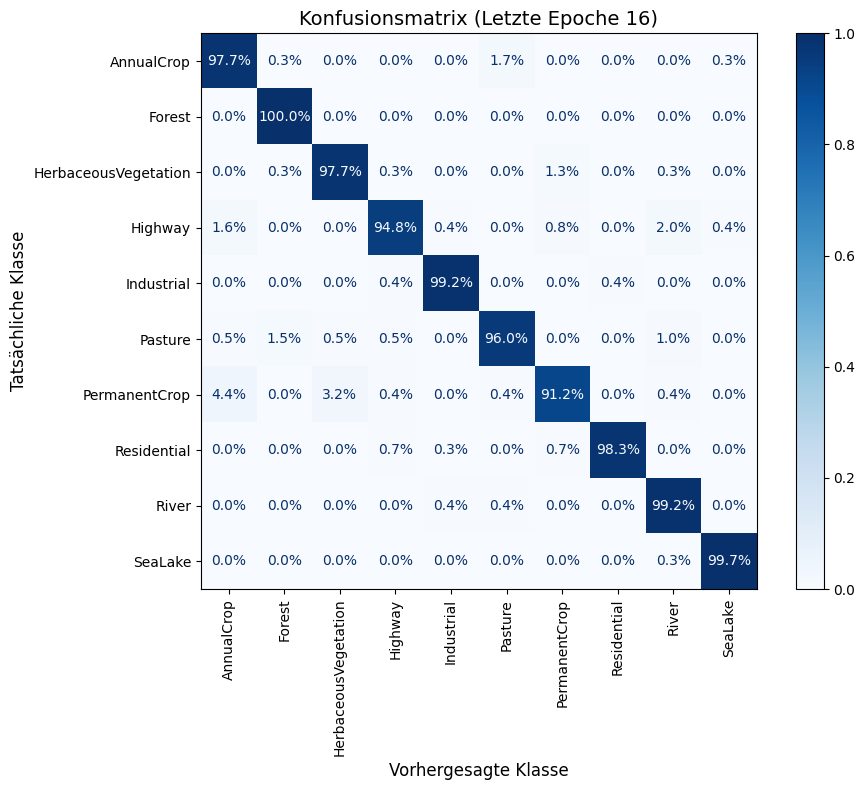

---> Training Epoch 17/150 | Target LR: 5.0000e-04



    Epoch 17 Training Summary: Loss: 0.9318 | Accuracy: 0.5444 | Final LR: 4.5795e-04 | Duration: 69.81s
---> Validation Epoch 17/150



    Epoch 17 Validation Summary: Loss: 0.6371 | Accuracy: 0.9611 | Duration: 6.29s
---> Val loss did not improve for 1 epochs.

--- Konfusionsmatrix nach letzter Epoche (17) ---
---> Validation Epoch 17/150



    Epoch 17 Validation Summary: Loss: 0.6371 | Accuracy: 0.9611 | Duration: 6.55s
Konfusionsmatrix (normalisiert auf Zeilen):
[[99.67  0.33  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   99.67  0.33  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.67  0.   97.67  0.33  0.    0.    1.    0.    0.33  0.  ]
 [ 0.8   0.    0.   96.8   0.    0.    0.4   0.4   1.6   0.  ]
 [ 1.2   0.    0.4   2.8  92.8   0.    0.    2.8   0.    0.  ]
 [ 5.5   0.5   0.5   1.    0.   91.    0.5   0.    1.    0.  ]
 [ 4.    0.    5.6   0.8   0.    0.   89.2   0.    0.4   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.33 99.33  0.33  0.  ]
 [ 0.    0.    0.    0.4   0.    0.4   0.    0.   98.8   0.4 ]
 [ 6.    0.33  0.33  0.    0.    0.    0.    0.    0.   93.33]]


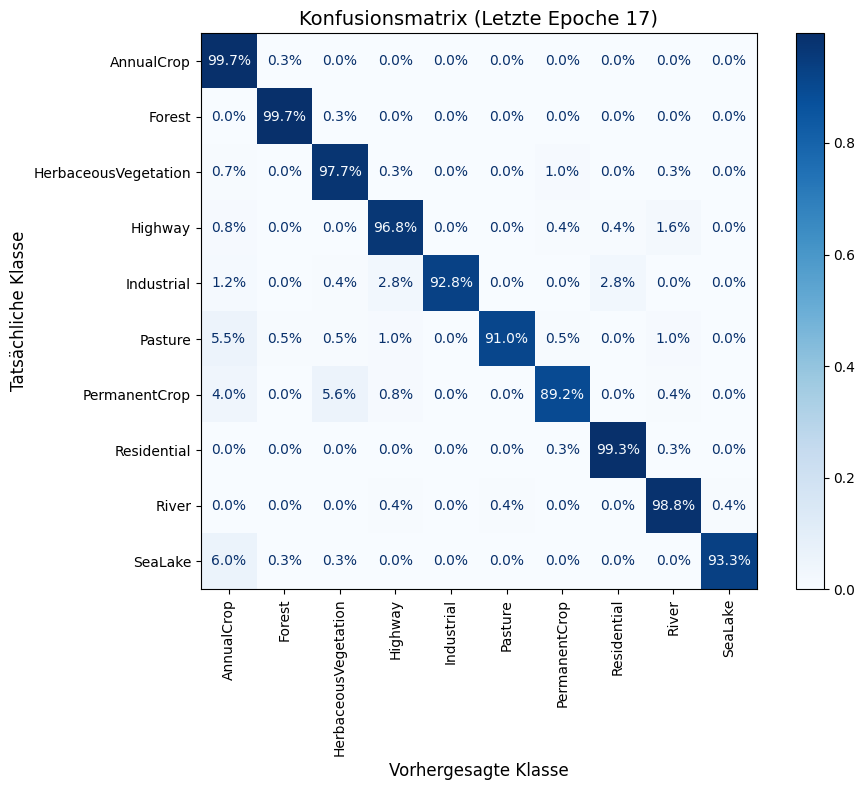

---> Training Epoch 18/150 | Target LR: 5.0000e-04



    Epoch 18 Training Summary: Loss: 0.9349 | Accuracy: 0.5462 | Final LR: 4.5090e-04 | Duration: 69.92s
---> Validation Epoch 18/150



    Epoch 18 Validation Summary: Loss: 0.5928 | Accuracy: 0.9822 | Duration: 6.33s
---> Best non-SWA model state saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_best_non_swa.pth

--- Konfusionsmatrix nach letzter Epoche (18) ---
---> Validation Epoch 18/150



    Epoch 18 Validation Summary: Loss: 0.5928 | Accuracy: 0.9822 | Duration: 6.41s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.     0.33   0.     0.     0.     0.33   0.33   0.     0.     0.  ]
 [  0.   100.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.67  97.33   0.     0.     0.67   1.33   0.     0.     0.  ]
 [  0.4    0.     0.    97.2    0.     0.     0.4    0.4    1.6    0.  ]
 [  0.     0.     0.4    0.4   98.8    0.     0.     0.4    0.     0.  ]
 [  1.     1.5    0.5    0.     0.    95.5    0.5    0.     1.     0.  ]
 [  1.6    0.     2.8    0.4    0.     0.    94.8    0.     0.4    0.  ]
 [  0.     0.     0.     0.     0.33   0.     0.    99.33   0.33   0.  ]
 [  0.     0.     0.     0.     0.     0.8    0.     0.    99.2    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.33  99.67]]


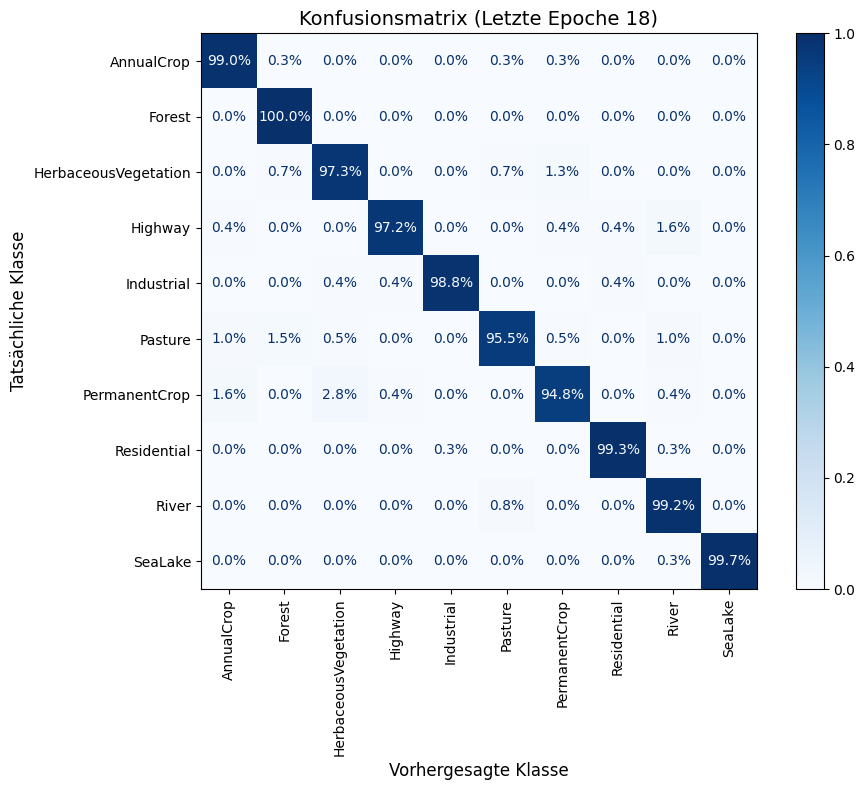

---> Training Epoch 19/150 | Target LR: 5.0000e-04



    Epoch 19 Training Summary: Loss: 0.9260 | Accuracy: 0.5345 | Final LR: 4.4337e-04 | Duration: 70.26s
---> Validation Epoch 19/150



    Epoch 19 Validation Summary: Loss: 0.6564 | Accuracy: 0.9611 | Duration: 6.59s
---> Val loss did not improve for 1 epochs.

--- Konfusionsmatrix nach letzter Epoche (19) ---
---> Validation Epoch 19/150



    Epoch 19 Validation Summary: Loss: 0.6564 | Accuracy: 0.9611 | Duration: 6.45s
Konfusionsmatrix (normalisiert auf Zeilen):
[[94.    0.33  0.    0.    0.    0.33  5.    0.    0.    0.33]
 [ 0.   99.67  0.33  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.33  0.33 93.67  1.    0.33  0.67  3.33  0.    0.    0.33]
 [ 1.2   0.    0.   92.8   0.    0.    0.8   0.4   4.8   0.  ]
 [ 0.    0.    0.    0.4  99.2   0.    0.    0.4   0.    0.  ]
 [ 1.5   0.    0.5   0.5   0.   95.5   0.5   0.    1.5   0.  ]
 [ 0.    0.    2.4   0.4   0.4   0.   96.4   0.    0.4   0.  ]
 [ 0.    0.    0.    0.    0.33  0.    0.   99.33  0.33  0.  ]
 [ 0.    0.    0.    0.    0.    0.4   0.    0.   99.2   0.4 ]
 [ 0.    0.    0.    5.    0.    0.    0.    3.33  0.   91.67]]


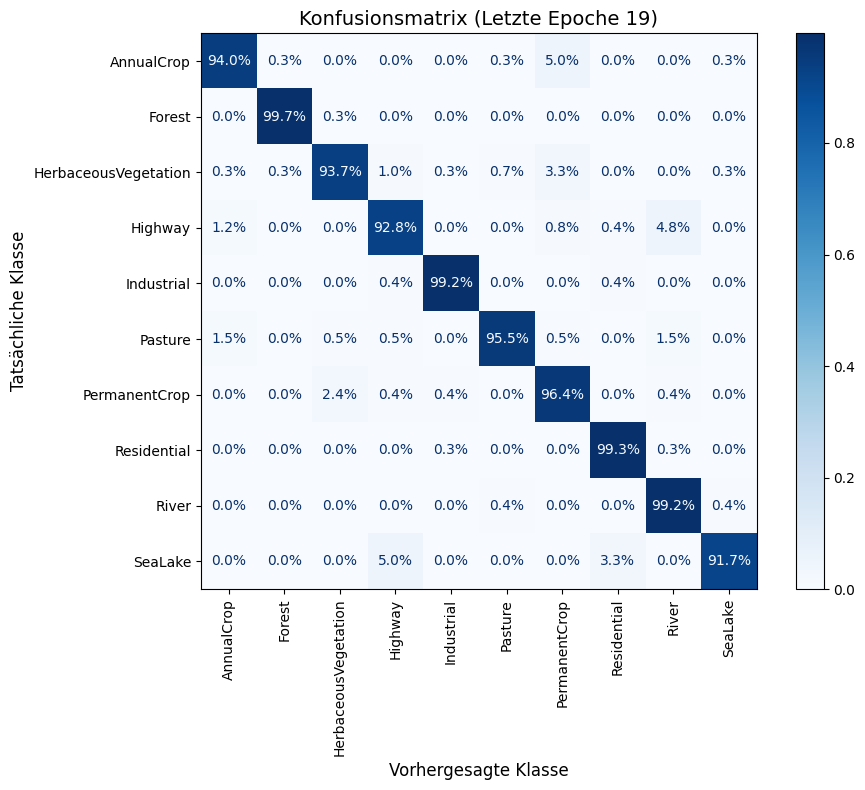

---> Training Epoch 20/150 | Target LR: 5.0000e-04



    Epoch 20 Training Summary: Loss: 0.9436 | Accuracy: 0.5408 | Final LR: 4.3537e-04 | Duration: 69.95s
---> Validation Epoch 20/150



    Epoch 20 Validation Summary: Loss: 0.6318 | Accuracy: 0.9630 | Duration: 6.50s
---> Val loss did not improve for 2 epochs.

--- Konfusionsmatrix nach letzter Epoche (20) ---
---> Validation Epoch 20/150



    Epoch 20 Validation Summary: Loss: 0.6318 | Accuracy: 0.9630 | Duration: 6.49s
Konfusionsmatrix (normalisiert auf Zeilen):
[[98.    0.33  0.    0.67  0.    0.33  0.67  0.    0.    0.  ]
 [ 0.   99.67  0.33  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.33 96.33  0.33  1.    0.    1.67  0.    0.    0.33]
 [ 0.4   0.    0.4  94.8   0.    0.    0.4   0.4   3.6   0.  ]
 [ 0.    0.    0.    0.4  98.8   0.    0.    0.8   0.    0.  ]
 [ 1.    2.    0.5   0.    0.   95.5   0.5   0.    0.5   0.  ]
 [ 3.6   0.    3.2   0.8   0.    0.   92.    0.    0.4   0.  ]
 [ 0.    0.    0.    0.    0.67  0.    0.   99.33  0.    0.  ]
 [ 0.    0.    0.    0.8   0.4   0.8   0.    0.   97.6   0.4 ]
 [ 0.33  0.    0.    0.    3.33  0.    0.    0.    6.   90.33]]


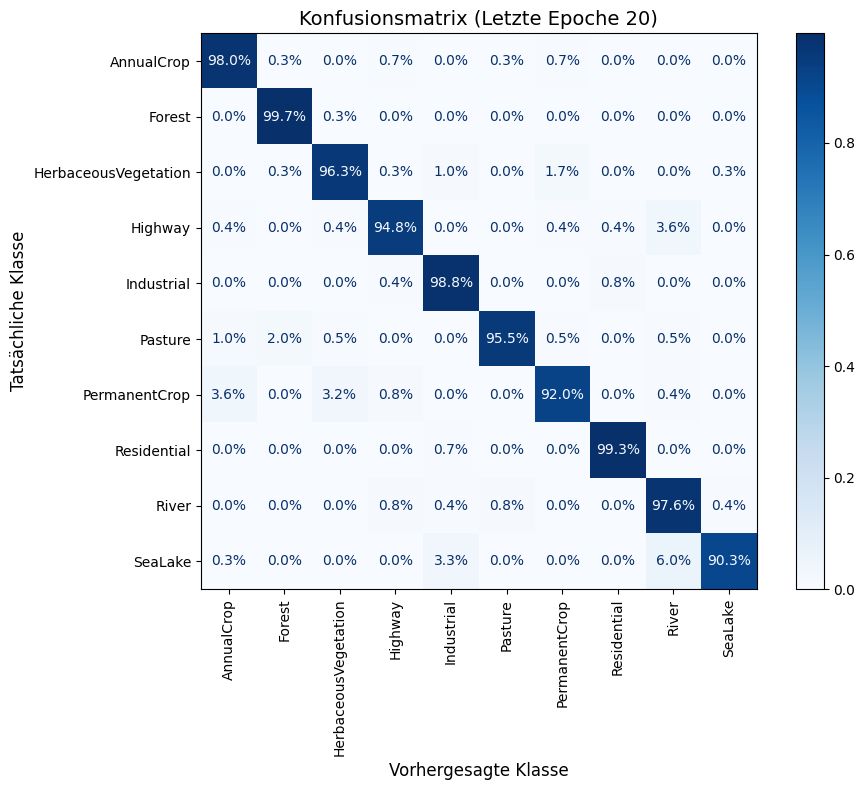

---> Training Epoch 21/150 | Target LR: 5.0000e-04



    Epoch 21 Training Summary: Loss: 0.9315 | Accuracy: 0.5718 | Final LR: 4.2692e-04 | Duration: 69.82s
---> Validation Epoch 21/150



    Epoch 21 Validation Summary: Loss: 0.6494 | Accuracy: 0.9622 | Duration: 6.31s
---> Val loss did not improve for 3 epochs.

--- Konfusionsmatrix nach letzter Epoche (21) ---
---> Validation Epoch 21/150



    Epoch 21 Validation Summary: Loss: 0.6494 | Accuracy: 0.9622 | Duration: 6.42s
Konfusionsmatrix (normalisiert auf Zeilen):
[[99.67  0.33  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   99.33  0.33  0.    0.    0.33  0.    0.    0.    0.  ]
 [ 1.67  0.   95.    0.67  0.    0.    2.33  0.    0.33  0.  ]
 [ 0.4   0.    0.   96.4   0.    0.    0.8   0.4   2.    0.  ]
 [ 0.8   0.    0.    0.4  98.4   0.    0.    0.4   0.    0.  ]
 [ 2.    0.    0.5   0.    0.   95.5   1.    0.    1.    0.  ]
 [ 3.6   0.    2.4   0.4   0.    0.   93.2   0.    0.4   0.  ]
 [ 0.    0.    0.    0.    0.67  0.    0.33 98.67  0.33  0.  ]
 [ 0.4   0.    0.    0.8   0.    0.    0.    0.   98.8   0.  ]
 [12.33  0.    0.    0.    0.    0.    0.    0.    0.33 87.33]]


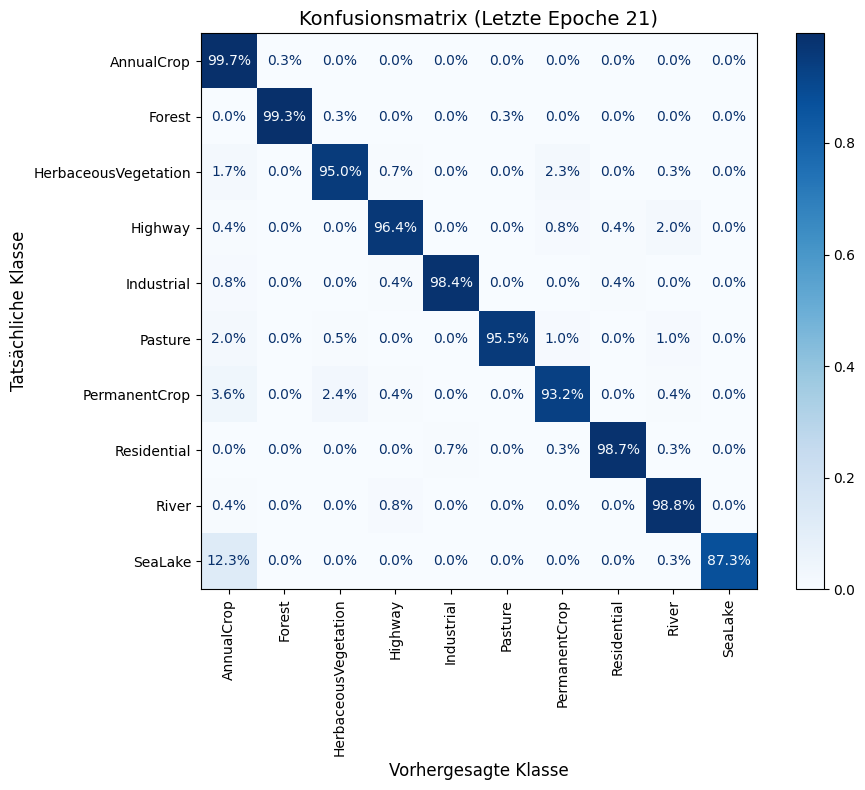

---> Training Epoch 22/150 | Target LR: 5.0000e-04



    Epoch 22 Training Summary: Loss: 0.9245 | Accuracy: 0.5535 | Final LR: 4.1805e-04 | Duration: 70.04s
---> Validation Epoch 22/150



    Epoch 22 Validation Summary: Loss: 0.5948 | Accuracy: 0.9793 | Duration: 6.50s
---> Val loss did not improve for 4 epochs.

--- Konfusionsmatrix nach letzter Epoche (22) ---
---> Validation Epoch 22/150



    Epoch 22 Validation Summary: Loss: 0.5948 | Accuracy: 0.9793 | Duration: 6.25s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 98.67   0.33   0.     0.67   0.     0.     0.     0.     0.     0.33]
 [  0.   100.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.33  97.67   0.33   0.     1.     0.33   0.     0.     0.33]
 [  0.4    0.     0.    98.     0.     0.     0.4    0.     1.2    0.  ]
 [  0.     0.     0.     2.    96.4    0.     0.4    1.2    0.     0.  ]
 [  2.     1.     0.5    1.5    0.    93.5    0.5    0.     1.     0.  ]
 [  1.6    0.     3.2    1.2    0.     0.    94.     0.     0.     0.  ]
 [  0.     0.     0.     0.33   0.     0.     0.    99.33   0.33   0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


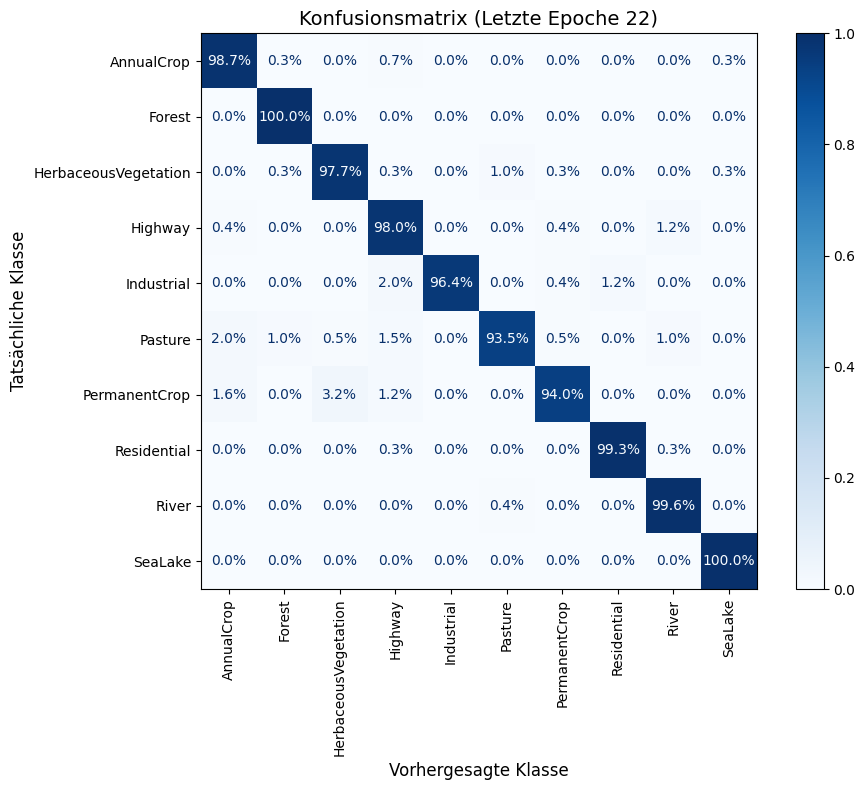

---> Training Epoch 23/150 | Target LR: 5.0000e-04



    Epoch 23 Training Summary: Loss: 0.9175 | Accuracy: 0.5513 | Final LR: 4.0878e-04 | Duration: 69.76s
---> Validation Epoch 23/150



    Epoch 23 Validation Summary: Loss: 0.6496 | Accuracy: 0.9622 | Duration: 6.39s
---> Val loss did not improve for 5 epochs.

--- Konfusionsmatrix nach letzter Epoche (23) ---
---> Validation Epoch 23/150



    Epoch 23 Validation Summary: Loss: 0.6496 | Accuracy: 0.9622 | Duration: 6.41s
Konfusionsmatrix (normalisiert auf Zeilen):
[[99.    0.33  0.    0.    0.    0.    0.67  0.    0.    0.  ]
 [ 0.   99.67  0.33  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.33  0.67 96.    0.    0.33  0.67  2.    0.    0.    0.  ]
 [ 0.4   0.    0.   97.6   0.    0.    0.4   0.    1.6   0.  ]
 [ 0.    0.    0.    0.4  99.2   0.    0.    0.4   0.    0.  ]
 [ 1.5   1.    0.5   0.    0.   96.    0.    0.    1.    0.  ]
 [ 1.2   0.    3.2   0.8   0.    0.   94.4   0.    0.4   0.  ]
 [ 0.    0.    0.    0.33  1.33  0.    0.33 97.67  0.33  0.  ]
 [ 0.    0.    0.    0.    0.    1.2   0.    0.   98.    0.8 ]
 [ 8.33  0.    0.    0.    6.33  0.    0.    0.    0.   85.33]]


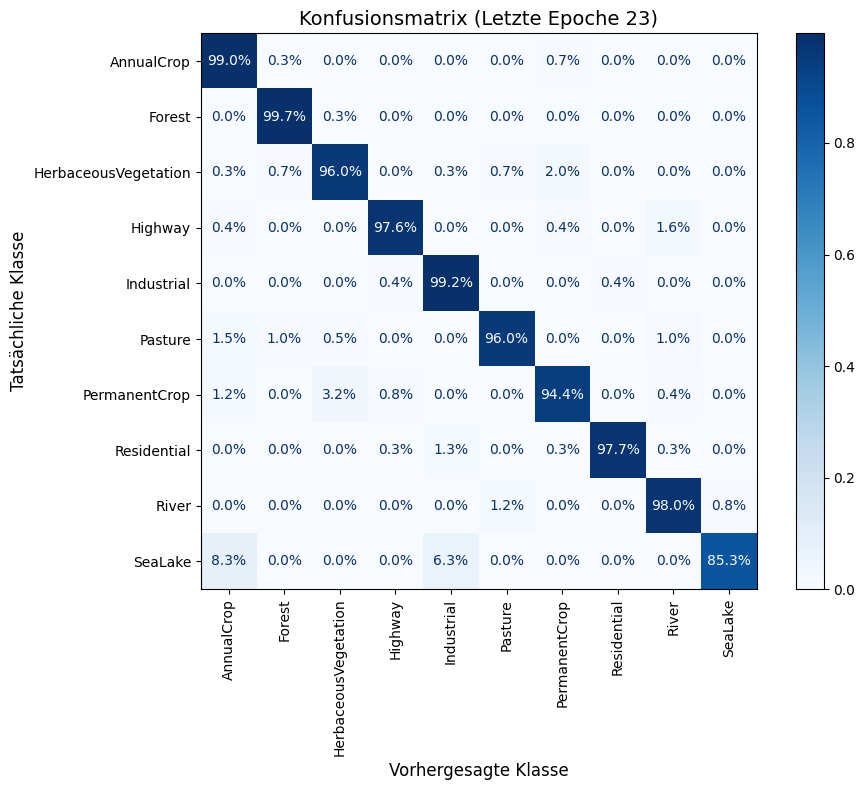

---> Training Epoch 24/150 | Target LR: 5.0000e-04



    Epoch 24 Training Summary: Loss: 0.9167 | Accuracy: 0.5671 | Final LR: 3.9913e-04 | Duration: 69.99s
---> Validation Epoch 24/150



    Epoch 24 Validation Summary: Loss: 0.7311 | Accuracy: 0.9641 | Duration: 6.51s
---> Val loss did not improve for 6 epochs.

--- Konfusionsmatrix nach letzter Epoche (24) ---
---> Validation Epoch 24/150



    Epoch 24 Validation Summary: Loss: 0.7311 | Accuracy: 0.9641 | Duration: 6.54s
Konfusionsmatrix (normalisiert auf Zeilen):
[[98.    0.33  0.    0.    0.    0.33  1.    0.    0.    0.33]
 [ 0.   99.67  0.33  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.   98.33  0.33  0.    0.33  1.    0.    0.    0.  ]
 [ 0.4   0.    0.   96.4   0.4   0.    0.4   0.4   2.    0.  ]
 [ 0.4   0.    0.    0.   98.    0.    0.    1.6   0.    0.  ]
 [ 1.    0.    0.5   0.    0.   97.    0.5   0.    1.    0.  ]
 [ 1.2   0.    3.2   0.    0.    0.   95.2   0.    0.4   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.   99.67  0.33  0.  ]
 [ 0.    0.    0.    0.    0.    0.4   0.    0.   99.2   0.4 ]
 [ 0.    0.   16.33  0.    0.    0.    0.    0.33  0.   83.33]]


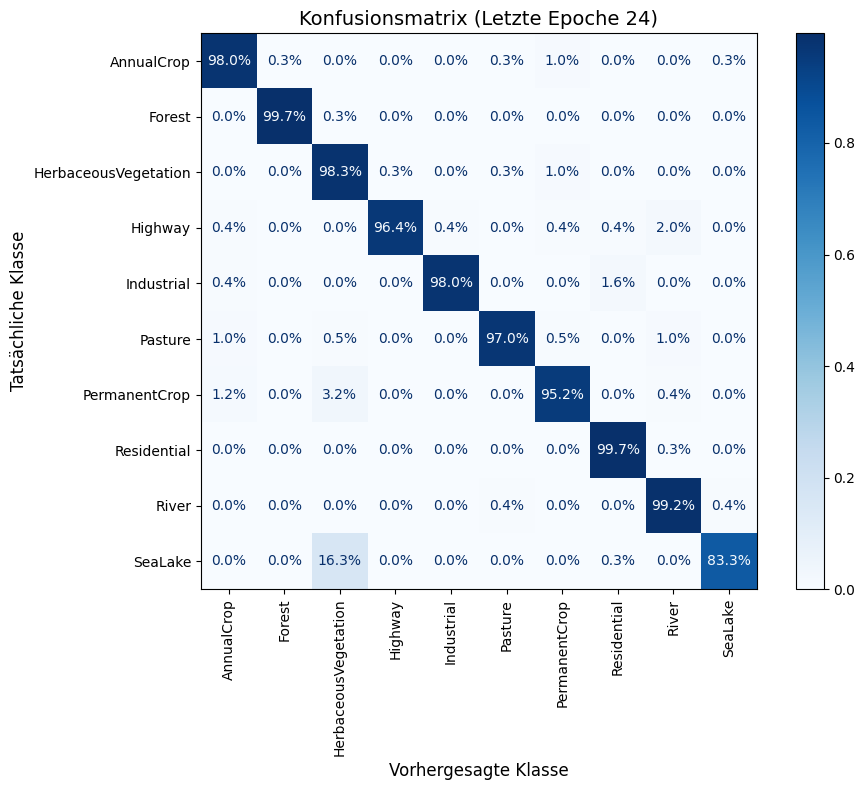

---> Training Epoch 25/150 | Target LR: 5.0000e-04



    Epoch 25 Training Summary: Loss: 0.9088 | Accuracy: 0.5656 | Final LR: 3.8911e-04 | Duration: 69.81s
---> Validation Epoch 25/150



    Epoch 25 Validation Summary: Loss: 0.5811 | Accuracy: 0.9759 | Duration: 6.49s
---> Best non-SWA model state saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_best_non_swa.pth

--- Konfusionsmatrix nach letzter Epoche (25) ---
---> Validation Epoch 25/150



    Epoch 25 Validation Summary: Loss: 0.5811 | Accuracy: 0.9759 | Duration: 6.37s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.33   0.33   0.     0.     0.     0.     0.     0.     0.33   0.  ]
 [  0.   100.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.33  98.67   0.33   0.     0.     0.67   0.     0.     0.  ]
 [  0.4    0.     0.    97.2    0.     0.     0.     0.4    2.     0.  ]
 [  0.4    0.     0.4    1.6   97.2    0.     0.     0.4    0.     0.  ]
 [  1.     1.     2.     0.5    0.    94.     0.     0.     1.5    0.  ]
 [  4.     0.     3.6    0.8    0.     0.4   90.4    0.4    0.4    0.  ]
 [  0.     0.     0.     0.33   0.33   0.     0.    99.     0.33   0.  ]
 [  0.     0.     0.     0.4    0.     0.4    0.     0.    99.2    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     1.33  98.67]]


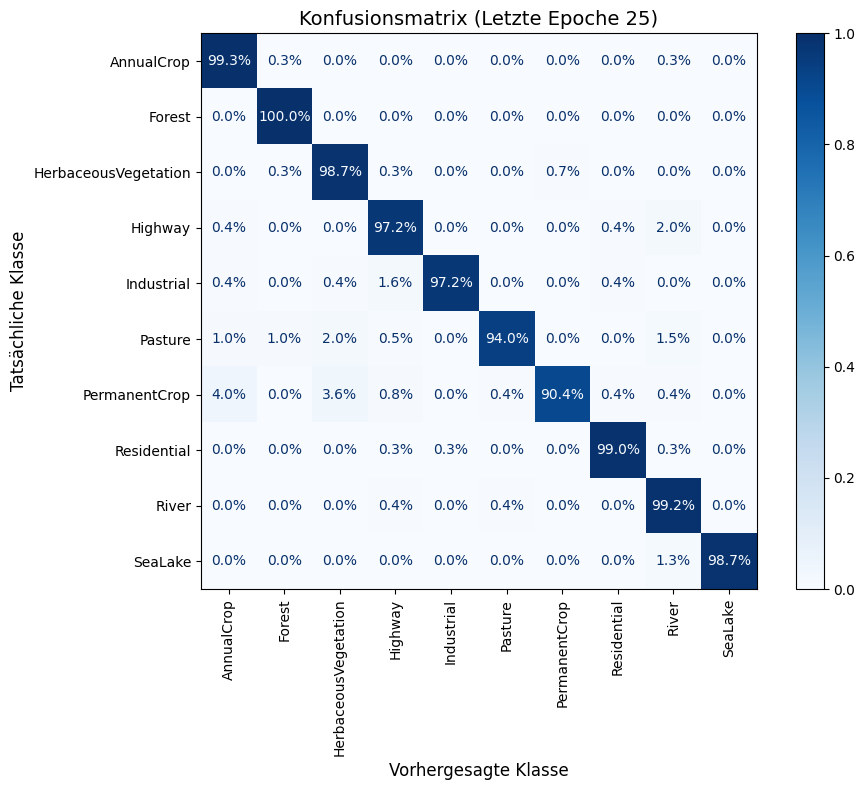

---> Training Epoch 26/150 | Target LR: 5.0000e-04



    Epoch 26 Training Summary: Loss: 0.9183 | Accuracy: 0.5648 | Final LR: 3.7877e-04 | Duration: 70.04s
---> Validation Epoch 26/150



    Epoch 26 Validation Summary: Loss: 0.5802 | Accuracy: 0.9819 | Duration: 6.39s
---> Best non-SWA model state saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_best_non_swa.pth

--- Konfusionsmatrix nach letzter Epoche (26) ---
---> Validation Epoch 26/150



    Epoch 26 Validation Summary: Loss: 0.5802 | Accuracy: 0.9819 | Duration: 6.55s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 98.33   0.33   0.     0.33   0.     1.     0.     0.     0.     0.  ]
 [  0.   100.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.67  97.33   0.33   0.     0.     1.33   0.     0.     0.33]
 [  0.     0.     0.    98.     0.     0.4    0.4    0.4    0.8    0.  ]
 [  0.     0.     0.4    0.4   98.8    0.     0.     0.4    0.     0.  ]
 [  1.     0.5    1.     0.     0.    96.     0.5    0.     1.     0.  ]
 [  0.4    0.     3.2    0.4    0.     0.    96.     0.     0.     0.  ]
 [  0.     0.     0.     0.     1.67   0.     0.    98.33   0.     0.  ]
 [  0.     0.     0.     0.4    0.     0.8    0.     0.    98.     0.8 ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


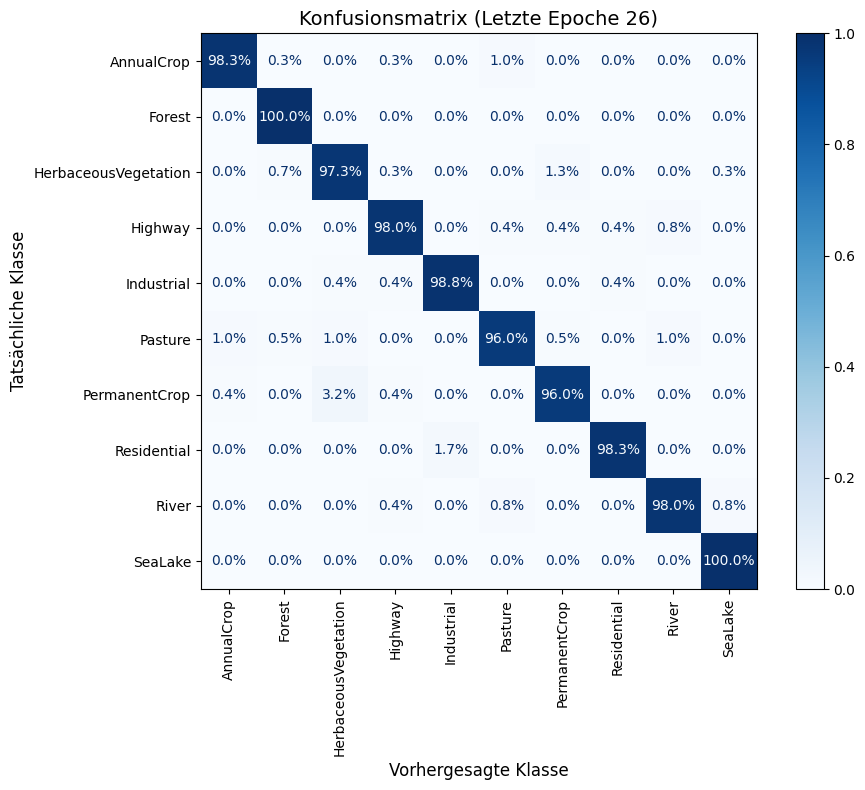

---> Training Epoch 27/150 | Target LR: 5.0000e-04



    Epoch 27 Training Summary: Loss: 0.8970 | Accuracy: 0.5739 | Final LR: 3.6811e-04 | Duration: 70.05s
---> Validation Epoch 27/150



    Epoch 27 Validation Summary: Loss: 0.5772 | Accuracy: 0.9807 | Duration: 6.56s
---> Best non-SWA model state saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_best_non_swa.pth

--- Konfusionsmatrix nach letzter Epoche (27) ---
---> Validation Epoch 27/150



    Epoch 27 Validation Summary: Loss: 0.5772 | Accuracy: 0.9807 | Duration: 6.64s
Konfusionsmatrix (normalisiert auf Zeilen):
[[99.    0.33  0.    0.    0.    0.    0.67  0.    0.    0.  ]
 [ 0.   99.67  0.33  0.    0.    0.    0.    0.    0.    0.  ]
 [ 1.    0.33 96.67  0.33  0.    0.    1.33  0.    0.    0.33]
 [ 0.    0.    0.   98.    0.    0.4   0.4   0.    1.2   0.  ]
 [ 0.4   0.    0.    0.4  98.8   0.    0.    0.4   0.    0.  ]
 [ 1.    1.5   0.5   0.    0.   96.5   0.    0.    0.5   0.  ]
 [ 1.2   0.    2.    0.4   0.    0.   96.    0.    0.4   0.  ]
 [ 0.    0.    0.    0.33  1.    0.    0.67 97.67  0.33  0.  ]
 [ 0.    0.    0.    0.    0.    0.8   0.    0.   98.8   0.4 ]
 [ 0.    0.    0.    0.    0.67  0.    0.    0.    0.33 99.  ]]


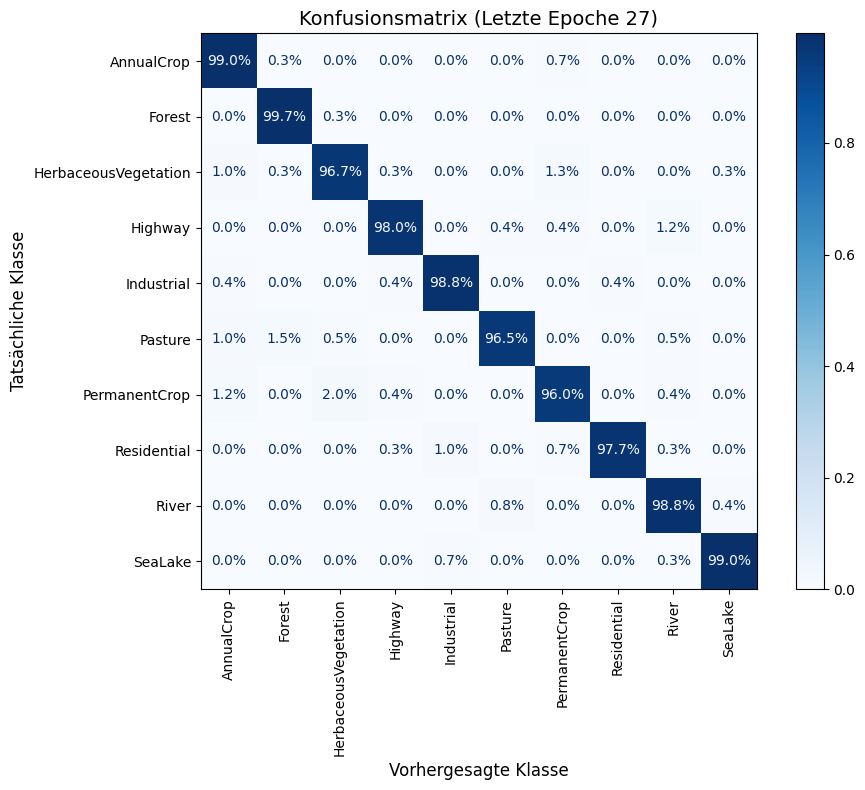

---> Training Epoch 28/150 | Target LR: 5.0000e-04



    Epoch 28 Training Summary: Loss: 0.8992 | Accuracy: 0.5749 | Final LR: 3.5717e-04 | Duration: 70.00s
---> Validation Epoch 28/150



    Epoch 28 Validation Summary: Loss: 0.7482 | Accuracy: 0.9507 | Duration: 6.38s
---> Val loss did not improve for 1 epochs.

--- Konfusionsmatrix nach letzter Epoche (28) ---
---> Validation Epoch 28/150



    Epoch 28 Validation Summary: Loss: 0.7482 | Accuracy: 0.9507 | Duration: 6.49s
Konfusionsmatrix (normalisiert auf Zeilen):
[[98.33  0.33  0.    0.33  0.    0.33  0.33  0.    0.33  0.  ]
 [ 0.   99.67  0.33  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.67 98.33  0.    0.33  0.    0.67  0.    0.    0.  ]
 [ 0.4   0.    0.   96.8   0.    0.4   0.    0.4   2.    0.  ]
 [ 0.    0.    0.    0.8  98.4   0.    0.    0.8   0.    0.  ]
 [ 1.5   0.    0.5   0.    0.   96.    0.5   0.    1.5   0.  ]
 [ 1.2   0.    4.4   0.4   0.    0.   93.6   0.4   0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.33 99.33  0.33  0.  ]
 [ 0.    0.    0.    0.    0.    0.4   0.    0.   99.6   0.  ]
 [ 0.    8.    3.67  0.    4.33  0.    0.    0.   11.67 72.33]]


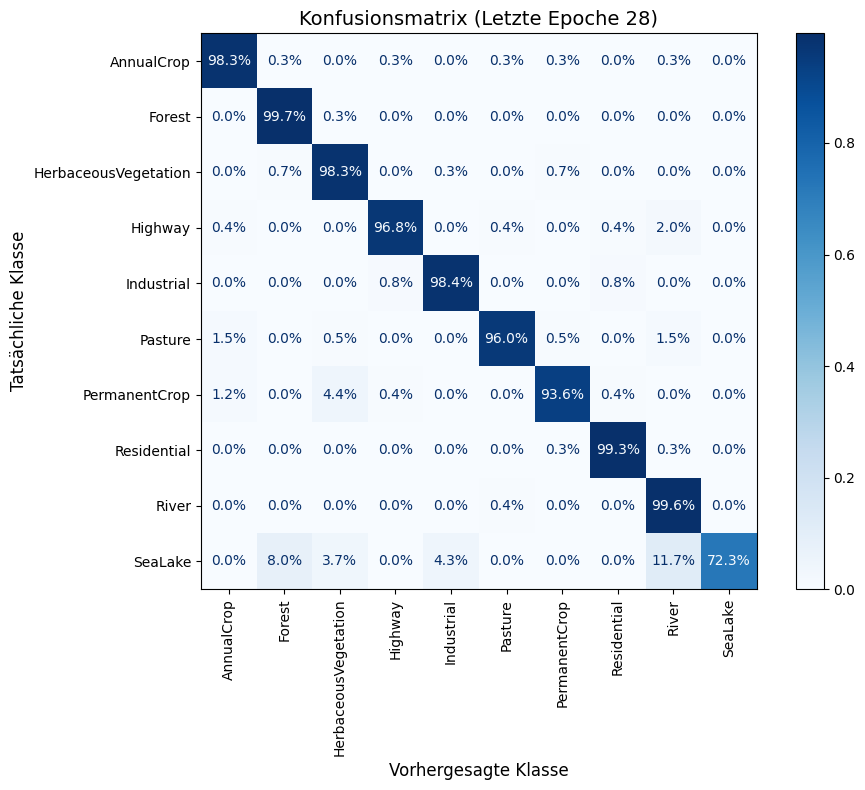

---> Training Epoch 29/150 | Target LR: 5.0000e-04



    Epoch 29 Training Summary: Loss: 0.8770 | Accuracy: 0.5565 | Final LR: 3.4598e-04 | Duration: 70.17s
---> Validation Epoch 29/150



    Epoch 29 Validation Summary: Loss: 0.6020 | Accuracy: 0.9767 | Duration: 6.58s
---> Val loss did not improve for 2 epochs.

--- Konfusionsmatrix nach letzter Epoche (29) ---
---> Validation Epoch 29/150



    Epoch 29 Validation Summary: Loss: 0.6020 | Accuracy: 0.9767 | Duration: 6.49s
Konfusionsmatrix (normalisiert auf Zeilen):
[[99.67  0.33  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   99.33  0.33  0.    0.    0.    0.    0.    0.    0.33]
 [ 0.    0.   99.    0.    0.    0.33  0.67  0.    0.    0.  ]
 [ 0.4   0.    0.   96.8   0.    0.    0.4   0.4   2.    0.  ]
 [ 0.4   0.    0.    0.4  98.8   0.    0.    0.4   0.    0.  ]
 [ 3.    0.5   0.5   0.    0.   93.5   1.5   0.    1.    0.  ]
 [ 2.    0.    3.6   0.4   0.    0.   94.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.67  0.    0.67 98.33  0.33  0.  ]
 [ 0.    0.    0.    0.    0.    0.4   0.    0.   99.6   0.  ]
 [ 0.    0.    0.    0.    0.    0.    4.    0.    0.   96.  ]]


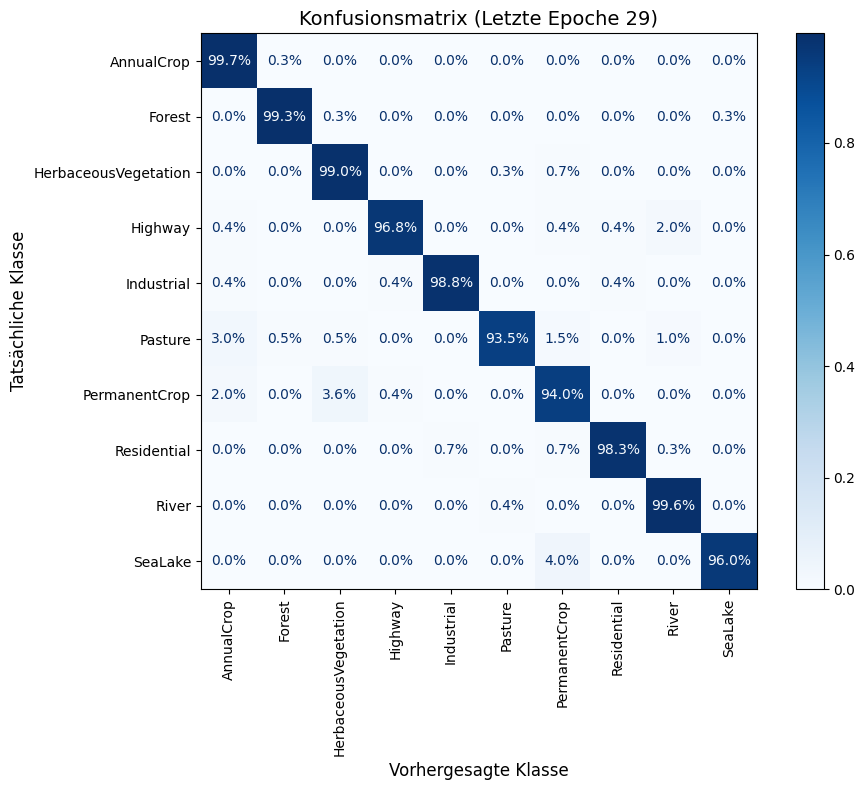

---> Training Epoch 30/150 | Target LR: 5.0000e-04



    Epoch 30 Training Summary: Loss: 0.9072 | Accuracy: 0.5371 | Final LR: 3.3455e-04 | Duration: 69.95s
---> Validation Epoch 30/150



    Epoch 30 Validation Summary: Loss: 0.5840 | Accuracy: 0.9830 | Duration: 6.57s
---> Val loss did not improve for 3 epochs.
---> Periodic checkpoint saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_epoch_30.pth

--- Konfusionsmatrix nach letzter Epoche (30) ---
---> Validation Epoch 30/150



    Epoch 30 Validation Summary: Loss: 0.5840 | Accuracy: 0.9830 | Duration: 6.27s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.67   0.33   0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.    98.67   0.     0.     0.33   1.     0.     0.     0.  ]
 [  0.     0.     0.    97.2    0.     0.     0.4    0.8    1.6    0.  ]
 [  0.     0.     0.     0.    99.6    0.     0.     0.4    0.     0.  ]
 [  1.5    0.5    0.5    0.     0.    96.5    0.     0.     1.     0.  ]
 [  3.6    0.     3.2    0.8    0.     0.    92.4    0.     0.     0.  ]
 [  0.     0.     0.     0.     1.     0.     0.33  98.67   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.2    0.4 ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


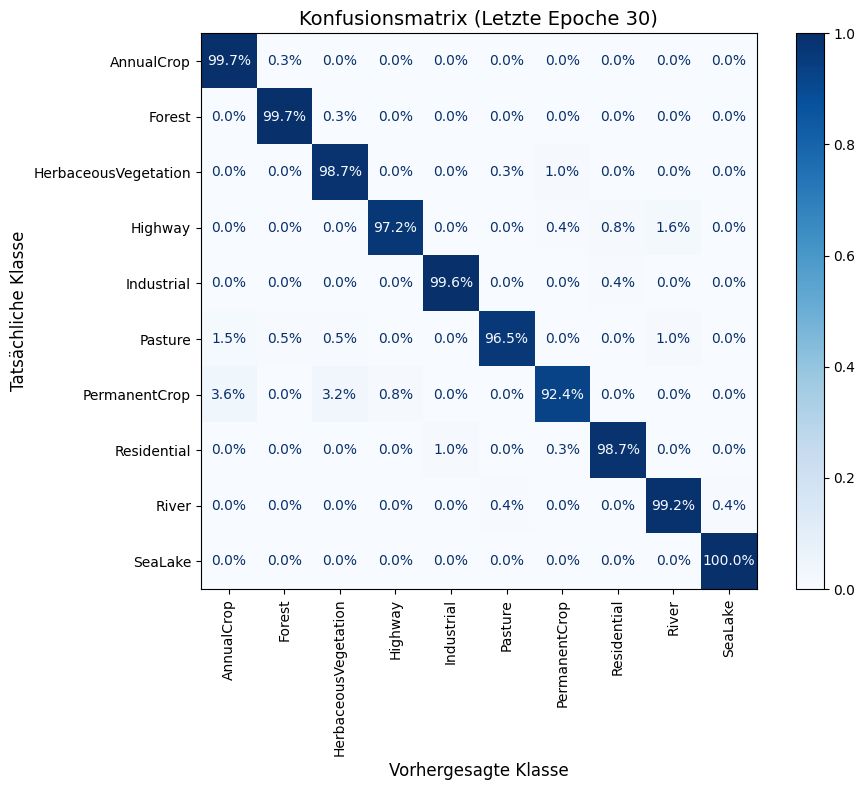

---> Training Epoch 31/150 | Target LR: 5.0000e-04



    Epoch 31 Training Summary: Loss: 0.8972 | Accuracy: 0.5553 | Final LR: 3.2293e-04 | Duration: 70.07s
---> Validation Epoch 31/150



    Epoch 31 Validation Summary: Loss: 0.6239 | Accuracy: 0.9678 | Duration: 6.59s
---> Val loss did not improve for 4 epochs.

--- Konfusionsmatrix nach letzter Epoche (31) ---
---> Validation Epoch 31/150



    Epoch 31 Validation Summary: Loss: 0.6239 | Accuracy: 0.9678 | Duration: 6.74s
Konfusionsmatrix (normalisiert auf Zeilen):
[[99.67  0.33  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   99.33  0.33  0.    0.    0.    0.    0.    0.    0.33]
 [ 0.    0.   98.    0.    0.33  0.33  1.    0.    0.33  0.  ]
 [ 1.6   0.    0.4  94.4   0.4   0.    0.4   0.4   2.4   0.  ]
 [ 0.    0.    0.    0.4  99.2   0.    0.    0.4   0.    0.  ]
 [ 1.5   0.    0.5   0.    0.   97.5   0.    0.    0.5   0.  ]
 [ 3.6   0.    2.8   0.4   0.    0.   92.8   0.    0.4   0.  ]
 [ 0.    0.    0.    0.33  0.67  0.    0.   98.67  0.33  0.  ]
 [ 0.4   0.    0.    0.    0.    0.8   0.    0.   98.4   0.4 ]
 [ 0.33  4.33  0.    0.    0.    0.    0.    0.    5.67 89.67]]


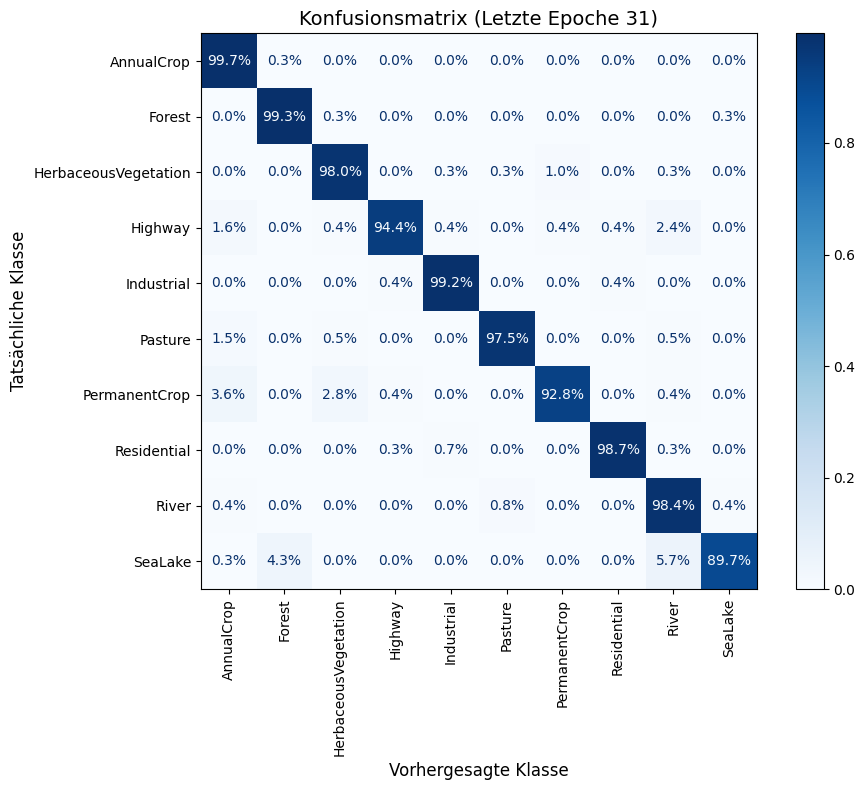

---> Training Epoch 32/150 | Target LR: 5.0000e-04



    Epoch 32 Training Summary: Loss: 0.8906 | Accuracy: 0.5660 | Final LR: 3.1112e-04 | Duration: 70.01s
---> Validation Epoch 32/150



    Epoch 32 Validation Summary: Loss: 0.6361 | Accuracy: 0.9674 | Duration: 6.58s
---> Val loss did not improve for 5 epochs.

--- Konfusionsmatrix nach letzter Epoche (32) ---
---> Validation Epoch 32/150



    Epoch 32 Validation Summary: Loss: 0.6361 | Accuracy: 0.9674 | Duration: 6.56s
Konfusionsmatrix (normalisiert auf Zeilen):
[[99.67  0.33  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   99.67  0.33  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.   98.33  0.33  0.    0.33  1.    0.    0.    0.  ]
 [ 0.    0.    0.   97.6   0.    0.    0.4   0.4   1.6   0.  ]
 [ 0.    0.    0.    1.2  98.4   0.    0.    0.4   0.    0.  ]
 [ 1.5   0.    0.5   0.    0.   97.5   0.    0.    0.5   0.  ]
 [ 1.6   0.    2.8   0.8   0.    0.   94.8   0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.33  0.    0.33 99.33  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.4   0.    0.   99.6   0.  ]
 [ 0.    0.    0.    0.    7.    0.    0.    0.    9.67 83.33]]


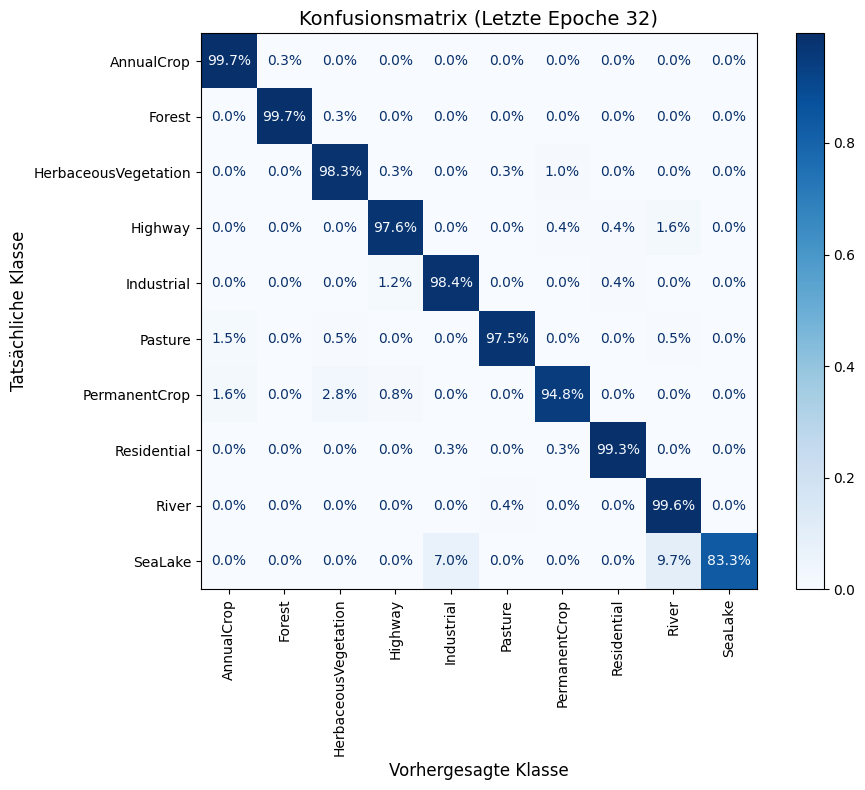

---> Training Epoch 33/150 | Target LR: 5.0000e-04



    Epoch 33 Training Summary: Loss: 0.8850 | Accuracy: 0.5768 | Final LR: 2.9918e-04 | Duration: 70.15s
---> Validation Epoch 33/150



    Epoch 33 Validation Summary: Loss: 0.5951 | Accuracy: 0.9793 | Duration: 6.71s
---> Val loss did not improve for 6 epochs.

--- Konfusionsmatrix nach letzter Epoche (33) ---
---> Validation Epoch 33/150



    Epoch 33 Validation Summary: Loss: 0.5951 | Accuracy: 0.9793 | Duration: 6.39s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 98.     0.33   0.     0.     0.     0.33   1.     0.     0.     0.33]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.67  97.33   0.     0.     0.67   0.67   0.     0.     0.67]
 [  0.     0.     0.    97.2    0.     0.     0.4    0.4    2.     0.  ]
 [  0.     0.     0.     0.    98.8    0.     0.     1.2    0.     0.  ]
 [  1.     1.     0.5    0.     0.    97.     0.     0.     0.5    0.  ]
 [  1.6    0.     3.2    0.4    0.     0.4   94.     0.     0.4    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.   100.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.8    0.     0.    98.4    0.8 ]
 [  0.     2.     0.     0.     0.     0.     0.     0.     0.    98.  ]]


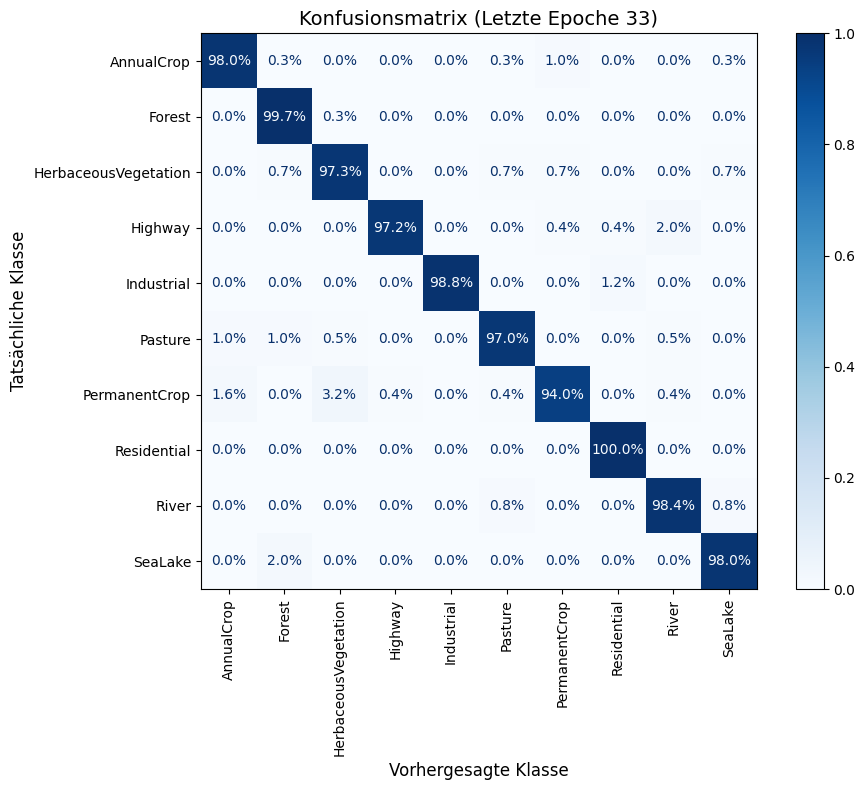

---> Training Epoch 34/150 | Target LR: 5.0000e-04



    Epoch 34 Training Summary: Loss: 0.8776 | Accuracy: 0.5524 | Final LR: 2.8711e-04 | Duration: 70.03s
---> Validation Epoch 34/150



    Epoch 34 Validation Summary: Loss: 0.5777 | Accuracy: 0.9841 | Duration: 6.44s
---> Val loss did not improve for 7 epochs.

--- Konfusionsmatrix nach letzter Epoche (34) ---
---> Validation Epoch 34/150



    Epoch 34 Validation Summary: Loss: 0.5777 | Accuracy: 0.9841 | Duration: 6.54s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.33   0.33   0.     0.     0.     0.     0.     0.     0.     0.33]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.    98.67   0.     0.     0.     1.     0.     0.     0.33]
 [  0.     0.     0.    97.2    0.4    0.4    0.4    0.     1.6    0.  ]
 [  0.     0.     0.     0.8   98.8    0.     0.     0.4    0.     0.  ]
 [  1.5    0.5    0.5    0.     0.    97.     0.     0.     0.5    0.  ]
 [  1.6    0.     2.     0.4    0.     0.    95.6    0.     0.4    0.  ]
 [  0.     0.     0.     0.     1.33   0.     0.33  98.     0.33   0.  ]
 [  0.     0.     0.     0.4    0.     0.4    0.     0.    98.8    0.4 ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


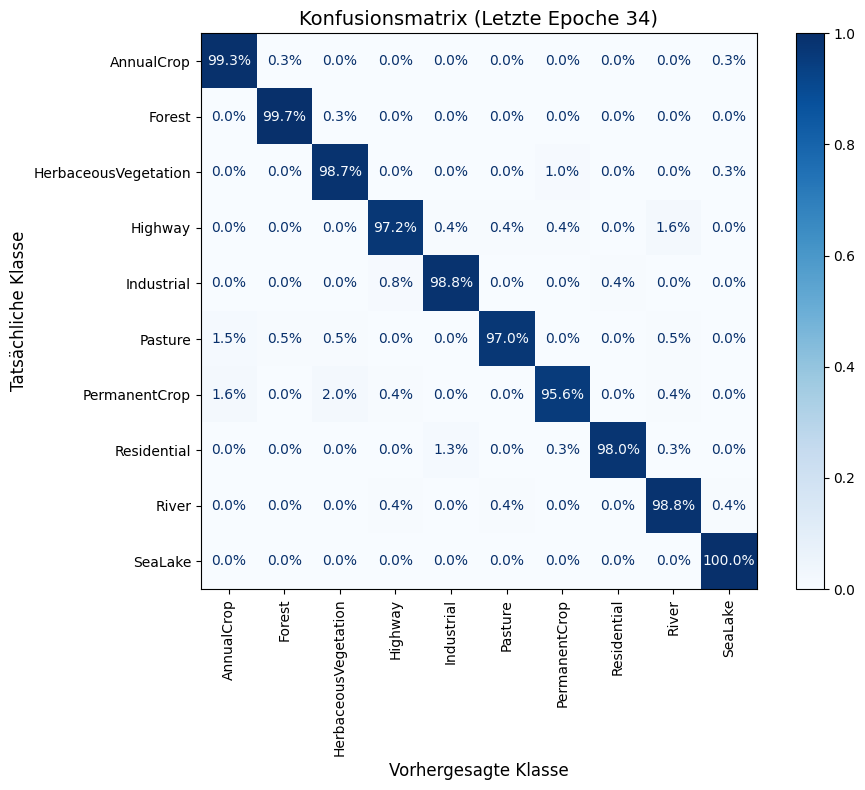

---> Training Epoch 35/150 | Target LR: 5.0000e-04



    Epoch 35 Training Summary: Loss: 0.8623 | Accuracy: 0.5431 | Final LR: 2.7496e-04 | Duration: 70.02s
---> Validation Epoch 35/150



    Epoch 35 Validation Summary: Loss: 0.5686 | Accuracy: 0.9856 | Duration: 6.88s
---> Best non-SWA model state saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_best_non_swa.pth

--- Konfusionsmatrix nach letzter Epoche (35) ---
---> Validation Epoch 35/150



    Epoch 35 Validation Summary: Loss: 0.5686 | Accuracy: 0.9856 | Duration: 6.37s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 97.67   0.33   0.33   0.     0.     0.     1.67   0.     0.     0.  ]
 [  0.    99.33   0.33   0.     0.     0.     0.     0.     0.     0.33]
 [  0.     0.    99.     0.     0.     0.     1.     0.     0.     0.  ]
 [  0.4    0.     0.    96.8    0.     0.     0.4    0.4    2.     0.  ]
 [  0.     0.     0.     0.4   99.2    0.     0.     0.4    0.     0.  ]
 [  1.     0.     0.5    0.     0.    98.     0.     0.     0.5    0.  ]
 [  1.2    0.     2.4    0.4    0.     0.    96.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.33   0.     0.    99.67   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.8    0.     0.    99.2    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


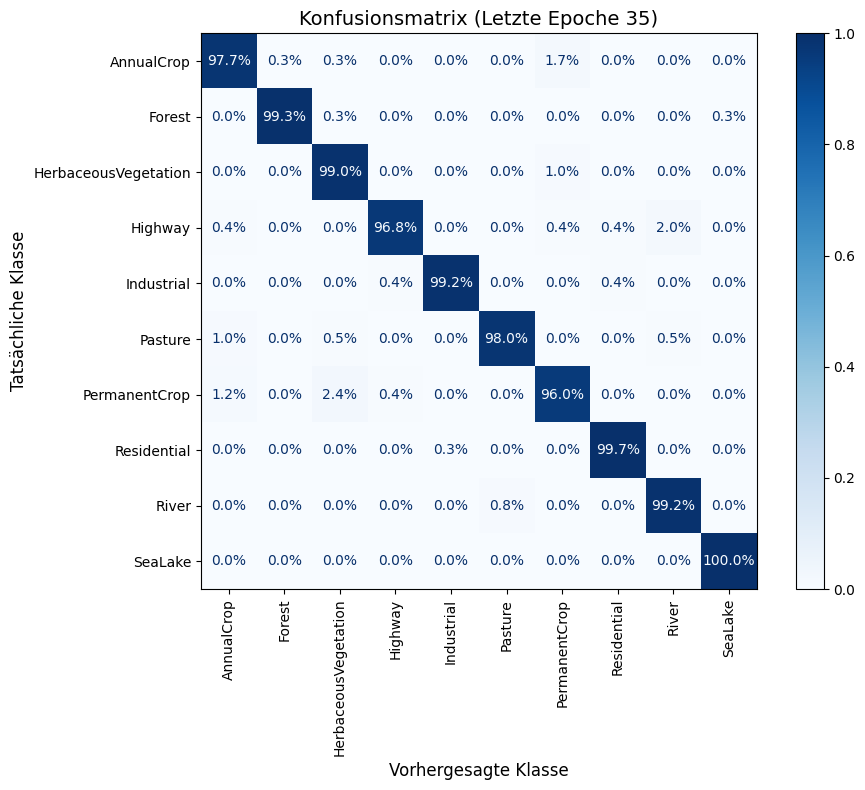

---> Training Epoch 36/150 | Target LR: 5.0000e-04



    Epoch 36 Training Summary: Loss: 0.8556 | Accuracy: 0.5347 | Final LR: 2.6274e-04 | Duration: 70.08s
---> Validation Epoch 36/150



    Epoch 36 Validation Summary: Loss: 0.6027 | Accuracy: 0.9856 | Duration: 6.54s
---> Val loss did not improve for 1 epochs.

--- Konfusionsmatrix nach letzter Epoche (36) ---
---> Validation Epoch 36/150



    Epoch 36 Validation Summary: Loss: 0.6027 | Accuracy: 0.9856 | Duration: 6.56s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.33   0.33   0.     0.     0.     0.     0.33   0.     0.     0.  ]
 [  0.    99.67   0.     0.     0.     0.     0.     0.     0.     0.33]
 [  0.     0.67  98.     0.     0.     0.     1.     0.     0.     0.33]
 [  0.     0.     0.    98.8    0.     0.     0.4    0.     0.8    0.  ]
 [  0.     0.     0.     1.6   98.     0.     0.     0.4    0.     0.  ]
 [  1.5    0.5    0.5    0.5    0.    96.5    0.     0.     0.5    0.  ]
 [  1.6    0.     2.     0.8    0.     0.    95.6    0.     0.     0.  ]
 [  0.     0.     0.     0.     0.67   0.     0.    99.     0.33   0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


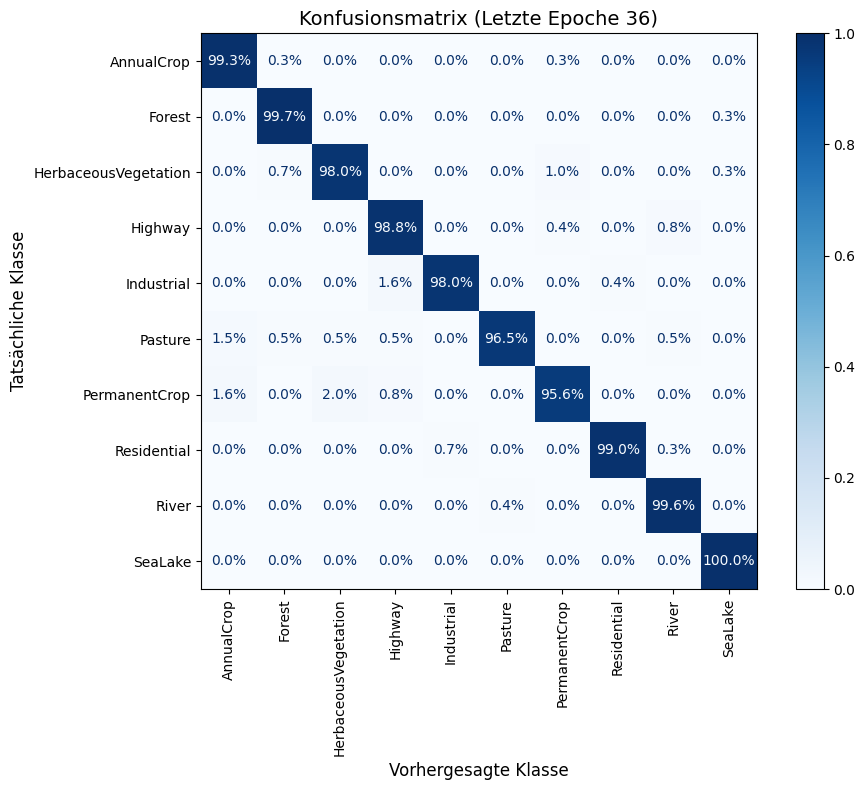

---> Training Epoch 37/150 | Target LR: 5.0000e-04



    Epoch 37 Training Summary: Loss: 0.8705 | Accuracy: 0.5765 | Final LR: 2.5050e-04 | Duration: 69.99s
---> Validation Epoch 37/150



    Epoch 37 Validation Summary: Loss: 0.5782 | Accuracy: 0.9811 | Duration: 6.65s
---> Val loss did not improve for 2 epochs.

--- Konfusionsmatrix nach letzter Epoche (37) ---
---> Validation Epoch 37/150



    Epoch 37 Validation Summary: Loss: 0.5782 | Accuracy: 0.9811 | Duration: 6.41s
Konfusionsmatrix (normalisiert auf Zeilen):
[[99.67  0.33  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   99.67  0.33  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.33  0.   98.    0.33  0.    0.33  1.    0.    0.    0.  ]
 [ 0.    0.    0.   98.4   0.    0.    0.    0.    1.6   0.  ]
 [ 0.    0.    0.    0.8  98.8   0.    0.    0.4   0.    0.  ]
 [ 2.    0.    0.5   0.    0.   96.    0.    0.    1.5   0.  ]
 [ 2.4   0.    3.2   1.2   0.    0.   92.8   0.    0.4   0.  ]
 [ 0.    0.    0.    0.    0.67  0.    0.   99.    0.33  0.  ]
 [ 0.    0.    0.    0.    0.    0.4   0.    0.   99.6   0.  ]
 [ 0.    0.    0.    0.67  0.    0.    0.    0.    1.33 98.  ]]


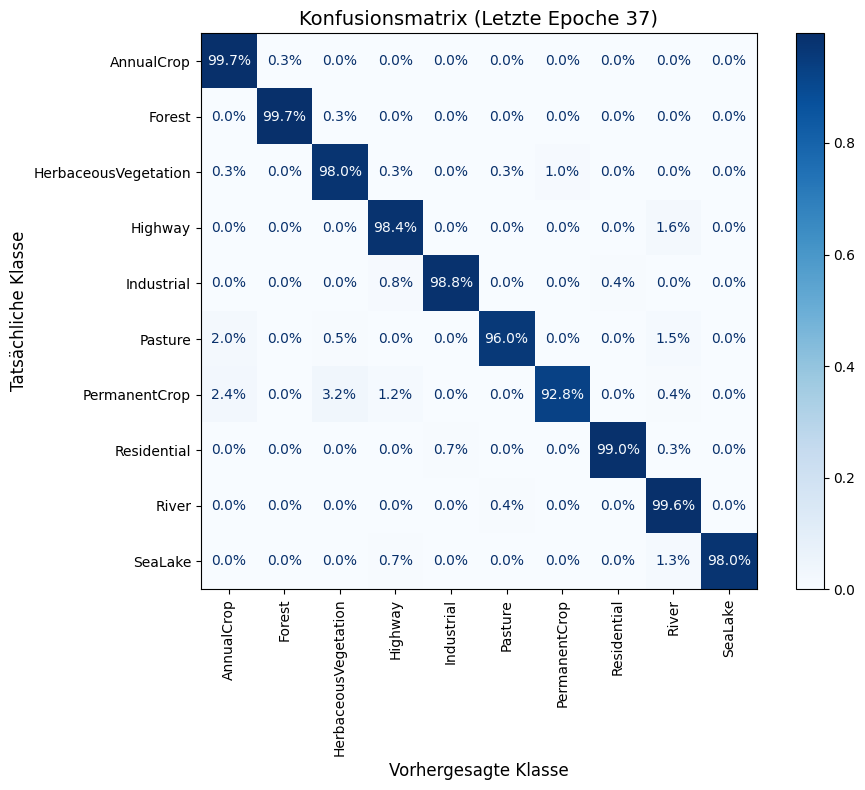

---> Training Epoch 38/150 | Target LR: 5.0000e-04



    Epoch 38 Training Summary: Loss: 0.8560 | Accuracy: 0.5791 | Final LR: 2.3826e-04 | Duration: 70.01s
---> Validation Epoch 38/150



    Epoch 38 Validation Summary: Loss: 0.5716 | Accuracy: 0.9830 | Duration: 6.49s
---> Val loss did not improve for 3 epochs.

--- Konfusionsmatrix nach letzter Epoche (38) ---
---> Validation Epoch 38/150



    Epoch 38 Validation Summary: Loss: 0.5716 | Accuracy: 0.9830 | Duration: 6.67s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 98.67   0.33   0.     0.     0.     1.     0.     0.     0.     0.  ]
 [  0.   100.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.33  98.33   0.     0.33   0.33   0.67   0.     0.     0.  ]
 [  0.4    0.     0.    97.2    0.     0.4    0.4    0.     1.6    0.  ]
 [  0.     0.     0.     1.2   98.4    0.     0.     0.4    0.     0.  ]
 [  1.     0.     0.5    0.     0.    97.5    0.     0.     1.     0.  ]
 [  2.8    0.     2.8    0.     0.     0.    94.     0.     0.4    0.  ]
 [  0.     0.     0.     0.33   0.     0.     0.    99.67   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.8    0.     0.    99.2    0.  ]
 [  0.     0.     1.     0.     0.     0.     0.     0.     0.    99.  ]]


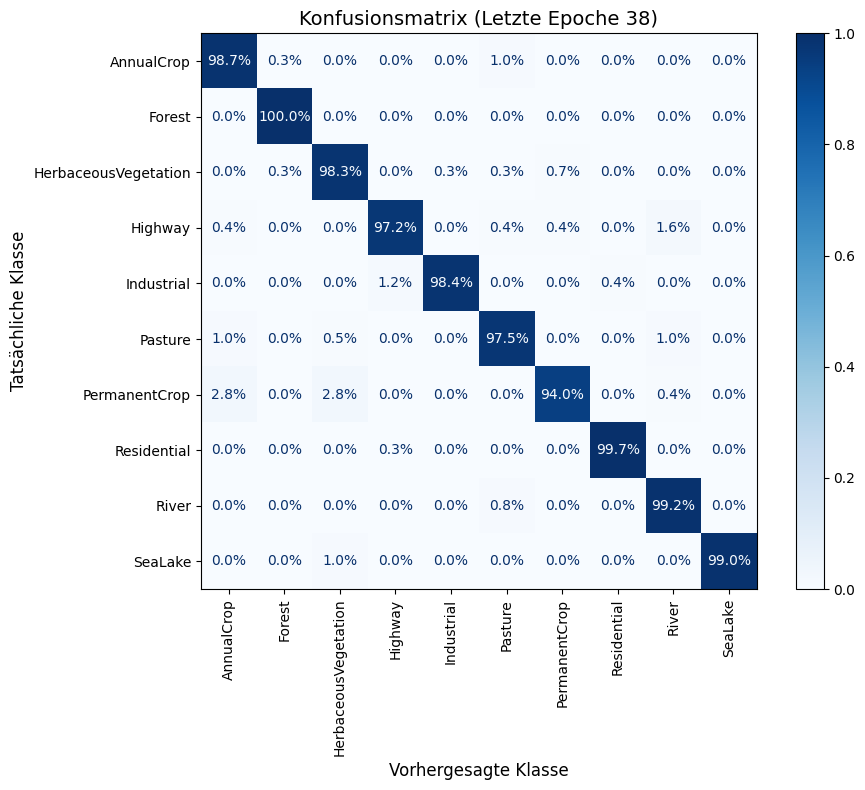

---> Training Epoch 39/150 | Target LR: 5.0000e-04



    Epoch 39 Training Summary: Loss: 0.8566 | Accuracy: 0.5435 | Final LR: 2.2604e-04 | Duration: 70.00s
---> Validation Epoch 39/150



    Epoch 39 Validation Summary: Loss: 0.5765 | Accuracy: 0.9852 | Duration: 6.65s
---> Val loss did not improve for 4 epochs.

--- Konfusionsmatrix nach letzter Epoche (39) ---
---> Validation Epoch 39/150



    Epoch 39 Validation Summary: Loss: 0.5765 | Accuracy: 0.9852 | Duration: 6.71s
Konfusionsmatrix (normalisiert auf Zeilen):
[[99.67  0.33  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   99.67  0.33  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.33 98.67  0.    0.    0.    1.    0.    0.    0.  ]
 [ 0.4   0.    0.   96.4   0.    0.    0.4   0.4   2.4   0.  ]
 [ 0.    0.    0.    0.4  99.2   0.    0.    0.4   0.    0.  ]
 [ 1.    0.5   0.5   0.    0.   97.5   0.    0.    0.5   0.  ]
 [ 1.2   0.    2.8   0.4   0.    0.   95.2   0.    0.4   0.  ]
 [ 0.    0.    0.    0.33  0.    0.    0.   99.33  0.33  0.  ]
 [ 0.    0.    0.    0.    0.    0.4   0.    0.   99.6   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.33  0.67 99.  ]]


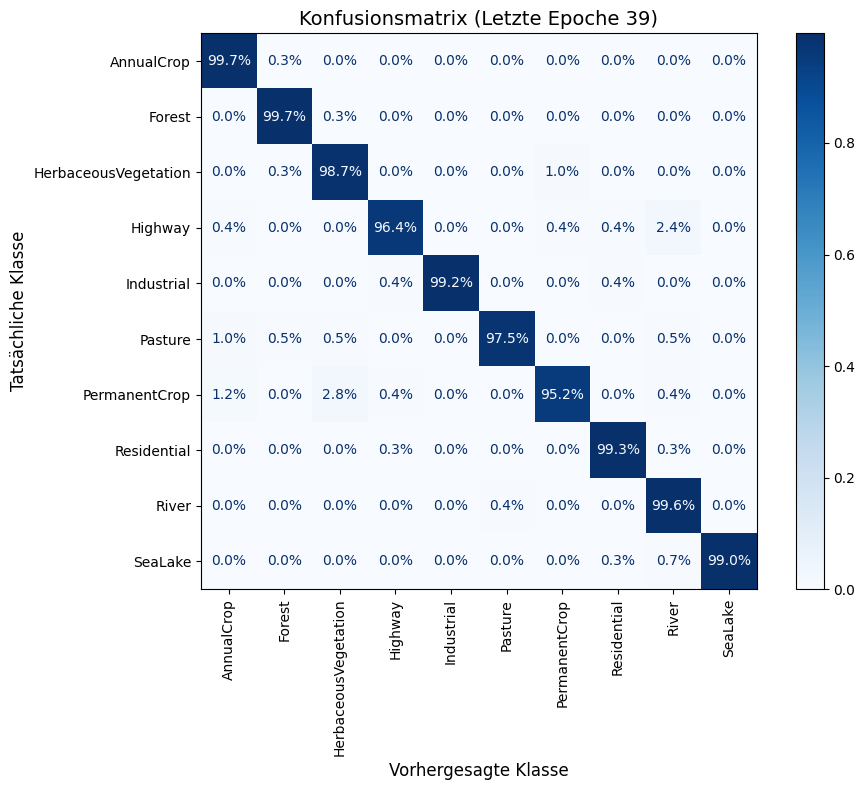

---> Training Epoch 40/150 | Target LR: 5.0000e-04



    Epoch 40 Training Summary: Loss: 0.8651 | Accuracy: 0.5584 | Final LR: 2.1389e-04 | Duration: 70.21s
---> Validation Epoch 40/150



    Epoch 40 Validation Summary: Loss: 0.5697 | Accuracy: 0.9844 | Duration: 6.68s
---> Val loss did not improve for 5 epochs.

--- Konfusionsmatrix nach letzter Epoche (40) ---
---> Validation Epoch 40/150



    Epoch 40 Validation Summary: Loss: 0.5697 | Accuracy: 0.9844 | Duration: 6.39s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.33   0.33   0.     0.     0.     0.     0.33   0.     0.     0.  ]
 [  0.    99.33   0.33   0.     0.     0.33   0.     0.     0.     0.  ]
 [  0.     0.    98.67   0.     0.     0.33   1.     0.     0.     0.  ]
 [  0.     0.     0.    96.8    0.     0.4    0.4    0.4    2.     0.  ]
 [  0.     0.     0.     0.   100.     0.     0.     0.     0.     0.  ]
 [  1.5    0.5    0.5    0.     0.    97.     0.     0.     0.5    0.  ]
 [  1.2    0.     3.2    0.     0.     0.    95.2    0.     0.4    0.  ]
 [  0.     0.     0.     0.33   1.     0.     0.33  98.33   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    98.8    0.8 ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


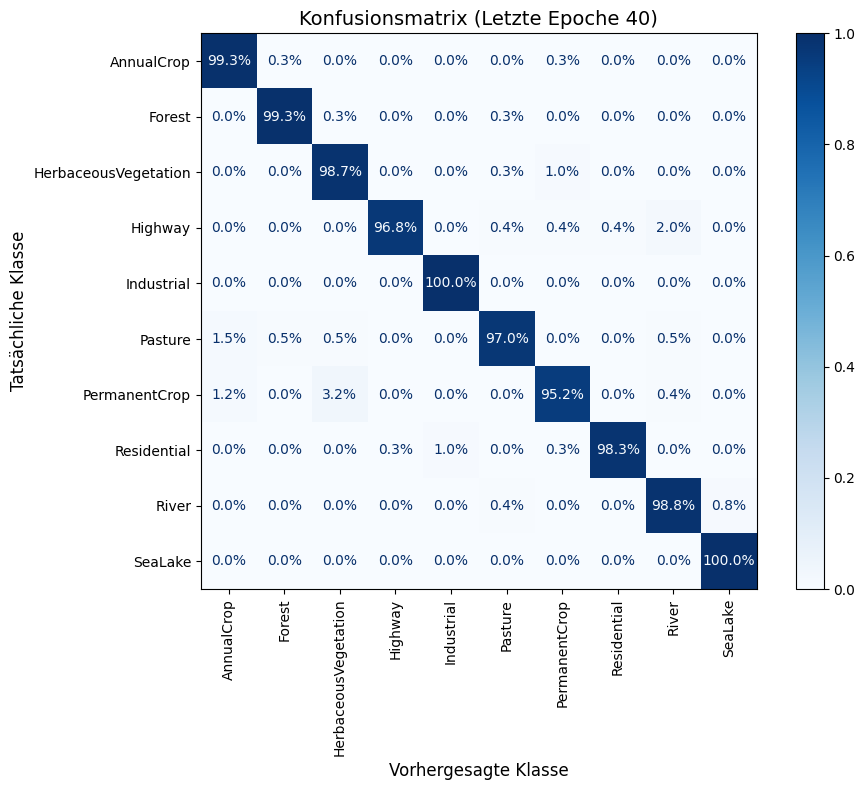

---> Training Epoch 41/150 | Target LR: 5.0000e-04



    Epoch 41 Training Summary: Loss: 0.8685 | Accuracy: 0.5500 | Final LR: 2.0182e-04 | Duration: 70.17s
---> Validation Epoch 41/150



    Epoch 41 Validation Summary: Loss: 0.6031 | Accuracy: 0.9748 | Duration: 6.58s
---> Val loss did not improve for 6 epochs.

--- Konfusionsmatrix nach letzter Epoche (41) ---
---> Validation Epoch 41/150



    Epoch 41 Validation Summary: Loss: 0.6031 | Accuracy: 0.9748 | Duration: 6.64s
Konfusionsmatrix (normalisiert auf Zeilen):
[[99.    0.33  0.33  0.    0.    0.33  0.    0.    0.    0.  ]
 [ 0.   99.33  0.33  0.    0.    0.33  0.    0.    0.    0.  ]
 [ 0.    0.67 98.    0.    0.    0.33  1.    0.    0.    0.  ]
 [ 0.    0.    0.   97.2   0.    0.8   0.4   0.    1.6   0.  ]
 [ 0.4   0.    0.    1.2  98.    0.    0.    0.4   0.    0.  ]
 [ 0.5   0.    0.5   0.    0.   98.5   0.    0.    0.5   0.  ]
 [ 1.2   0.    4.    0.4   0.    0.   94.4   0.    0.    0.  ]
 [ 0.    0.    0.    0.33  0.67  0.    0.   99.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.8   0.    0.   99.2   0.  ]
 [ 0.    0.    1.67  0.    5.67  0.    0.    0.    0.33 92.33]]


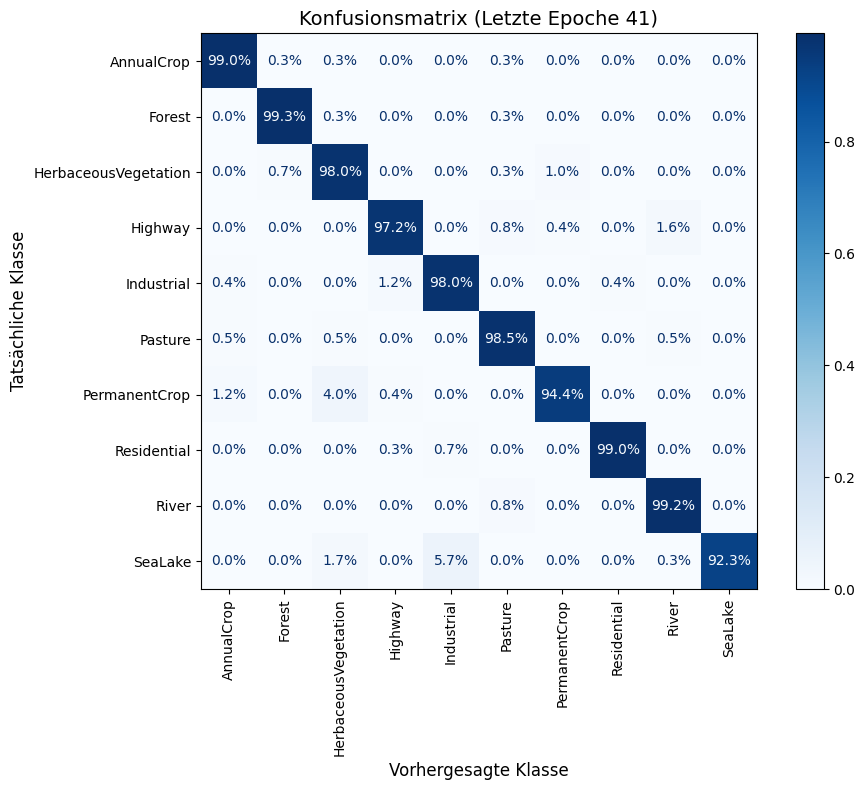

---> Training Epoch 42/150 | Target LR: 5.0000e-04



    Epoch 42 Training Summary: Loss: 0.8595 | Accuracy: 0.5712 | Final LR: 1.8988e-04 | Duration: 70.09s
---> Validation Epoch 42/150



    Epoch 42 Validation Summary: Loss: 0.5675 | Accuracy: 0.9822 | Duration: 6.76s
---> Best non-SWA model state saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_best_non_swa.pth

--- Konfusionsmatrix nach letzter Epoche (42) ---
---> Validation Epoch 42/150



    Epoch 42 Validation Summary: Loss: 0.5675 | Accuracy: 0.9822 | Duration: 6.69s
Konfusionsmatrix (normalisiert auf Zeilen):
[[98.33  0.33  0.    0.    0.    0.67  0.67  0.    0.    0.  ]
 [ 0.   99.67  0.33  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.33 98.33  0.    0.    0.    1.    0.    0.    0.33]
 [ 0.    0.    0.   97.2   0.    0.4   0.4   0.4   1.6   0.  ]
 [ 0.    0.    0.4   0.8  98.    0.    0.    0.8   0.    0.  ]
 [ 1.5   1.    0.5   0.    0.   96.5   0.    0.    0.5   0.  ]
 [ 1.6   0.    2.8   0.4   0.    0.   94.8   0.    0.4   0.  ]
 [ 0.    0.    0.    0.    0.67  0.    0.   99.33  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.4   0.    0.   99.6   0.  ]
 [ 0.    0.    0.    0.    0.33  0.    0.    0.    0.33 99.33]]


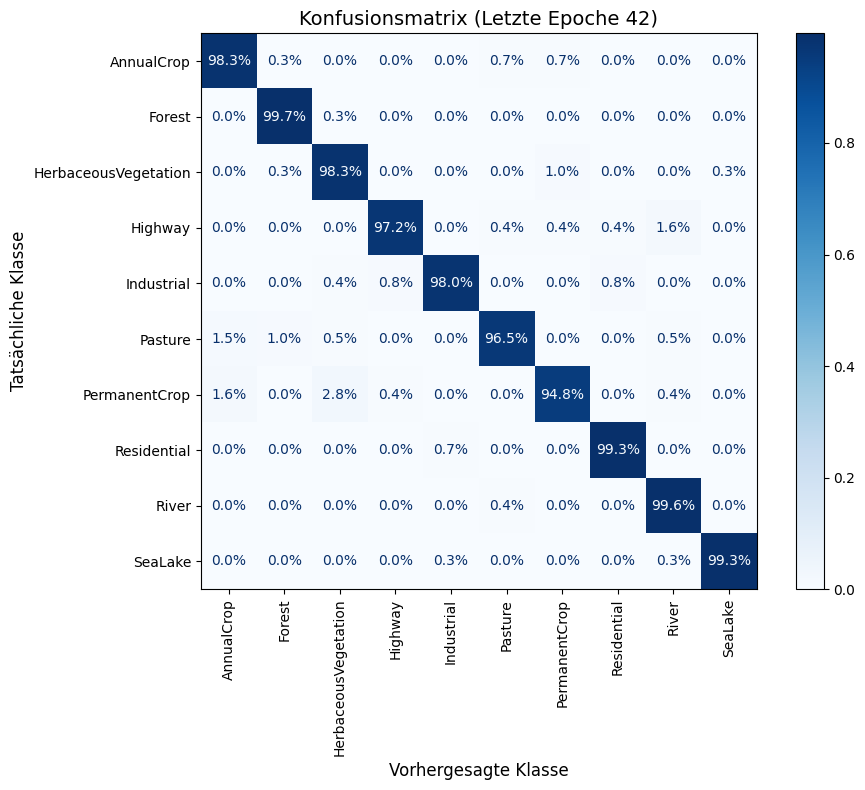

---> Training Epoch 43/150 | Target LR: 5.0000e-04



    Epoch 43 Training Summary: Loss: 0.8423 | Accuracy: 0.5557 | Final LR: 1.7807e-04 | Duration: 69.97s
---> Validation Epoch 43/150



    Epoch 43 Validation Summary: Loss: 0.5550 | Accuracy: 0.9859 | Duration: 6.87s
---> Best non-SWA model state saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_best_non_swa.pth

--- Konfusionsmatrix nach letzter Epoche (43) ---
---> Validation Epoch 43/150



    Epoch 43 Validation Summary: Loss: 0.5550 | Accuracy: 0.9859 | Duration: 6.55s
Konfusionsmatrix (normalisiert auf Zeilen):
[[99.67  0.33  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   99.67  0.33  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.   99.33  0.    0.    0.33  0.33  0.    0.    0.  ]
 [ 0.4   0.    0.   97.2   0.    0.    0.4   0.4   1.6   0.  ]
 [ 0.    0.    0.    0.   99.2   0.    0.    0.8   0.    0.  ]
 [ 1.5   0.    0.5   0.    0.   97.5   0.    0.    0.5   0.  ]
 [ 2.    0.    4.    0.4   0.    0.   93.2   0.    0.4   0.  ]
 [ 0.    0.    0.    0.    0.33  0.    0.   99.67  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.4   0.    0.   99.6   0.  ]
 [ 0.    0.    0.33  0.    0.    0.    0.    0.    0.   99.67]]


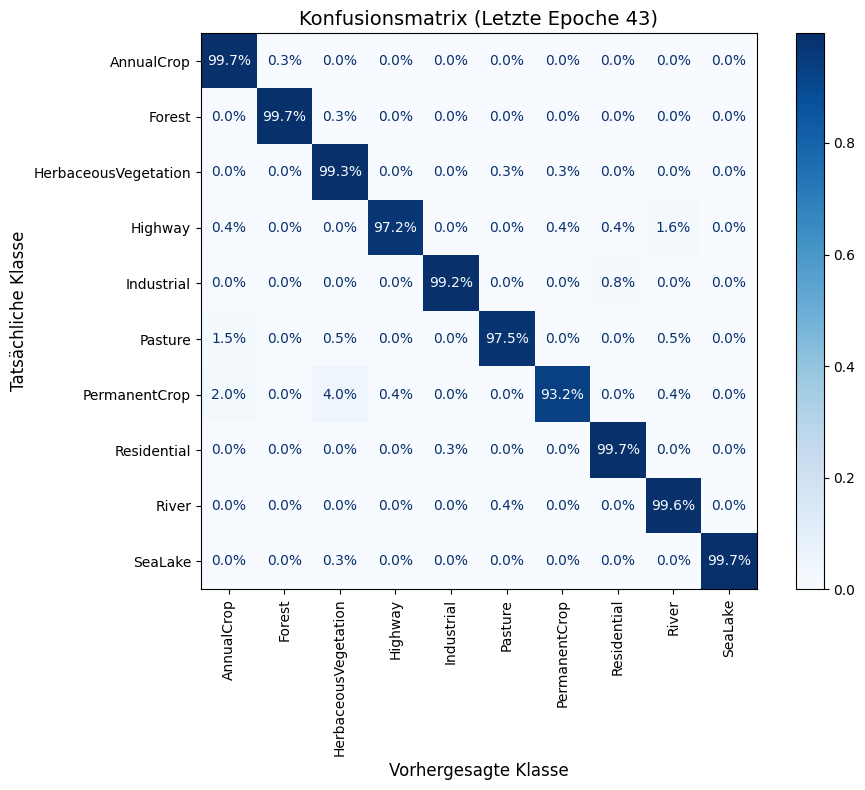

---> Training Epoch 44/150 | Target LR: 5.0000e-04



    Epoch 44 Training Summary: Loss: 0.8551 | Accuracy: 0.5688 | Final LR: 1.6645e-04 | Duration: 69.94s
---> Validation Epoch 44/150



    Epoch 44 Validation Summary: Loss: 0.5857 | Accuracy: 0.9811 | Duration: 6.91s
---> Val loss did not improve for 1 epochs.

--- Konfusionsmatrix nach letzter Epoche (44) ---
---> Validation Epoch 44/150



    Epoch 44 Validation Summary: Loss: 0.5857 | Accuracy: 0.9811 | Duration: 6.84s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.33   0.33   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.33   0.67  97.67   0.33   0.     0.     1.     0.     0.     0.  ]
 [  0.4    0.     0.    96.8    0.     0.     0.4    0.8    1.6    0.  ]
 [  0.4    0.     0.     0.4   98.4    0.     0.     0.8    0.     0.  ]
 [  3.     2.5    0.5    0.     0.    93.     0.5    0.     0.5    0.  ]
 [  1.6    0.     2.8    0.     0.     0.    95.2    0.     0.4    0.  ]
 [  0.     0.     0.     0.     0.33   0.     0.    99.67   0.     0.  ]
 [  0.4    0.     0.     0.     0.     0.4    0.     0.    99.2    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


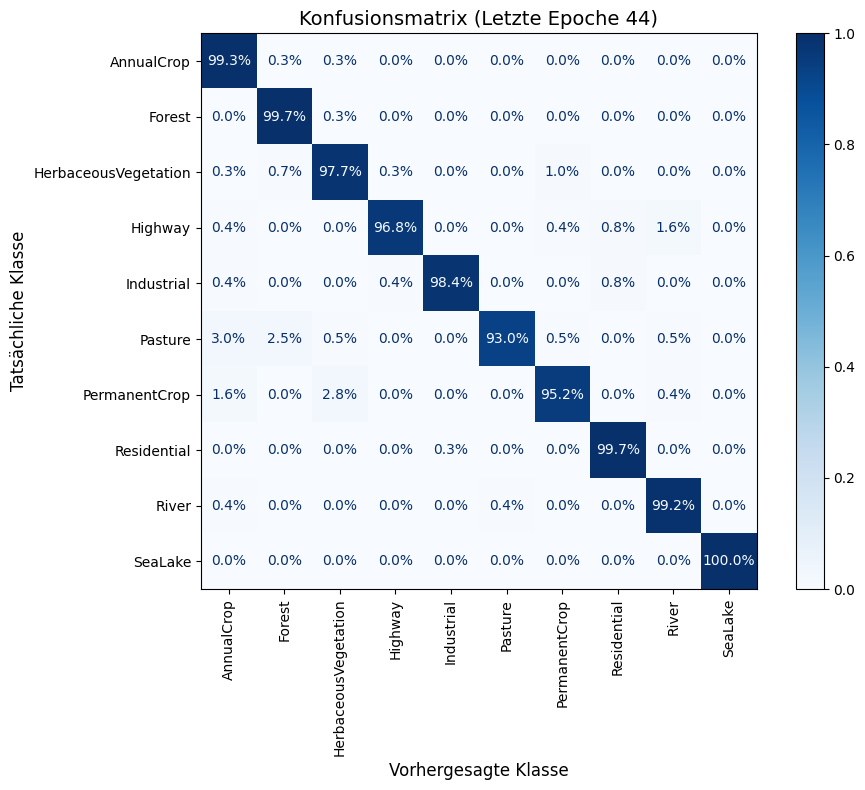

---> Training Epoch 45/150 | Target LR: 5.0000e-04



    Epoch 45 Training Summary: Loss: 0.8549 | Accuracy: 0.5764 | Final LR: 1.5502e-04 | Duration: 70.00s
---> Validation Epoch 45/150



    Epoch 45 Validation Summary: Loss: 0.5696 | Accuracy: 0.9841 | Duration: 6.94s
---> Val loss did not improve for 2 epochs.
---> Periodic checkpoint saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_epoch_45.pth

--- Konfusionsmatrix nach letzter Epoche (45) ---
---> Validation Epoch 45/150



    Epoch 45 Validation Summary: Loss: 0.5696 | Accuracy: 0.9841 | Duration: 6.61s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 98.67   0.33   0.33   0.     0.     0.     0.67   0.     0.     0.  ]
 [  0.    99.33   0.33   0.     0.     0.33   0.     0.     0.     0.  ]
 [  0.     0.33  98.33   0.     0.     0.33   1.     0.     0.     0.  ]
 [  0.     0.     0.    97.6    0.     0.4    0.     0.8    1.2    0.  ]
 [  0.     0.     0.     0.    99.6    0.     0.     0.4    0.     0.  ]
 [  1.5    0.5    0.5    0.     0.    97.     0.     0.     0.5    0.  ]
 [  2.     0.     3.2    0.4    0.     0.    94.4    0.     0.     0.  ]
 [  0.     0.     0.     0.33   1.     0.     0.    98.67   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


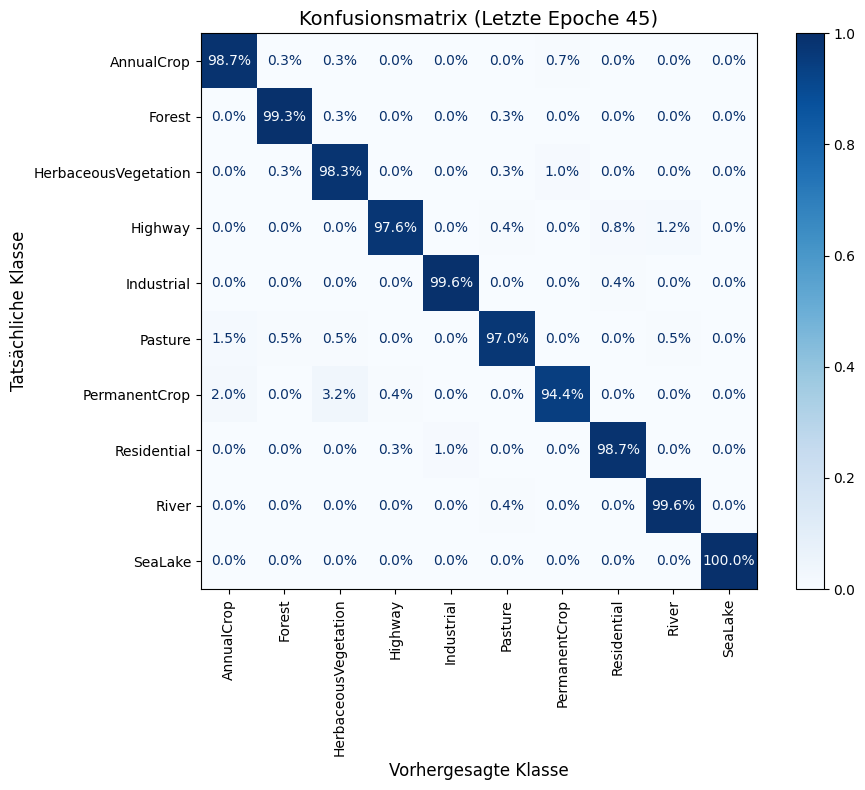

---> Training Epoch 46/150 | Target LR: 5.0000e-04



    Epoch 46 Training Summary: Loss: 0.8446 | Accuracy: 0.5579 | Final LR: 1.4383e-04 | Duration: 69.98s
---> Validation Epoch 46/150



    Epoch 46 Validation Summary: Loss: 0.5906 | Accuracy: 0.9844 | Duration: 6.76s
---> Val loss did not improve for 3 epochs.

--- Konfusionsmatrix nach letzter Epoche (46) ---
---> Validation Epoch 46/150



    Epoch 46 Validation Summary: Loss: 0.5906 | Accuracy: 0.9844 | Duration: 6.73s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 98.     0.33   0.     0.     0.     0.67   1.     0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.67  98.     0.     0.     0.     1.     0.     0.     0.33]
 [  0.     0.     0.    97.6    0.     0.4    0.     0.4    1.6    0.  ]
 [  0.     0.     0.     0.    99.2    0.     0.     0.8    0.     0.  ]
 [  1.     0.5    2.     0.     0.    96.     0.     0.     0.5    0.  ]
 [  1.2    0.     2.4    0.     0.     0.    96.4    0.     0.     0.  ]
 [  0.     0.     0.     0.33   0.67   0.     0.    99.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


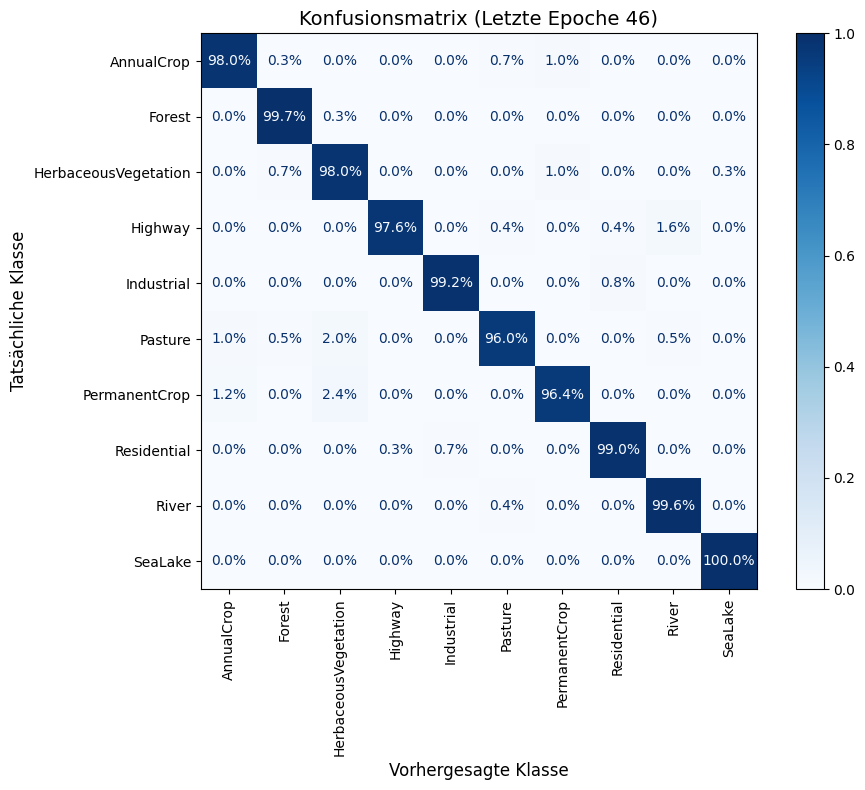

---> Training Epoch 47/150 | Target LR: 5.0000e-04



    Epoch 47 Training Summary: Loss: 0.8479 | Accuracy: 0.5712 | Final LR: 1.3289e-04 | Duration: 70.06s
---> Validation Epoch 47/150



    Epoch 47 Validation Summary: Loss: 0.5691 | Accuracy: 0.9848 | Duration: 6.98s
---> Val loss did not improve for 4 epochs.

--- Konfusionsmatrix nach letzter Epoche (47) ---
---> Validation Epoch 47/150



    Epoch 47 Validation Summary: Loss: 0.5691 | Accuracy: 0.9848 | Duration: 6.75s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.33   0.33   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.33  98.67   0.     0.     0.     1.     0.     0.     0.  ]
 [  0.4    0.     0.    98.4    0.     0.     0.     0.     1.2    0.  ]
 [  0.     0.     0.     0.    99.6    0.     0.     0.4    0.     0.  ]
 [  1.     0.5    1.     0.     0.    97.     0.     0.     0.5    0.  ]
 [  2.     0.     3.6    0.8    0.     0.    93.2    0.     0.4    0.  ]
 [  0.     0.     0.33   0.33   0.67   0.     0.    98.67   0.     0.  ]
 [  0.4    0.     0.     0.     0.     0.4    0.     0.    99.2    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


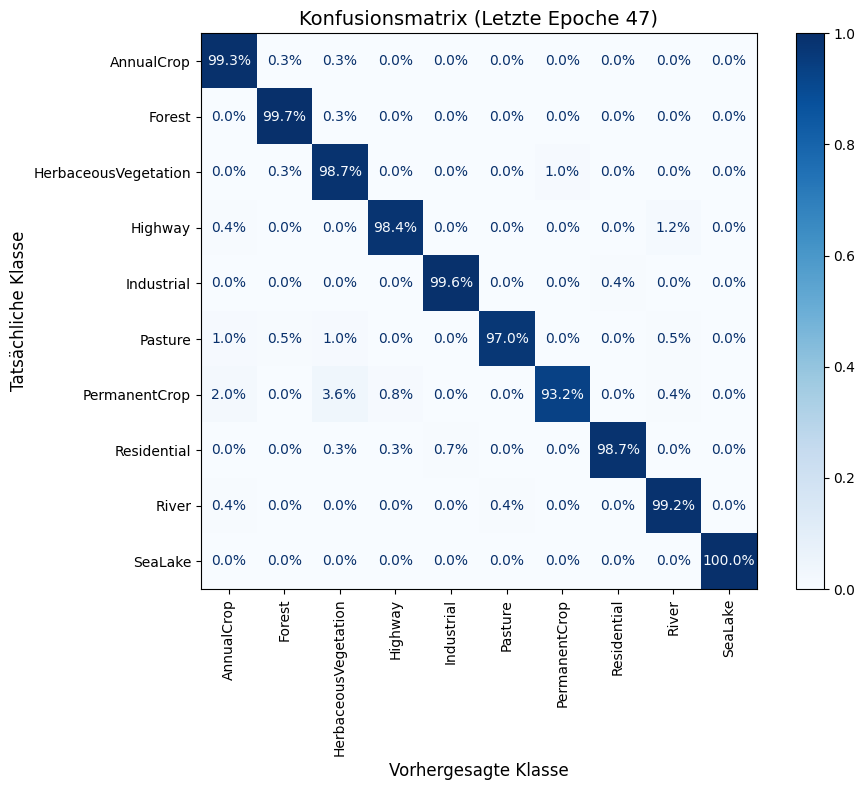

---> Training Epoch 48/150 | Target LR: 5.0000e-04



    Epoch 48 Training Summary: Loss: 0.8405 | Accuracy: 0.5728 | Final LR: 1.2223e-04 | Duration: 70.09s
---> Validation Epoch 48/150



    Epoch 48 Validation Summary: Loss: 0.5605 | Accuracy: 0.9870 | Duration: 6.93s
---> Val loss did not improve for 5 epochs.

--- Konfusionsmatrix nach letzter Epoche (48) ---
---> Validation Epoch 48/150



    Epoch 48 Validation Summary: Loss: 0.5605 | Accuracy: 0.9870 | Duration: 6.83s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.33   0.33   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.    98.67   0.     0.     0.33   1.     0.     0.     0.  ]
 [  0.4    0.     0.    98.4    0.     0.     0.     0.4    0.8    0.  ]
 [  0.     0.     0.     0.    99.6    0.     0.     0.4    0.     0.  ]
 [  1.5    0.5    0.5    0.     0.    97.     0.     0.     0.5    0.  ]
 [  2.     0.     2.8    0.4    0.     0.    94.4    0.     0.4    0.  ]
 [  0.     0.     0.     0.     0.67   0.     0.    99.33   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


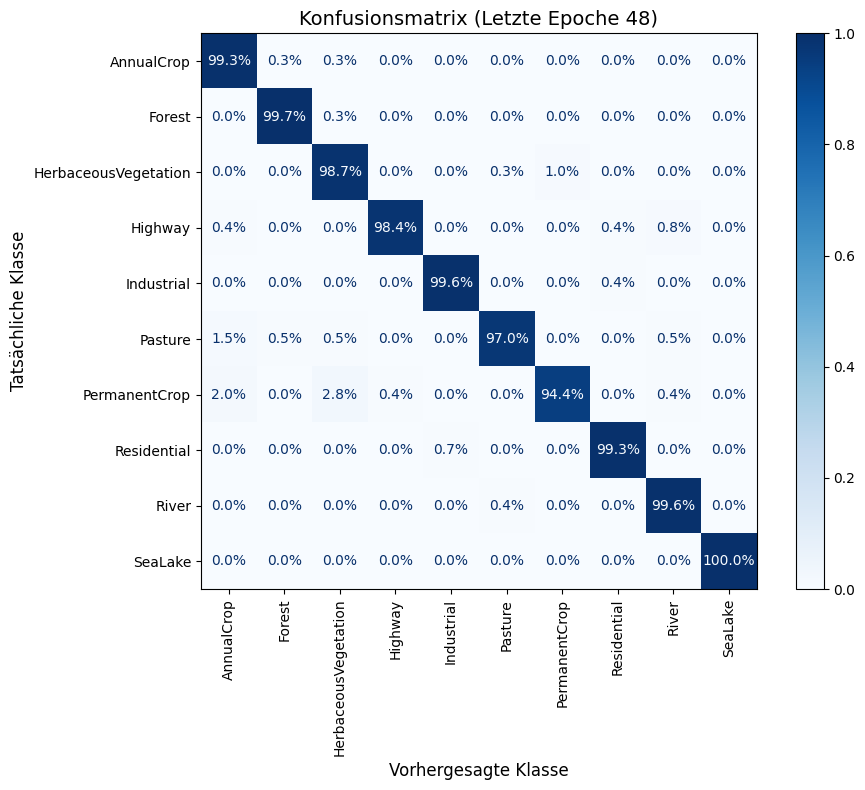

---> Training Epoch 49/150 | Target LR: 5.0000e-04



    Epoch 49 Training Summary: Loss: 0.8384 | Accuracy: 0.5935 | Final LR: 1.1189e-04 | Duration: 70.34s
---> Validation Epoch 49/150



    Epoch 49 Validation Summary: Loss: 0.5979 | Accuracy: 0.9859 | Duration: 6.65s
---> Val loss did not improve for 6 epochs.

--- Konfusionsmatrix nach letzter Epoche (49) ---
---> Validation Epoch 49/150



    Epoch 49 Validation Summary: Loss: 0.5979 | Accuracy: 0.9859 | Duration: 6.72s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.     0.33   0.     0.     0.     0.     0.67   0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.33  98.     0.     0.     0.33   1.     0.     0.     0.33]
 [  0.     0.     0.    98.4    0.     0.     0.     0.4    1.2    0.  ]
 [  0.     0.     0.     0.4   98.     0.     0.     1.6    0.     0.  ]
 [  1.5    0.5    0.5    0.     0.    96.5    0.5    0.     0.5    0.  ]
 [  1.6    0.     2.4    0.4    0.     0.    95.6    0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.   100.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


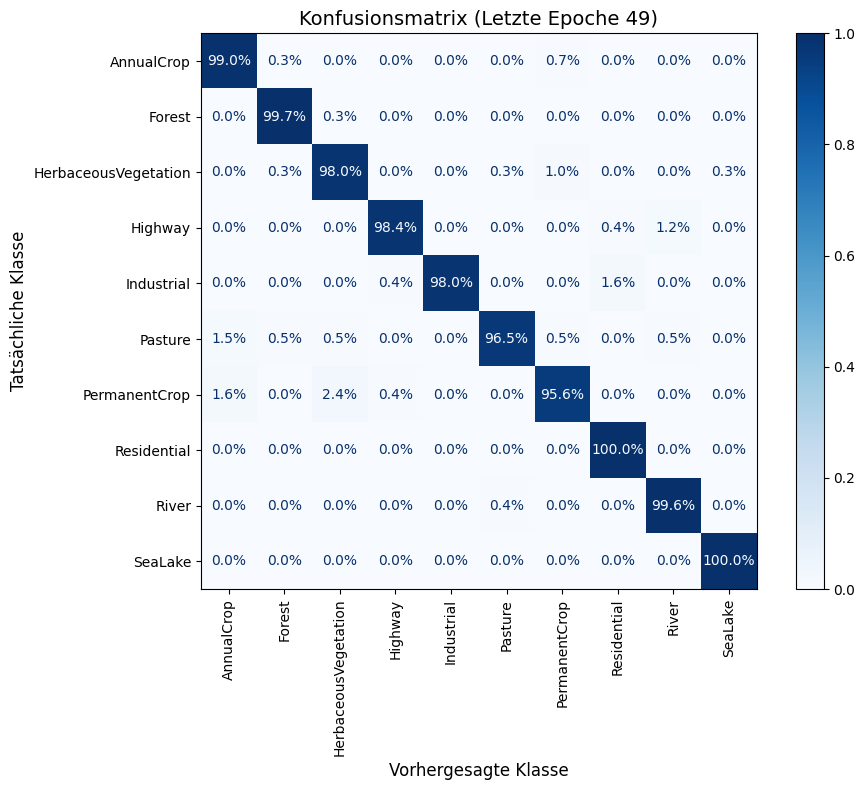

---> Training Epoch 50/150 | Target LR: 5.0000e-04



    Epoch 50 Training Summary: Loss: 0.8484 | Accuracy: 0.5884 | Final LR: 1.0187e-04 | Duration: 70.17s
---> Validation Epoch 50/150



    Epoch 50 Validation Summary: Loss: 0.5655 | Accuracy: 0.9867 | Duration: 6.55s
---> Val loss did not improve for 7 epochs.

--- Konfusionsmatrix nach letzter Epoche (50) ---
---> Validation Epoch 50/150



    Epoch 50 Validation Summary: Loss: 0.5655 | Accuracy: 0.9867 | Duration: 6.88s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.     0.33   0.     0.     0.     0.     0.67   0.     0.     0.  ]
 [  0.    99.33   0.33   0.     0.     0.33   0.     0.     0.     0.  ]
 [  0.     0.    98.67   0.     0.33   0.     1.     0.     0.     0.  ]
 [  0.     0.     0.    98.4    0.     0.     0.4    0.     1.2    0.  ]
 [  0.     0.     0.     0.    99.6    0.     0.     0.4    0.     0.  ]
 [  1.5    0.     0.5    0.     0.    97.     0.5    0.     0.5    0.  ]
 [  1.6    0.     2.     0.4    0.     0.    96.     0.     0.     0.  ]
 [  0.     0.     0.     0.33   1.     0.     0.33  98.33   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


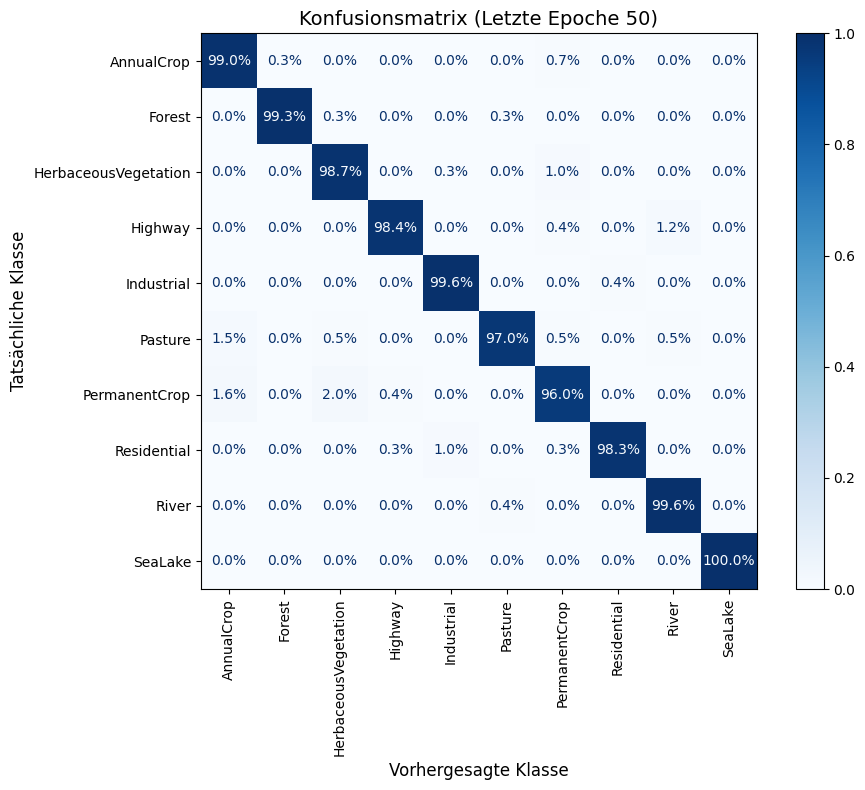

---> Training Epoch 51/150 | Target LR: 5.0000e-04



    Epoch 51 Training Summary: Loss: 0.8339 | Accuracy: 0.5593 | Final LR: 9.2219e-05 | Duration: 70.29s
---> Validation Epoch 51/150



    Epoch 51 Validation Summary: Loss: 0.5529 | Accuracy: 0.9856 | Duration: 6.84s
---> Best non-SWA model state saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_best_non_swa.pth

--- Konfusionsmatrix nach letzter Epoche (51) ---
---> Validation Epoch 51/150



    Epoch 51 Validation Summary: Loss: 0.5529 | Accuracy: 0.9856 | Duration: 6.55s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 98.33   0.33   0.33   0.     0.     0.33   0.67   0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.67  98.     0.     0.     0.33   1.     0.     0.     0.  ]
 [  0.     0.     0.    98.4    0.     0.     0.4    0.4    0.8    0.  ]
 [  0.     0.     0.     0.    99.6    0.     0.     0.4    0.     0.  ]
 [  1.5    1.     0.5    0.     0.    96.5    0.     0.     0.5    0.  ]
 [  1.2    0.     2.8    0.4    0.     0.    95.6    0.     0.     0.  ]
 [  0.     0.     0.     0.     0.67   0.     0.    99.33   0.     0.  ]
 [  0.     0.     0.     0.4    0.     0.4    0.     0.    99.2    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


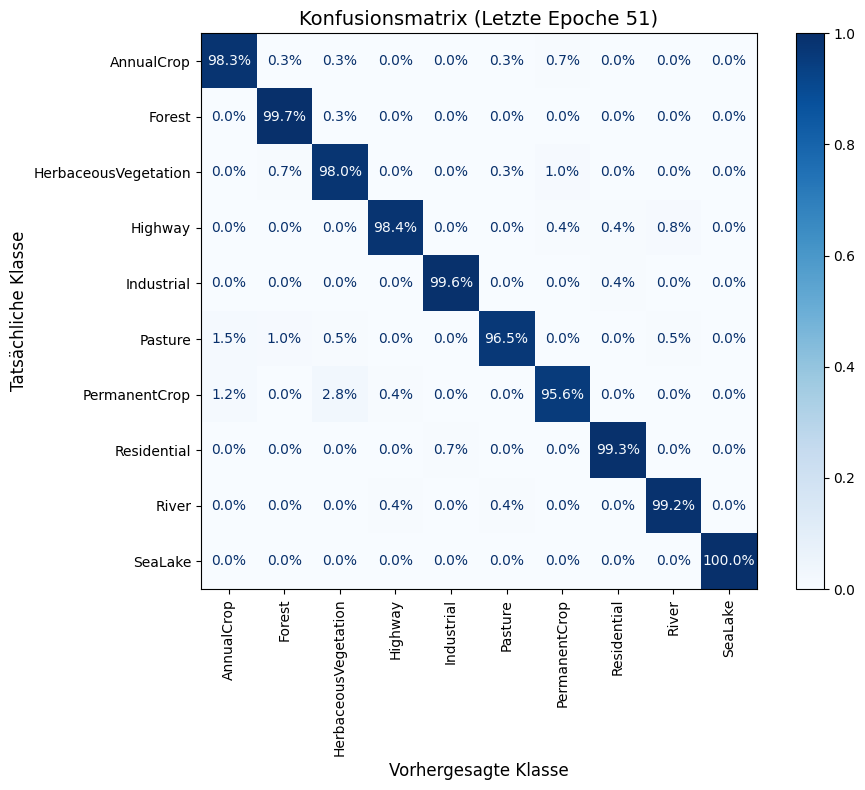

---> Training Epoch 52/150 | Target LR: 5.0000e-04



    Epoch 52 Training Summary: Loss: 0.8227 | Accuracy: 0.5783 | Final LR: 8.2946e-05 | Duration: 70.43s
---> Validation Epoch 52/150



    Epoch 52 Validation Summary: Loss: 0.5551 | Accuracy: 0.9870 | Duration: 6.82s
---> Val loss did not improve for 1 epochs.

--- Konfusionsmatrix nach letzter Epoche (52) ---
---> Validation Epoch 52/150



    Epoch 52 Validation Summary: Loss: 0.5551 | Accuracy: 0.9870 | Duration: 6.78s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.33   0.33   0.     0.     0.     0.     0.33   0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.67  98.     0.     0.     0.33   1.     0.     0.     0.  ]
 [  0.     0.     0.    98.4    0.     0.     0.4    0.     1.2    0.  ]
 [  0.     0.     0.     0.    99.6    0.     0.     0.4    0.     0.  ]
 [  1.5    0.5    0.5    0.     0.    96.5    0.5    0.     0.5    0.  ]
 [  1.6    0.     2.     0.4    0.     0.    96.     0.     0.     0.  ]
 [  0.     0.     0.     0.33   0.67   0.     0.    99.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


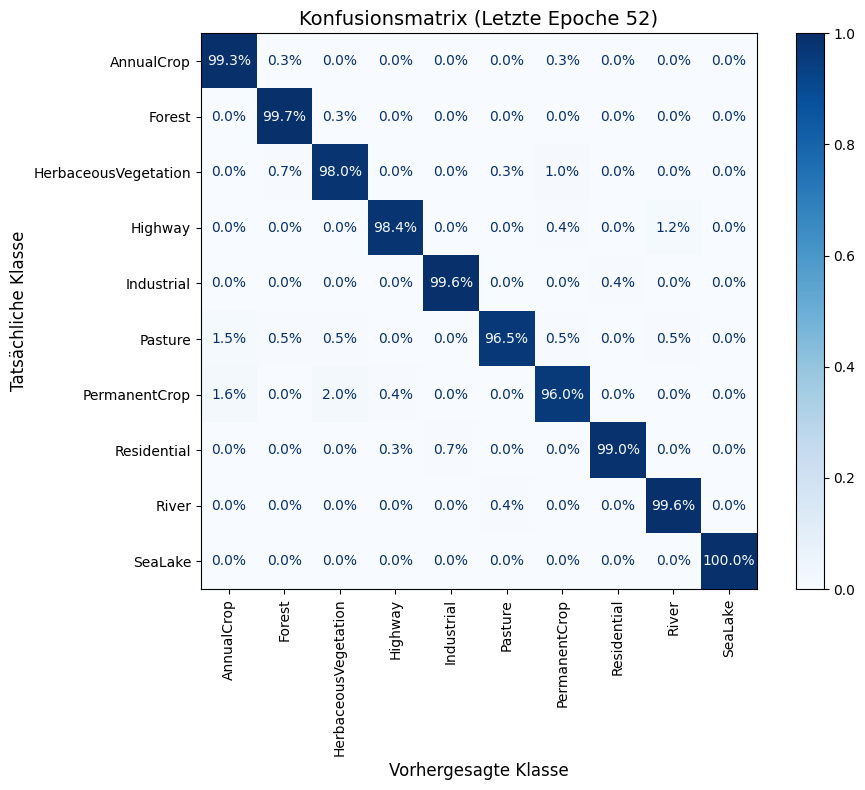

---> Training Epoch 53/150 | Target LR: 5.0000e-04



    Epoch 53 Training Summary: Loss: 0.8189 | Accuracy: 0.5777 | Final LR: 7.4077e-05 | Duration: 70.14s
---> Validation Epoch 53/150



    Epoch 53 Validation Summary: Loss: 0.6692 | Accuracy: 0.9667 | Duration: 6.69s
---> Val loss did not improve for 2 epochs.

--- Konfusionsmatrix nach letzter Epoche (53) ---
---> Validation Epoch 53/150



    Epoch 53 Validation Summary: Loss: 0.6692 | Accuracy: 0.9667 | Duration: 6.75s
Konfusionsmatrix (normalisiert auf Zeilen):
[[99.    0.33  0.    0.    0.    0.33  0.33  0.    0.    0.  ]
 [ 0.   99.33  0.33  0.    0.    0.33  0.    0.    0.    0.  ]
 [ 0.    0.   98.33  0.    0.    0.33  1.33  0.    0.    0.  ]
 [ 0.    0.    0.   97.6   0.    0.    0.4   0.8   1.2   0.  ]
 [ 0.    0.    0.    0.   99.2   0.    0.    0.8   0.    0.  ]
 [ 1.5   0.5   0.5   0.    0.   97.    0.    0.    0.5   0.  ]
 [ 1.2   0.    2.8   0.    0.    0.   96.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.33  0.    0.   99.67  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.8   0.    0.   99.2   0.  ]
 [ 0.    0.    0.    0.    0.    0.   17.67  0.    0.   82.33]]


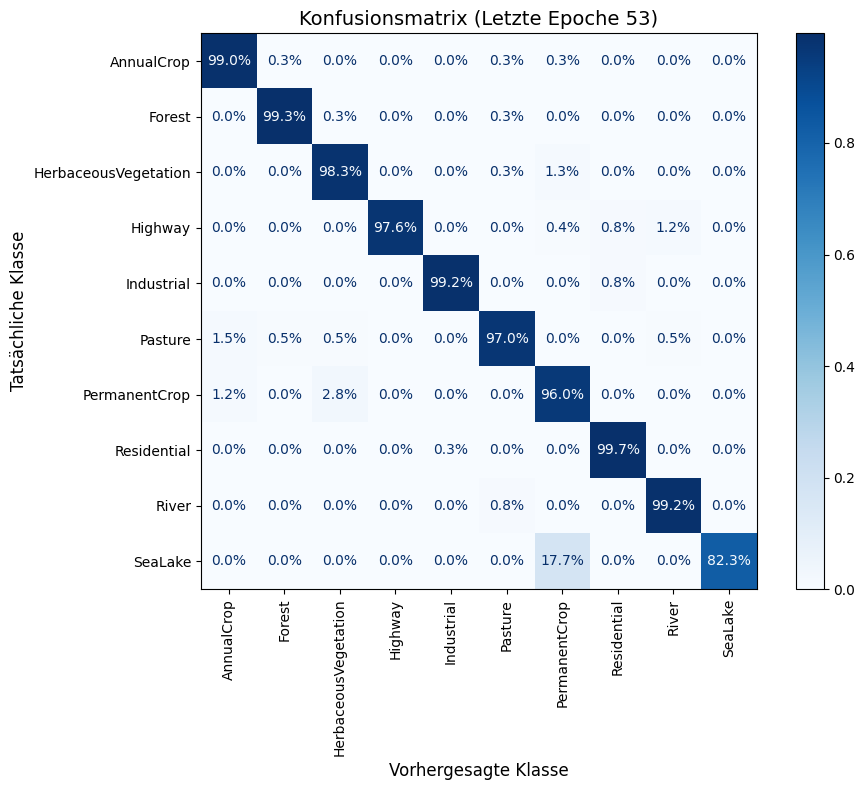

---> Training Epoch 54/150 | Target LR: 5.0000e-04



    Epoch 54 Training Summary: Loss: 0.8391 | Accuracy: 0.5616 | Final LR: 6.5633e-05 | Duration: 70.41s
---> Validation Epoch 54/150



    Epoch 54 Validation Summary: Loss: 0.5636 | Accuracy: 0.9859 | Duration: 7.07s
---> Val loss did not improve for 3 epochs.

--- Konfusionsmatrix nach letzter Epoche (54) ---
---> Validation Epoch 54/150



    Epoch 54 Validation Summary: Loss: 0.5636 | Accuracy: 0.9859 | Duration: 6.64s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 98.67   0.33   0.     0.     0.     0.33   0.67   0.     0.     0.  ]
 [  0.    99.33   0.33   0.     0.     0.33   0.     0.     0.     0.  ]
 [  0.     0.33  98.     0.     0.     0.33   1.     0.     0.     0.33]
 [  0.     0.     0.    98.4    0.     0.     0.     0.4    1.2    0.  ]
 [  0.     0.     0.     0.    99.2    0.     0.     0.8    0.     0.  ]
 [  1.5    0.5    0.5    0.     0.    97.     0.     0.     0.5    0.  ]
 [  1.6    0.     2.8    0.     0.     0.    95.6    0.     0.     0.  ]
 [  0.     0.     0.     0.     0.67   0.     0.    99.33   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


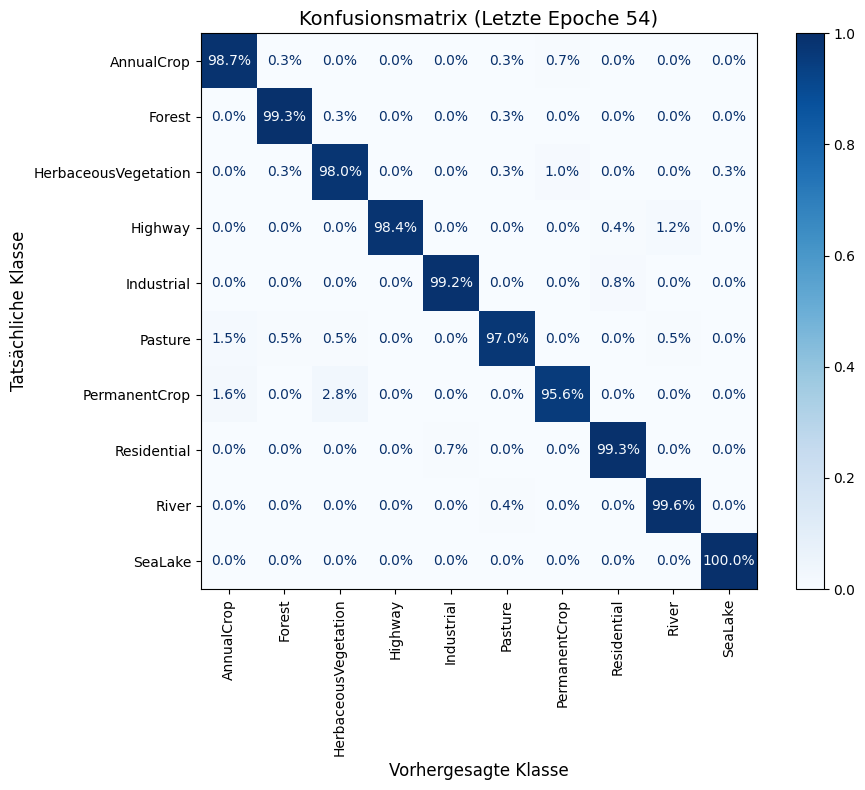

---> Training Epoch 55/150 | Target LR: 5.0000e-04



    Epoch 55 Training Summary: Loss: 0.8258 | Accuracy: 0.5728 | Final LR: 5.7634e-05 | Duration: 70.14s
---> Validation Epoch 55/150



    Epoch 55 Validation Summary: Loss: 0.5591 | Accuracy: 0.9863 | Duration: 6.83s
---> Val loss did not improve for 4 epochs.

--- Konfusionsmatrix nach letzter Epoche (55) ---
---> Validation Epoch 55/150



    Epoch 55 Validation Summary: Loss: 0.5591 | Accuracy: 0.9863 | Duration: 6.64s
Konfusionsmatrix (normalisiert auf Zeilen):
[[99.    0.33  0.33  0.    0.    0.    0.33  0.    0.    0.  ]
 [ 0.   99.33  0.33  0.    0.    0.33  0.    0.    0.    0.  ]
 [ 0.    0.   98.33  0.    0.    0.33  1.    0.    0.    0.33]
 [ 0.    0.    0.   99.2   0.    0.    0.    0.    0.8   0.  ]
 [ 0.    0.    0.    0.   99.6   0.    0.    0.4   0.    0.  ]
 [ 1.5   0.5   0.5   0.    0.   97.    0.    0.    0.5   0.  ]
 [ 2.    0.    3.2   0.    0.    0.   94.8   0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.67  0.    0.   99.33  0.    0.  ]
 [ 0.    0.    0.    0.4   0.    0.4   0.    0.   99.2   0.  ]
 [ 0.    0.    0.    0.33  0.    0.    0.    0.    0.   99.67]]


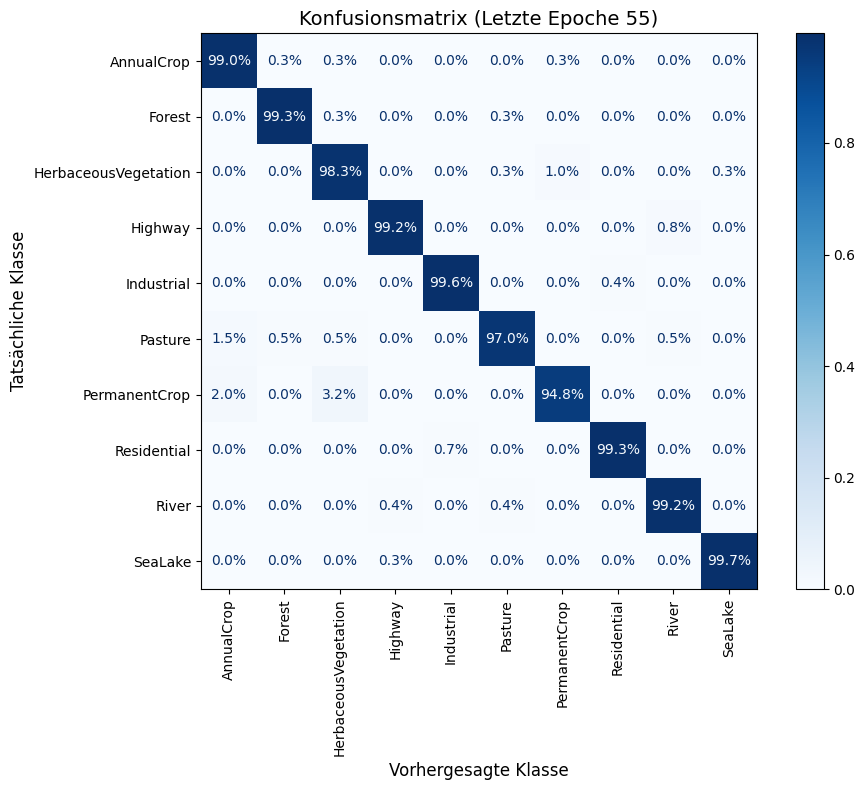

---> Training Epoch 56/150 | Target LR: 5.0000e-04



    Epoch 56 Training Summary: Loss: 0.8292 | Accuracy: 0.5648 | Final LR: 5.0100e-05 | Duration: 70.59s
---> Validation Epoch 56/150



    Epoch 56 Validation Summary: Loss: 0.5557 | Accuracy: 0.9867 | Duration: 6.69s
---> Val loss did not improve for 5 epochs.

--- Konfusionsmatrix nach letzter Epoche (56) ---
---> Validation Epoch 56/150



    Epoch 56 Validation Summary: Loss: 0.5557 | Accuracy: 0.9867 | Duration: 6.94s
Konfusionsmatrix (normalisiert auf Zeilen):
[[99.67  0.33  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   99.67  0.33  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.   98.33  0.    0.    0.33  1.    0.    0.    0.33]
 [ 0.    0.    0.   98.4   0.    0.    0.    0.    1.6   0.  ]
 [ 0.    0.    0.    0.   99.6   0.    0.    0.4   0.    0.  ]
 [ 1.5   0.5   0.5   0.    0.   97.    0.    0.    0.5   0.  ]
 [ 1.6   0.    2.8   0.    0.    0.   95.6   0.    0.    0.  ]
 [ 0.    0.    0.    0.33  0.67  0.    0.   99.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.4   0.    0.   99.6   0.  ]
 [ 0.    1.    0.    0.    0.    0.    0.    0.    0.   99.  ]]


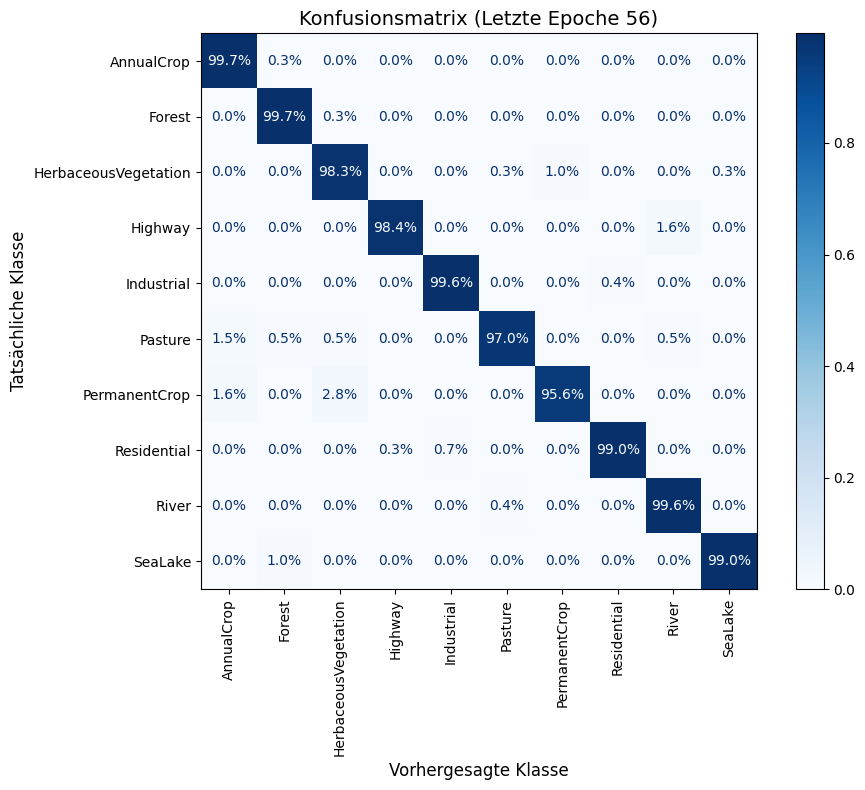

---> Training Epoch 57/150 | Target LR: 5.0000e-04



    Epoch 57 Training Summary: Loss: 0.8274 | Accuracy: 0.5429 | Final LR: 4.3048e-05 | Duration: 70.13s
---> Validation Epoch 57/150



    Epoch 57 Validation Summary: Loss: 0.5620 | Accuracy: 0.9856 | Duration: 6.78s
---> Val loss did not improve for 6 epochs.

--- Konfusionsmatrix nach letzter Epoche (57) ---
---> Validation Epoch 57/150



    Epoch 57 Validation Summary: Loss: 0.5620 | Accuracy: 0.9856 | Duration: 6.73s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.     0.33   0.33   0.     0.     0.     0.33   0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.33  98.     0.     0.     0.33   1.     0.     0.     0.33]
 [  0.     0.     0.    98.     0.     0.     0.     0.4    1.6    0.  ]
 [  0.     0.     0.     0.4   99.2    0.     0.     0.4    0.     0.  ]
 [  1.5    0.5    0.5    0.     0.    97.     0.     0.     0.5    0.  ]
 [  1.6    0.     3.2    0.4    0.     0.    94.8    0.     0.     0.  ]
 [  0.     0.     0.     0.     0.67   0.     0.    99.33   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


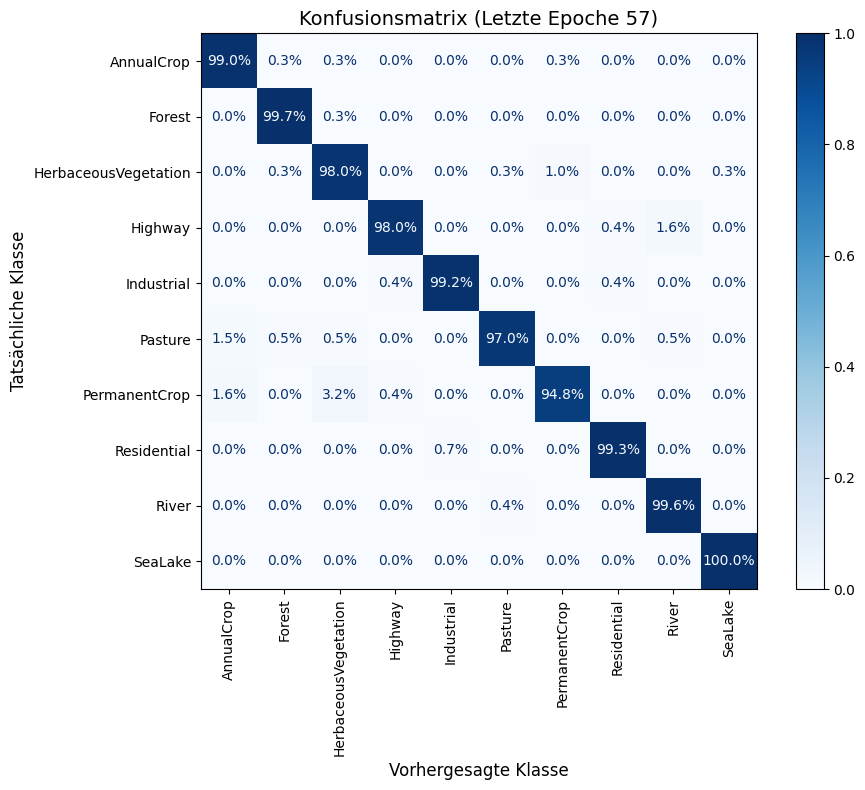

---> Training Epoch 58/150 | Target LR: 5.0000e-04



    Epoch 58 Training Summary: Loss: 0.8390 | Accuracy: 0.5497 | Final LR: 3.6497e-05 | Duration: 70.32s
---> Validation Epoch 58/150



    Epoch 58 Validation Summary: Loss: 0.5734 | Accuracy: 0.9856 | Duration: 6.84s
---> Val loss did not improve for 7 epochs.

--- Konfusionsmatrix nach letzter Epoche (58) ---
---> Validation Epoch 58/150



    Epoch 58 Validation Summary: Loss: 0.5734 | Accuracy: 0.9856 | Duration: 6.81s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 98.67   0.33   0.33   0.     0.     0.33   0.33   0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.33  98.     0.     0.     0.33   1.     0.     0.     0.33]
 [  0.     0.     0.    98.4    0.     0.     0.     0.4    1.2    0.  ]
 [  0.     0.     0.     0.8   98.8    0.     0.     0.4    0.     0.  ]
 [  1.5    0.5    1.     0.     0.    96.5    0.     0.     0.5    0.  ]
 [  1.6    0.     2.8    0.4    0.     0.    95.2    0.     0.     0.  ]
 [  0.     0.     0.     0.     0.33   0.     0.    99.67   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


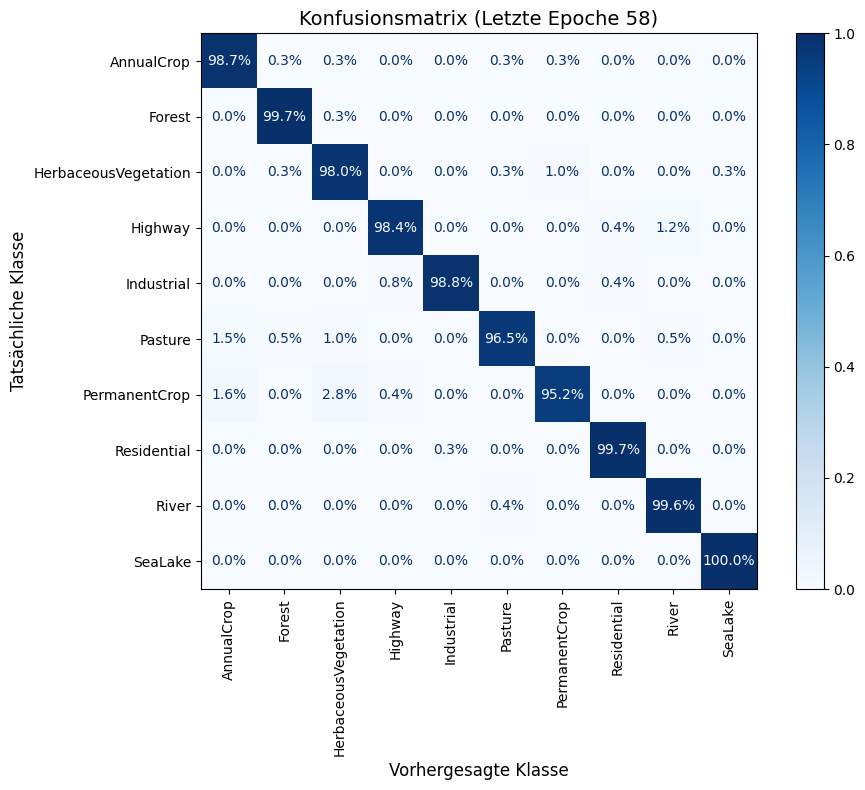

---> Training Epoch 59/150 | Target LR: 5.0000e-04



    Epoch 59 Training Summary: Loss: 0.8374 | Accuracy: 0.5811 | Final LR: 3.0461e-05 | Duration: 70.70s
---> Validation Epoch 59/150



    Epoch 59 Validation Summary: Loss: nan | Accuracy: 0.9844 | Duration: 6.72s
---> Val loss did not improve for 8 epochs.

--- Konfusionsmatrix nach letzter Epoche (59) ---
---> Validation Epoch 59/150



    Epoch 59 Validation Summary: Loss: nan | Accuracy: 0.9844 | Duration: 6.75s
Konfusionsmatrix (normalisiert auf Zeilen):
[[99.    0.33  0.33  0.    0.    0.    0.33  0.    0.    0.  ]
 [ 0.   99.67  0.33  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.33 98.33  0.    0.    0.33  1.    0.    0.    0.  ]
 [ 0.    0.    0.   98.8   0.    0.    0.    0.4   0.8   0.  ]
 [ 0.    0.    0.    0.4  99.2   0.    0.    0.4   0.    0.  ]
 [ 1.5   0.5   0.5   0.    0.   97.    0.    0.    0.5   0.  ]
 [ 1.6   0.    2.8   0.4   0.    0.   95.2   0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.33  0.    0.   99.67  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.4   0.4   0.   99.2   0.  ]
 [ 0.67  0.    1.67  0.    0.    0.    0.    0.    0.   97.67]]


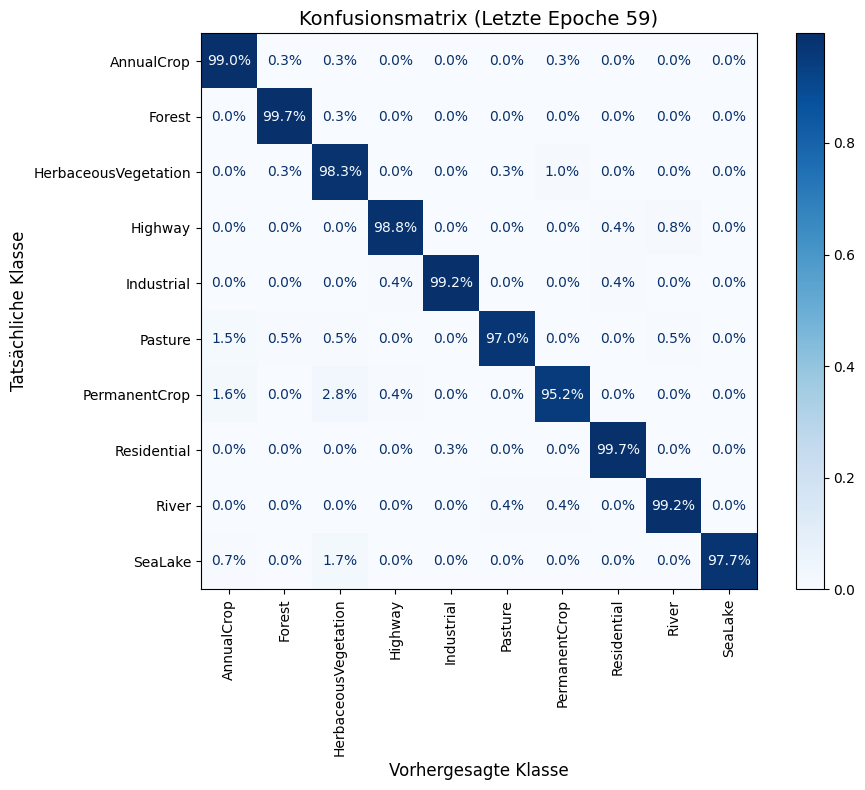

---> Training Epoch 60/150 | Target LR: 5.0000e-04



    Epoch 60 Training Summary: Loss: 0.8189 | Accuracy: 0.5749 | Final LR: 2.4955e-05 | Duration: 70.81s
---> Validation Epoch 60/150



    Epoch 60 Validation Summary: Loss: 0.5628 | Accuracy: 0.9848 | Duration: 6.92s
---> Val loss did not improve for 9 epochs.
---> Periodic checkpoint saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_epoch_60.pth

--- Konfusionsmatrix nach letzter Epoche (60) ---
---> Validation Epoch 60/150



    Epoch 60 Validation Summary: Loss: 0.5628 | Accuracy: 0.9848 | Duration: 6.62s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 98.67   0.33   0.33   0.     0.     0.33   0.33   0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.67  98.     0.     0.     0.33   1.     0.     0.     0.  ]
 [  0.     0.     0.    97.6    0.     0.     0.4    0.4    1.6    0.  ]
 [  0.     0.     0.     0.4   98.8    0.     0.     0.8    0.     0.  ]
 [  1.5    0.5    0.5    0.     0.    97.     0.     0.     0.5    0.  ]
 [  2.     0.     2.8    0.4    0.     0.    94.8    0.     0.     0.  ]
 [  0.     0.     0.     0.     0.33   0.     0.    99.67   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


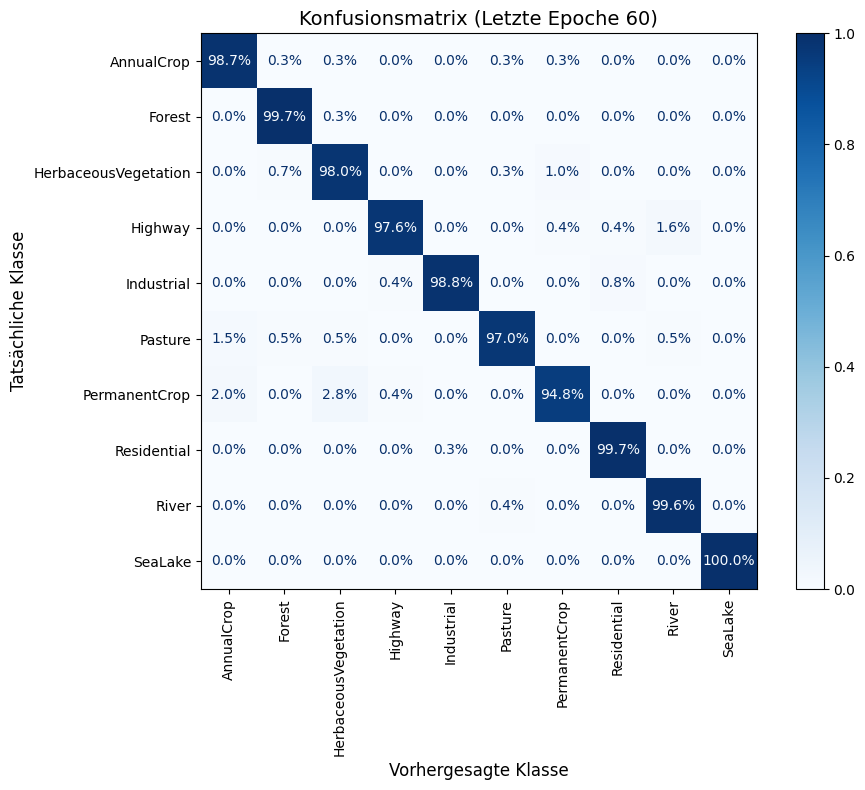

---> Training Epoch 61/150 | Target LR: 5.0000e-04



    Epoch 61 Training Summary: Loss: 0.8357 | Accuracy: 0.5205 | Final LR: 1.9992e-05 | Duration: 70.48s
---> Validation Epoch 61/150



    Epoch 61 Validation Summary: Loss: 0.5554 | Accuracy: 0.9863 | Duration: 6.71s
---> Val loss did not improve for 10 epochs.

--- Konfusionsmatrix nach letzter Epoche (61) ---
---> Validation Epoch 61/150



    Epoch 61 Validation Summary: Loss: 0.5554 | Accuracy: 0.9863 | Duration: 6.91s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.33   0.33   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.    98.33   0.     0.     0.33   1.     0.     0.     0.33]
 [  0.     0.     0.    98.     0.     0.     0.     0.4    1.6    0.  ]
 [  0.     0.     0.     0.4   98.8    0.     0.     0.8    0.     0.  ]
 [  1.5    0.5    0.5    0.     0.    97.     0.     0.     0.5    0.  ]
 [  2.     0.     2.4    0.4    0.     0.    94.8    0.     0.4    0.  ]
 [  0.     0.     0.     0.     0.33   0.     0.    99.67   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


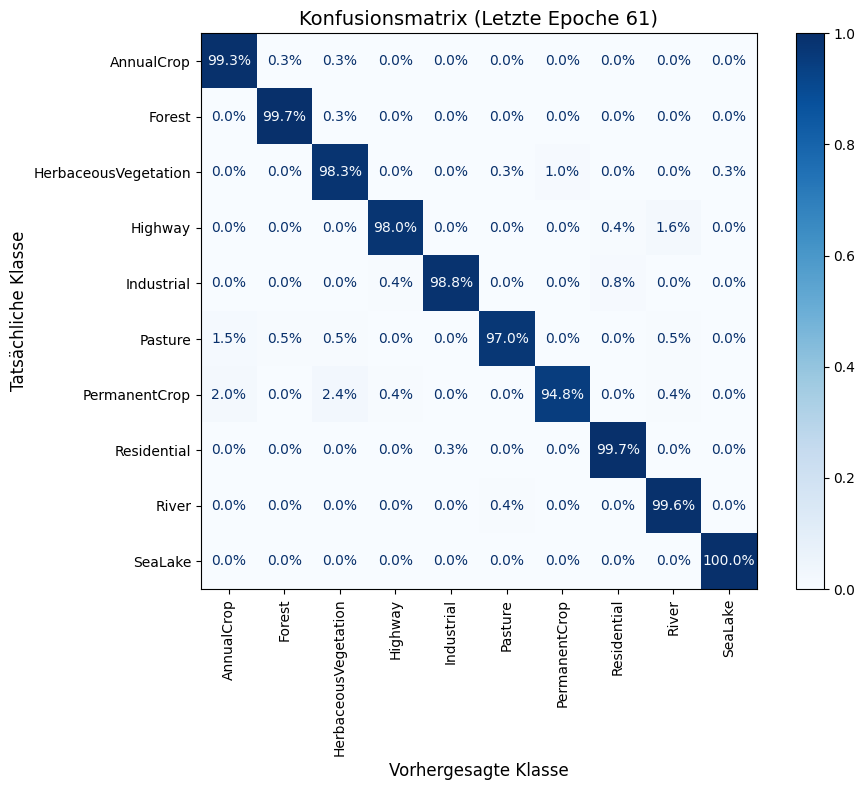

---> Training Epoch 62/150 | Target LR: 5.0000e-04



    Epoch 62 Training Summary: Loss: 0.8325 | Accuracy: 0.5508 | Final LR: 1.5585e-05 | Duration: 70.28s
---> Validation Epoch 62/150



    Epoch 62 Validation Summary: Loss: 0.5710 | Accuracy: 0.9844 | Duration: 6.77s
---> Val loss did not improve for 11 epochs.

--- Konfusionsmatrix nach letzter Epoche (62) ---
---> Validation Epoch 62/150



    Epoch 62 Validation Summary: Loss: 0.5710 | Accuracy: 0.9844 | Duration: 6.92s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 98.67   0.33   0.33   0.     0.     0.     0.67   0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.67  97.67   0.     0.     0.33   1.     0.     0.     0.33]
 [  0.     0.     0.    97.6    0.     0.     0.4    0.4    1.6    0.  ]
 [  0.     0.     0.     0.4   98.8    0.     0.     0.8    0.     0.  ]
 [  1.5    0.5    0.5    0.     0.    97.     0.     0.     0.5    0.  ]
 [  1.6    0.     3.2    0.4    0.     0.    94.8    0.     0.     0.  ]
 [  0.     0.     0.     0.     0.33   0.     0.    99.67   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


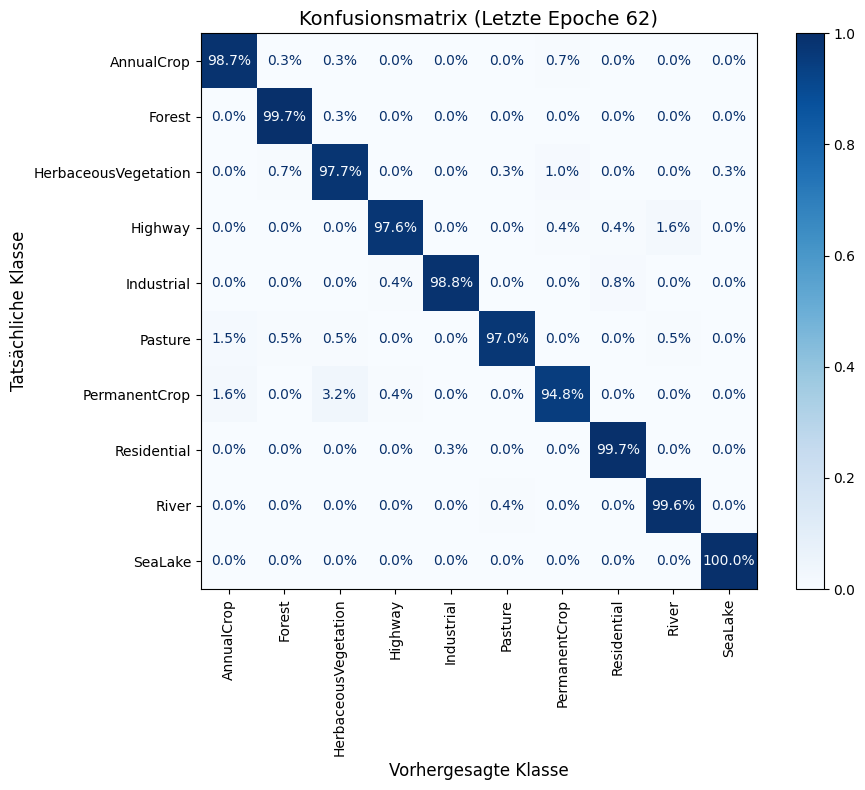

---> Training Epoch 63/150 | Target LR: 5.0000e-04



    Epoch 63 Training Summary: Loss: 0.8189 | Accuracy: 0.5510 | Final LR: 1.1743e-05 | Duration: 70.36s
---> Validation Epoch 63/150



    Epoch 63 Validation Summary: Loss: 0.5605 | Accuracy: 0.9852 | Duration: 6.93s
---> Val loss did not improve for 12 epochs.

--- Konfusionsmatrix nach letzter Epoche (63) ---
---> Validation Epoch 63/150



    Epoch 63 Validation Summary: Loss: 0.5605 | Accuracy: 0.9852 | Duration: 6.96s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.33   0.33   0.     0.     0.     0.     0.33   0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.    98.     0.33   0.     0.33   1.     0.     0.     0.33]
 [  0.     0.     0.    97.6    0.     0.     0.4    0.4    1.6    0.  ]
 [  0.     0.     0.     0.4   98.8    0.     0.     0.8    0.     0.  ]
 [  1.5    0.5    0.5    0.     0.    97.     0.     0.     0.5    0.  ]
 [  2.     0.     2.8    0.4    0.     0.    94.8    0.     0.     0.  ]
 [  0.     0.     0.     0.33   0.33   0.     0.    99.33   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


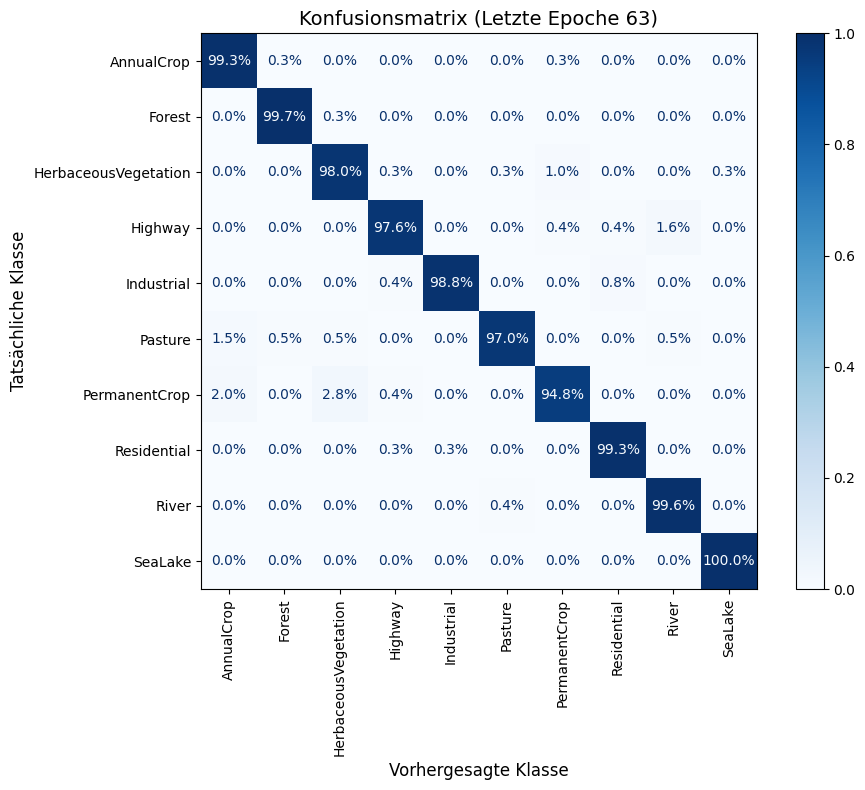

---> Training Epoch 64/150 | Target LR: 5.0000e-04



    Epoch 64 Training Summary: Loss: 0.8271 | Accuracy: 0.5445 | Final LR: 8.4772e-06 | Duration: 70.51s
---> Validation Epoch 64/150



    Epoch 64 Validation Summary: Loss: 0.5661 | Accuracy: 0.9856 | Duration: 6.62s
---> Val loss did not improve for 13 epochs.

--- Konfusionsmatrix nach letzter Epoche (64) ---
---> Validation Epoch 64/150



    Epoch 64 Validation Summary: Loss: 0.5661 | Accuracy: 0.9856 | Duration: 6.93s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.     0.33   0.33   0.     0.     0.     0.33   0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.    98.33   0.     0.     0.33   1.     0.     0.     0.33]
 [  0.     0.     0.    97.6    0.     0.     0.4    0.4    1.6    0.  ]
 [  0.     0.     0.     0.4   99.2    0.     0.     0.4    0.     0.  ]
 [  1.5    0.5    0.5    0.     0.    97.     0.     0.     0.5    0.  ]
 [  2.     0.     2.8    0.4    0.     0.    94.8    0.     0.     0.  ]
 [  0.     0.     0.     0.33   0.33   0.     0.    99.33   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


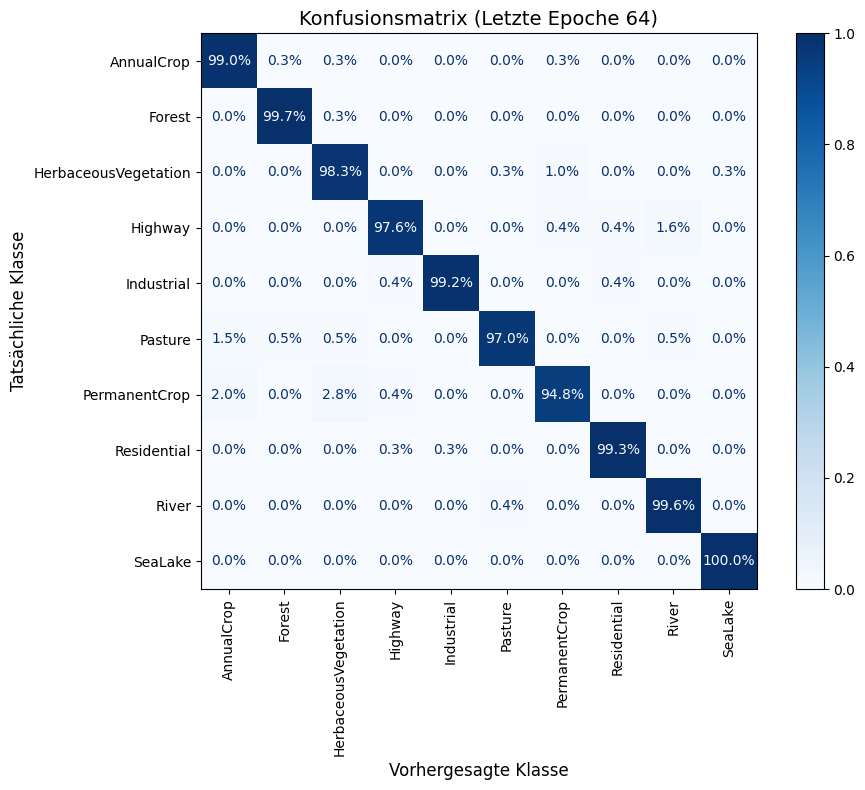

---> Training Epoch 65/150 | Target LR: 5.0000e-04



    Epoch 65 Training Summary: Loss: 0.8232 | Accuracy: 0.5612 | Final LR: 5.7941e-06 | Duration: 70.40s
---> Validation Epoch 65/150



    Epoch 65 Validation Summary: Loss: 0.5543 | Accuracy: 0.9852 | Duration: 6.68s
---> Val loss did not improve for 14 epochs.

--- Konfusionsmatrix nach letzter Epoche (65) ---
---> Validation Epoch 65/150



    Epoch 65 Validation Summary: Loss: 0.5543 | Accuracy: 0.9852 | Duration: 6.73s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.     0.33   0.     0.     0.     0.     0.67   0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.    98.33   0.33   0.     0.33   1.     0.     0.     0.  ]
 [  0.     0.     0.    97.6    0.     0.     0.4    0.4    1.6    0.  ]
 [  0.     0.     0.     0.4   98.8    0.     0.     0.8    0.     0.  ]
 [  1.5    0.5    0.5    0.     0.    97.     0.     0.     0.5    0.  ]
 [  2.     0.     2.8    0.4    0.     0.    94.8    0.     0.     0.  ]
 [  0.     0.     0.     0.33   0.33   0.     0.    99.33   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


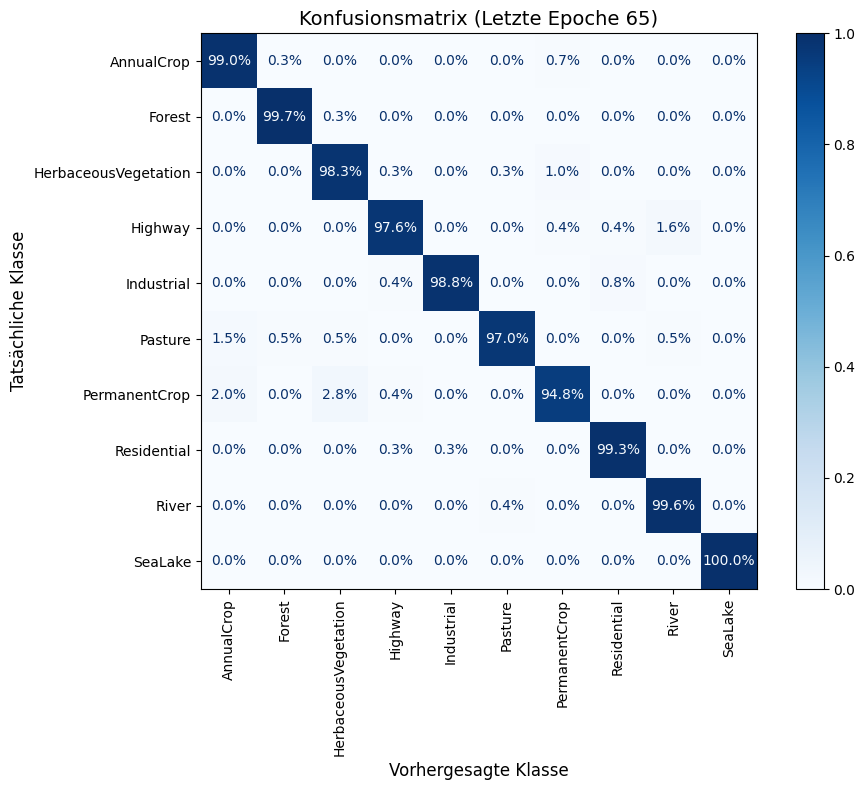

---> Training Epoch 66/150 | Target LR: 5.0000e-04



    Epoch 66 Training Summary: Loss: 0.8167 | Accuracy: 0.5599 | Final LR: 3.7005e-06 | Duration: 70.25s
---> Validation Epoch 66/150



    Epoch 66 Validation Summary: Loss: 0.5624 | Accuracy: 0.9841 | Duration: 6.83s
---> Val loss did not improve for 15 epochs.

--- Konfusionsmatrix nach letzter Epoche (66) ---
---> Validation Epoch 66/150



    Epoch 66 Validation Summary: Loss: 0.5624 | Accuracy: 0.9841 | Duration: 6.51s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.     0.33   0.33   0.     0.     0.     0.33   0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.67  97.33   0.33   0.     0.33   1.     0.     0.     0.33]
 [  0.     0.     0.    97.6    0.     0.     0.4    0.4    1.6    0.  ]
 [  0.     0.     0.     0.4   98.8    0.     0.     0.8    0.     0.  ]
 [  1.5    0.5    0.5    0.     0.    97.     0.     0.     0.5    0.  ]
 [  2.     0.     2.8    0.4    0.     0.    94.8    0.     0.     0.  ]
 [  0.     0.     0.     0.33   0.33   0.     0.    99.33   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


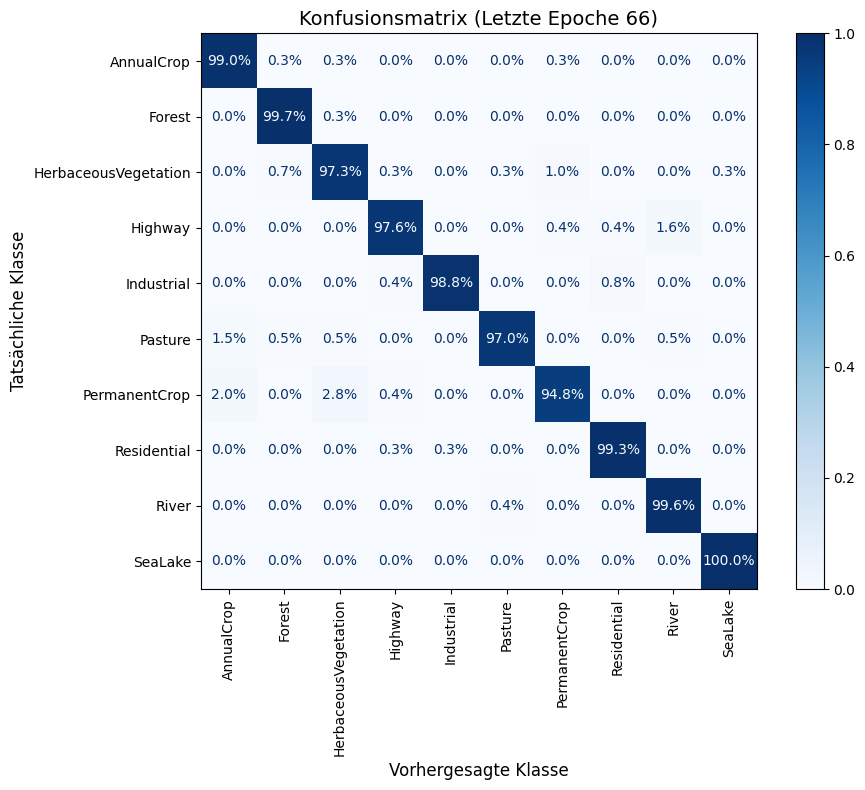

---> Training Epoch 67/150 | Target LR: 5.0000e-04



    Epoch 67 Training Summary: Loss: 0.8376 | Accuracy: 0.5606 | Final LR: 2.2014e-06 | Duration: 70.57s
---> Validation Epoch 67/150



    Epoch 67 Validation Summary: Loss: 0.5631 | Accuracy: 0.9841 | Duration: 6.51s
---> Val loss did not improve for 16 epochs.

--- Konfusionsmatrix nach letzter Epoche (67) ---
---> Validation Epoch 67/150



    Epoch 67 Validation Summary: Loss: 0.5631 | Accuracy: 0.9841 | Duration: 6.68s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.     0.33   0.     0.     0.     0.     0.67   0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.67  97.33   0.33   0.     0.33   1.     0.     0.     0.33]
 [  0.     0.     0.    97.6    0.     0.     0.4    0.4    1.6    0.  ]
 [  0.     0.     0.     0.4   98.8    0.     0.     0.8    0.     0.  ]
 [  1.5    0.5    0.5    0.     0.    97.     0.     0.     0.5    0.  ]
 [  2.     0.     2.8    0.4    0.     0.    94.8    0.     0.     0.  ]
 [  0.     0.     0.     0.33   0.33   0.     0.    99.33   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


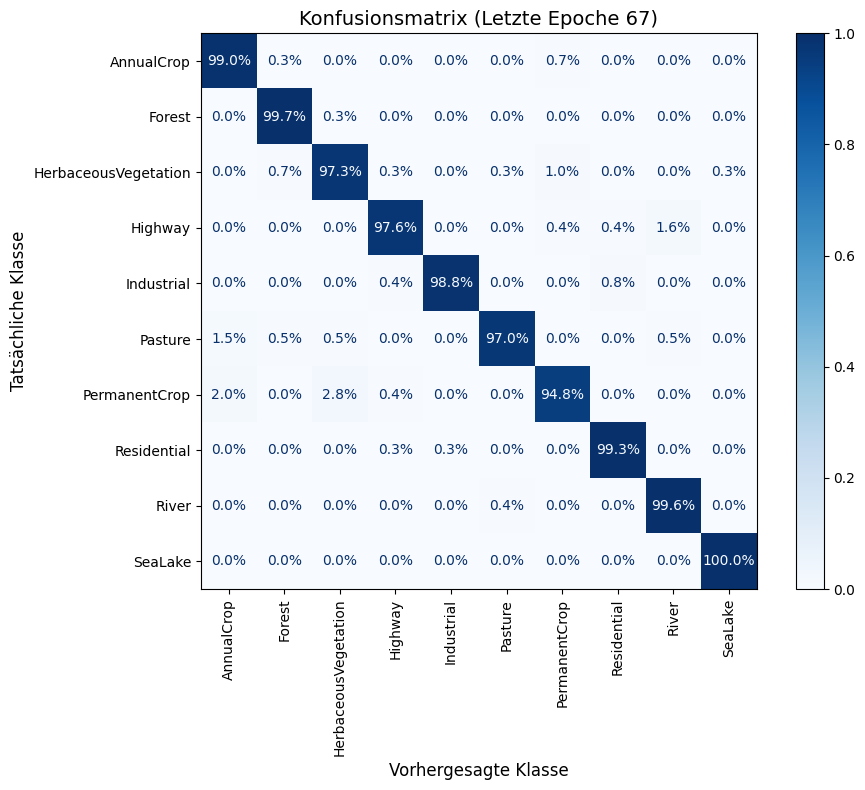

---> Training Epoch 68/150 | Target LR: 5.0000e-04



    Epoch 68 Training Summary: Loss: 0.8245 | Accuracy: 0.5493 | Final LR: 1.3005e-06 | Duration: 70.79s
---> Validation Epoch 68/150



    Epoch 68 Validation Summary: Loss: 0.5565 | Accuracy: 0.9856 | Duration: 6.70s
---> Val loss did not improve for 17 epochs.

--- Konfusionsmatrix nach letzter Epoche (68) ---
---> Validation Epoch 68/150



    Epoch 68 Validation Summary: Loss: 0.5565 | Accuracy: 0.9856 | Duration: 6.61s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.     0.33   0.33   0.     0.     0.     0.33   0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.    98.67   0.     0.     0.33   1.     0.     0.     0.  ]
 [  0.     0.     0.    97.6    0.     0.     0.4    0.4    1.6    0.  ]
 [  0.     0.     0.     0.4   99.2    0.     0.     0.4    0.     0.  ]
 [  1.5    0.5    0.5    0.     0.    97.     0.     0.     0.5    0.  ]
 [  1.6    0.     3.2    0.4    0.     0.    94.8    0.     0.     0.  ]
 [  0.     0.     0.     0.33   0.67   0.     0.    99.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


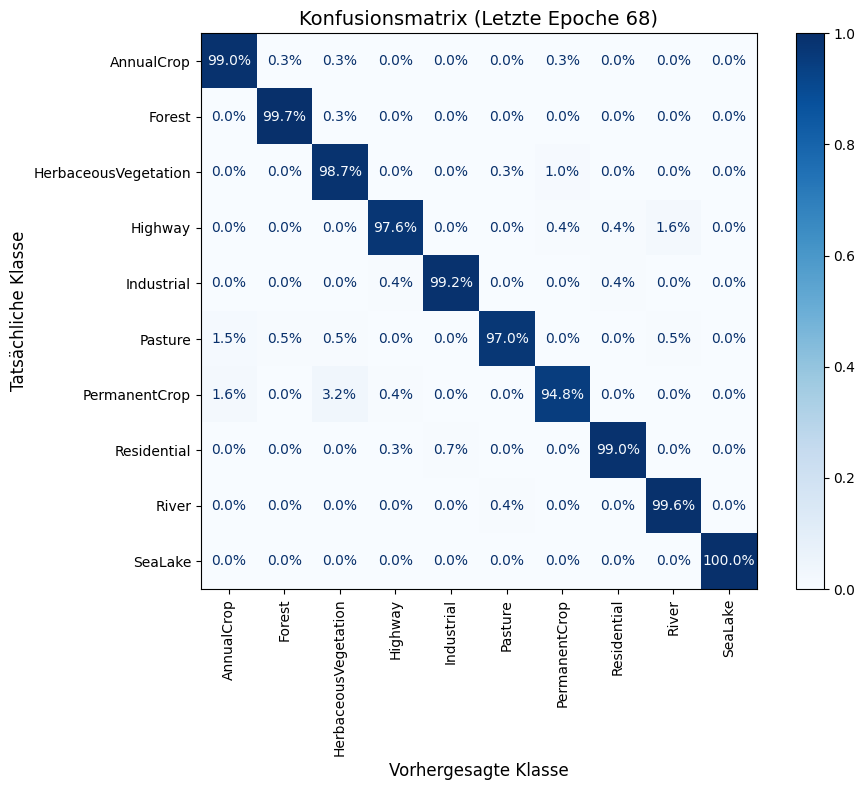

---> Training Epoch 69/150 | Target LR: 5.0000e-04



    Epoch 69 Training Summary: Loss: 0.8240 | Accuracy: 0.5817 | Final LR: 1.0000e-06 | Duration: 70.54s
---> Validation Epoch 69/150



    Epoch 69 Validation Summary: Loss: 0.5608 | Accuracy: 0.9859 | Duration: 6.83s
---> Val loss did not improve for 18 epochs.

--- Konfusionsmatrix nach letzter Epoche (69) ---
---> Validation Epoch 69/150



    Epoch 69 Validation Summary: Loss: 0.5608 | Accuracy: 0.9859 | Duration: 6.55s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 99.     0.33   0.33   0.     0.     0.     0.33   0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.    98.33   0.     0.     0.33   1.     0.     0.     0.33]
 [  0.     0.     0.    97.6    0.     0.     0.4    0.4    1.6    0.  ]
 [  0.     0.     0.     0.4   99.2    0.     0.     0.4    0.     0.  ]
 [  1.5    0.5    0.5    0.     0.    97.     0.     0.     0.5    0.  ]
 [  1.2    0.     3.2    0.4    0.     0.    95.2    0.     0.     0.  ]
 [  0.     0.     0.     0.     0.67   0.     0.    99.33   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.     0.    99.6    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


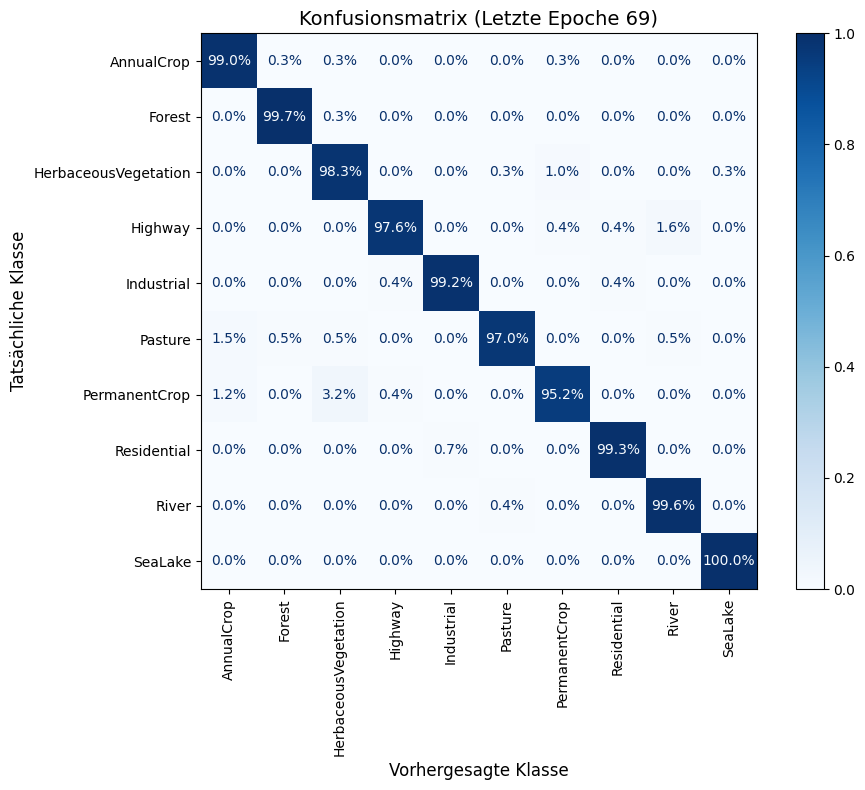

--- Epoch 70: Switching to SWA Scheduler ---
---> Training Epoch 70/150 | Target LR: 5.0000e-04



    Epoch 70 Training Summary: Loss: 0.8208 | Accuracy: 0.5695 | Final LR: 1.0000e-06 | Duration: 70.47s
---> Validation Epoch 70/150



    Epoch 70 Validation Summary: Loss: 0.5612 | Accuracy: 0.9848 | Duration: 6.81s
--- Epoch 70: SWA phase started. Averaging weights... ---
---> Val loss did not improve for 19 epochs.

--- Konfusionsmatrix nach letzter Epoche (70) ---
---> Validation Epoch 70/150



    Epoch 70 Validation Summary: Loss: 0.5612 | Accuracy: 0.9848 | Duration: 6.80s
Konfusionsmatrix (normalisiert auf Zeilen):
[[ 98.33   0.33   0.33   0.     0.     0.     1.     0.     0.     0.  ]
 [  0.    99.67   0.33   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.    98.33   0.     0.     0.33   1.     0.     0.     0.33]
 [  0.     0.     0.    97.6    0.     0.     0.4    0.4    1.6    0.  ]
 [  0.     0.     0.     0.4   99.2    0.     0.     0.4    0.     0.  ]
 [  1.5    0.5    0.5    0.     0.    97.     0.     0.     0.5    0.  ]
 [  1.2    0.     3.2    0.4    0.     0.    95.2    0.     0.     0.  ]
 [  0.     0.     0.     0.     0.67   0.     0.    99.33   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.4    0.4    0.    99.2    0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.   100.  ]]


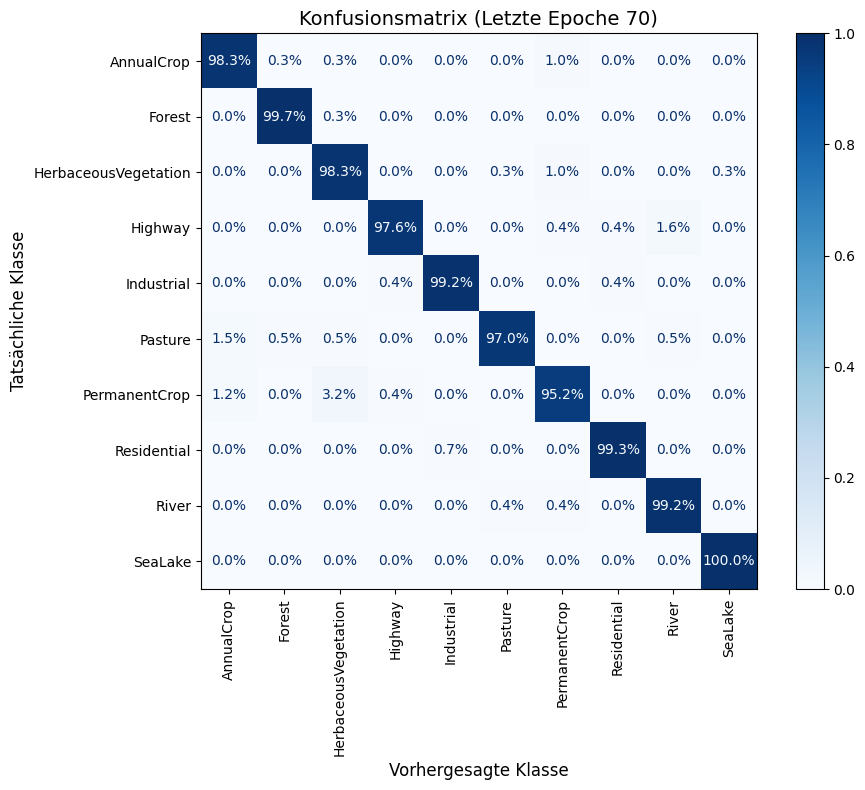

---> Training Epoch 71/150 | Target LR: 5.0000e-04



    Epoch 71 Training Summary: Loss: 0.8284 | Accuracy: 0.5797 | Final LR: 1.8594e-06 | Duration: 70.59s
---> Validation Epoch 71/150



    Epoch 71 Validation Summary: Loss: 0.5755 | Accuracy: 0.9841 | Duration: 6.95s
---> Val loss did not improve for 20 epochs.
Early stopping triggered at epoch 71.


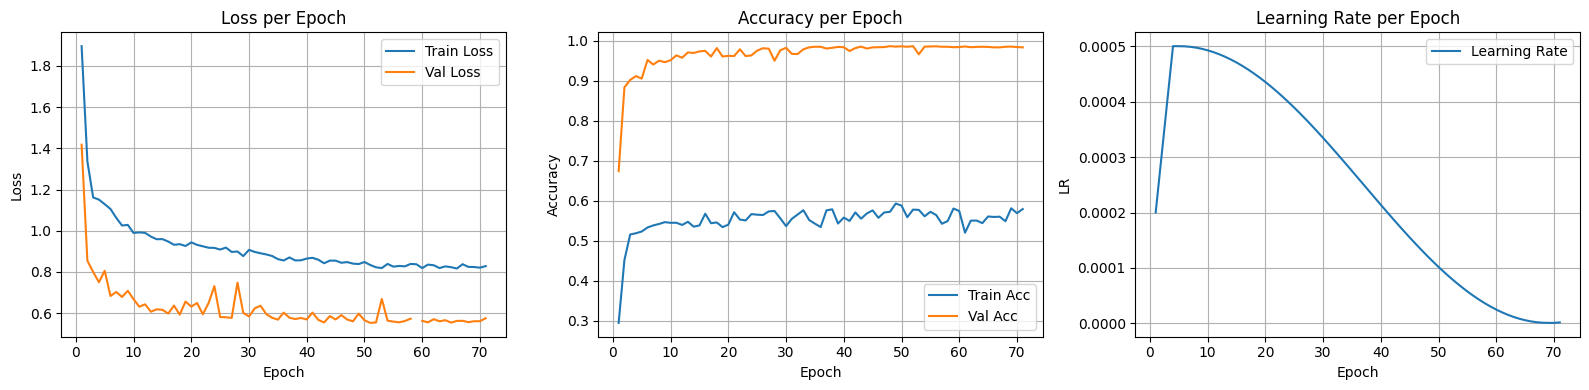


--- Training Complete ---
Updating SWA Batch Norm statistics...
SWA Batch Norm update complete.
Saving final SWA model state to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_swa_final.pth

--- Evaluating Confusion Matrix AFTER SWA ---
---> Validation Epoch 70/150



    Epoch 70 Validation Summary: Loss: 3.7030 | Accuracy: 0.0926 | Duration: 6.91s

--- Evaluating Confusion Matrix (Final Model after Training) ---
---> Validation Epoch 70/150



    Epoch 70 Validation Summary: Loss: 0.5755 | Accuracy: 0.9841 | Duration: 6.85s
Fehler beim Anzeigen der Konfusionsmatrix: name 'class_labels' is not defined
Best non-SWA model state saved to outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_best_non_swa.pth (Val Loss: 0.5529)

--- Script Finished ---
IMPORTANT: Evaluate the desired checkpoint (e.g., outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_best_non_swa.pth or outputs/resnet50_16ch_eurosat_scratch_swa_v1/ResNet50_16ch_EuroSAT_Scratch_SWA_v1_swa_final.pth) using the evaluation script.


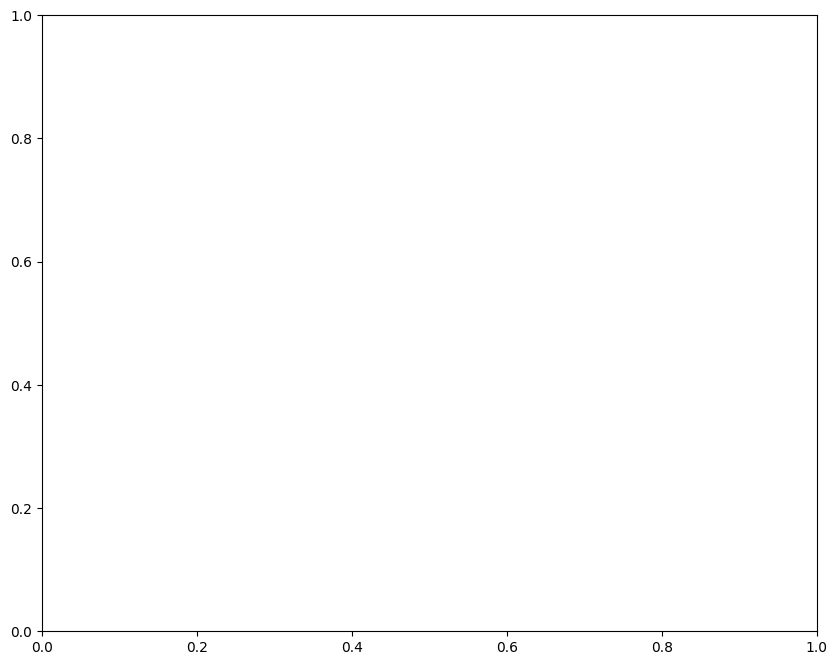

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision.models as models
import rasterio
import numpy as np
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
import random
import time
from torch.cuda.amp import GradScaler, autocast
from sklearn.model_selection import train_test_split
import traceback
from pathlib import Path
from tqdm import tqdm
from typing import Tuple, List, Dict, Any, Optional, Callable
import warnings
# SWA Imports
from torch.optim.swa_utils import AveragedModel, SWALR
from torch.optim.lr_scheduler import CosineAnnealingLR
# YAML and Argparse Imports
import yaml
import argparse

# Listen zum Plotten
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
lr_history = []


# --- Argument Parser ---
parser = argparse.ArgumentParser(description='Train ResNet model for EuroSAT classification.')
parser.add_argument('--config', type=str, required=True, help='Path to the YAML configuration file.')
# Use parse_known_args to avoid issues in some environments (like notebooks)
args, unknown = parser.parse_known_args()


# --- Load Configuration ---
config_path = Path(args.config)
if not config_path.is_file():
    raise FileNotFoundError(f"Configuration file not found: {config_path}")
try:
    with open(config_path, 'r') as f:
        config = yaml.safe_load(f) # Load config from YAML
    print(f"Loaded configuration from: {config_path}")
except yaml.YAMLError as e:
    raise ValueError(f"Error parsing YAML file: {e}")
except Exception as e:
    raise IOError(f"Error reading config file: {e}")

# --- Device Setup (Override config if needed) ---
USE_CUDA = torch.cuda.is_available()
if USE_CUDA:
    DEVICE = torch.device("cuda")
    config['device'] = 'cuda' # Ensure config reflects actual device
    config['amp_enabled'] = config.get('amp_enabled', True) # Keep True if not specified
elif torch.backends.mps.is_available():
    DEVICE = torch.device("mps")
    config['device'] = 'mps'
    config['amp_enabled'] = False # AMP typically not used/stable on MPS
else:
    DEVICE = torch.device("cpu")
    config['device'] = 'cpu'
    config['amp_enabled'] = False
print(f"Using device: {DEVICE}")
print(f"AMP Enabled: {config['amp_enabled']}")


# --- Suppress warnings ---
warnings.filterwarnings("ignore")

# --- Seed Setting ---
def set_seed(seed: int):
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
    if torch.cuda.is_available(): torch.cuda.manual_seed(seed); torch.cuda.manual_seed_all(seed)
    print(f"Random seed set to {seed}")
# Cast seed to int for robustness
set_seed(int(config["train"]["seed"]))

# --- Data Loading and Preprocessing (Indices BEFORE Norm) ---
TARGET_BANDS_INDICES = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12]

# --- Band Mapping (Standard Order) ---
BAND_MAP_12 = {
    "B1_Coastal": 0, "B2_Blue": 1, "B3_Green": 2, "B4_Red": 3,
    "B5_RE1": 4, "B6_RE2": 5, "B7_RE3": 6, "B8_NIR": 7,
    "B8A_NIR2": 8, "B9_WV": 9, "B11_SWIR1": 10, "B12_SWIR2": 11
}
print(f"Using BAND_MAP_12 reflecting standard order: {BAND_MAP_12}")

# --- load_sentinel2_image function (with reordering logic) ---
def load_sentinel2_image(filepath: str) -> Optional[np.ndarray]:
    """Loads 13-band TIF, selects 12, reorders to standard L2A sequence."""
    try:
        filepath_lower = filepath.lower()
        if not filepath_lower.endswith(('.tif', '.tiff')): return None
        with rasterio.open(filepath) as src:
            if src.count != 13: return None # Skip if not 13 bands
            all_bands = src.read(list(range(1, 14))).astype(np.float32)
        standard_order_indices_in_tif = [0, 1, 2, 3, 4, 5, 6, 7, 12, 8, 10, 11] # B1..B8, B8A, B9, B11, B12
        image_data_12_standard_order = all_bands[standard_order_indices_in_tif, :, :]
        if image_data_12_standard_order.shape[0] != 12: return None
        return image_data_12_standard_order
    except Exception as e: print(f"Error loading/reordering TIF {filepath}: {e}"); return None

# --- Index Calculation ---
def calculate_indices_from_raw(image_np_12bands: np.ndarray, epsilon=1e-7) -> Dict[str, np.ndarray]:
    indices = {}; clip_val = 1.0; global BAND_MAP_12
    try:
        # (Index calculation logic remains the same - uses BAND_MAP_12)
        nir=image_np_12bands[BAND_MAP_12["B8_NIR"],:,:]; red=image_np_12bands[BAND_MAP_12["B4_Red"],:,:]
        green=image_np_12bands[BAND_MAP_12["B3_Green"],:,:]; swir1=image_np_12bands[BAND_MAP_12["B11_SWIR1"],:,:]
        re1=image_np_12bands[BAND_MAP_12["B5_RE1"],:,:]
        denominator_ndvi=nir+red; ndvi=np.full_like(denominator_ndvi, 0.0, dtype=np.float32)
        valid_mask_ndvi=np.abs(denominator_ndvi)>epsilon; ndvi[valid_mask_ndvi]=(nir[valid_mask_ndvi]-red[valid_mask_ndvi])/denominator_ndvi[valid_mask_ndvi]
        indices['NDVI']=np.clip(np.nan_to_num(ndvi, nan=0.0, posinf=clip_val, neginf=-clip_val), -clip_val, clip_val)
        denominator_ndwi=green+nir; ndwi=np.full_like(denominator_ndwi, 0.0, dtype=np.float32)
        valid_mask_ndwi=np.abs(denominator_ndwi)>epsilon; ndwi[valid_mask_ndwi]=(green[valid_mask_ndwi]-nir[valid_mask_ndwi])/denominator_ndwi[valid_mask_ndwi]
        indices['NDWI']=np.clip(np.nan_to_num(ndwi, nan=0.0, posinf=clip_val, neginf=-clip_val), -clip_val, clip_val)
        denominator_ndbi=swir1+nir; ndbi=np.full_like(denominator_ndbi, 0.0, dtype=np.float32)
        valid_mask_ndbi=np.abs(denominator_ndbi)>epsilon; ndbi[valid_mask_ndbi]=(swir1[valid_mask_ndbi]-nir[valid_mask_ndbi])/denominator_ndbi[valid_mask_ndbi]
        indices['NDBI']=np.clip(np.nan_to_num(ndbi, nan=0.0, posinf=clip_val, neginf=-clip_val), -clip_val, clip_val)
        denominator_ndre1=nir+re1; ndre1=np.full_like(denominator_ndre1, 0.0, dtype=np.float32)
        valid_mask_ndre1=np.abs(denominator_ndre1)>epsilon; ndre1[valid_mask_ndre1]=(nir[valid_mask_ndre1]-re1[valid_mask_ndre1])/denominator_ndre1[valid_mask_ndre1]
        indices['NDRE1']=np.clip(np.nan_to_num(ndre1, nan=0.0, posinf=clip_val, neginf=-clip_val), -clip_val, clip_val)
    except Exception as e: print(f"Error calculating indices: {e}"); return {}
    return indices

# --- Normalization ---
def normalize_16ch_per_image(image_np_16ch: np.ndarray) -> Optional[np.ndarray]:
    if image_np_16ch is None or image_np_16ch.ndim != 3 or image_np_16ch.shape[0] != 16: return None
    try:
        mean=np.nanmean(image_np_16ch, axis=(1, 2), keepdims=True); std=np.nanstd(image_np_16ch, axis=(1, 2), keepdims=True)
        mean=np.nan_to_num(mean, nan=0.0); std=np.nan_to_num(std, nan=1.0); std[std < 1e-7]=1.0
        normalized_image=(image_np_16ch - mean) / std
        if np.isnan(normalized_image).any() or np.isinf(normalized_image).any(): normalized_image = np.nan_to_num(normalized_image, nan=0.0, posinf=0.0, neginf=0.0)
        return normalized_image.astype(np.float32)
    except Exception as e: print(f"Error during 16ch normalization: {e}"); return None

# --- Dataset Class ---
class Sentinel2Dataset(Dataset):
    def __init__(self, paths_labels: List[Tuple[str, int]], transform: Optional[Callable] = None, output_channels: int = 16):
        self.paths_labels = [(p, l) for p, l in paths_labels if os.path.exists(p)]
        if len(self.paths_labels) != len(paths_labels): print(f"Warning: Filtered {len(paths_labels) - len(self.paths_labels)} non-existent paths.")
        self.transform = transform
        self.output_channels = output_channels
        print(f"Initialized Sentinel2Dataset with {len(self.paths_labels)} samples. Output channels: {self.output_channels}")
    def __len__(self): return len(self.paths_labels)
    def __getitem__(self, idx):
        image_path, label = self.paths_labels[idx]
        try:
            image_np_12 = load_sentinel2_image(image_path);
            if image_np_12 is None: return None
            indices_dict = calculate_indices_from_raw(image_np_12);
            if not indices_dict: return None
            indices_list=[indices_dict['NDVI'], indices_dict['NDWI'], indices_dict['NDBI'], indices_dict['NDRE1']]
            h,w=image_np_12.shape[1], image_np_12.shape[2]; indices_arrays=[idx_arr[np.newaxis, :h, :w] for idx_arr in indices_list]
            try: image_np_16 = np.concatenate([image_np_12] + indices_arrays, axis=0)
            except ValueError as e: print(f"Concat Error {image_path}: {e}"); return None
            if image_np_16.shape[0] != self.output_channels: return None
            image_np_norm_16 = normalize_16ch_per_image(image_np_16);
            if image_np_norm_16 is None: return None
            image_tensor = torch.from_numpy(image_np_norm_16).float()
            if self.transform: image_tensor = self.transform(image_tensor)
            if image_tensor.shape[0]!=self.output_channels or image_tensor.ndim!=3: return None
            label_tensor = torch.tensor(label, dtype=torch.long)
            return image_tensor, label_tensor, image_path
        except Exception as e: print(f"Error processing image {image_path}: {e}"); return None

# --- Data Transforms ---
IMG_SIZE = config["data"]["image_size"]
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE), antialias=True),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0))], p=0.3),
    transforms.RandomErasing(p=0.25, scale=(0.02, 0.15), ratio=(0.3, 3.3), value=0, inplace=False),
])
val_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE), antialias=True),
])

# --- Create Datasets ---
print("Scanning training directory and creating dataset splits...")
full_dataset_paths_labels = []
class_to_idx_map = {}
class_names = []
idx_counter = 0
train_root_dir = Path(config["data"]["train_dir"])
if not train_root_dir.exists(): raise FileNotFoundError(f"Training directory not found: {train_root_dir}")
for class_folder in sorted(train_root_dir.iterdir()):
     if class_folder.is_dir() and not class_folder.name.startswith('.'):
         class_name = class_folder.name
         if class_name not in class_to_idx_map: class_to_idx_map[class_name] = idx_counter; class_names.append(class_name); idx_counter += 1
         class_idx = class_to_idx_map[class_name]
         for filepath in class_folder.glob('*.tif'): full_dataset_paths_labels.append((str(filepath), class_idx))

num_classes = len(class_names)
if num_classes == 0: raise FileNotFoundError(f"No valid class folders found in {train_root_dir}")
config["model"]["num_classes"] = num_classes
config["model"]["class_names"] = class_names
print(f"Found {len(full_dataset_paths_labels)} training paths in {num_classes} classes: {class_names}")
print(f"Class mapping: {class_to_idx_map}")

try:
    train_info, val_info = train_test_split(
        full_dataset_paths_labels,
        train_size=float(config["data"]["train_ratio"]), # Cast train_ratio
        random_state=int(config["train"]["seed"]),       # Cast seed
        stratify=[label for _, label in full_dataset_paths_labels]
    )
except ValueError as e:
     print(f"Warning: Stratified split failed ({e}). Falling back to non-stratified split.")
     train_info, val_info = train_test_split(
         full_dataset_paths_labels,
         train_size=float(config["data"]["train_ratio"]), # Cast train_ratio
         random_state=int(config["train"]["seed"])       # Cast seed
     )

print("Creating Sentinel2Dataset instances...")
train_dataset = Sentinel2Dataset(
    train_info,
    transform=train_transforms,
    output_channels=int(config["model"]["input_channels"]) # Cast channels
)
val_tif_dataset = Sentinel2Dataset(
    val_info,
    transform=val_transforms,
    output_channels=int(config["model"]["input_channels"]) # Cast channels
)

# --- Create DataLoaders ---
def collate_fn(batch):
    batch = [item for item in batch if item is not None]
    if not batch: return None, None, None
    try:
        images = torch.stack([item[0] for item in batch]); labels = torch.stack([item[1] for item in batch]); paths = [item[2] for item in batch]
        return images, labels, paths
    except Exception as e: print(f"Error in collate_fn: {e}. Skipping batch."); return None, None, None

persistent_workers = int(config["data"]["num_workers"]) > 0 # Cast num_workers
train_loader = DataLoader(
    train_dataset,
    batch_size=int(config["data"]["batch_size"]), # Cast batch_size
    shuffle=True,
    num_workers=int(config["data"]["num_workers"]), # Cast num_workers
    pin_memory=True,
    collate_fn=collate_fn,
    drop_last=True,
    persistent_workers=persistent_workers
)
val_loader = DataLoader(
    val_tif_dataset,
    batch_size=int(config["data"]["batch_size"])*2, # Cast batch_size
    shuffle=False,
    num_workers=int(config["data"]["num_workers"]), # Cast num_workers
    pin_memory=True,
    collate_fn=collate_fn,
    persistent_workers=persistent_workers
)
print("Train and Validation DataLoaders created.")


# --- Model Definition (Handles Pretrained and Scratch based on config) ---
def adapt_resnet_for_multichannel(model_name="resnet50", pretrained=False, num_classes=10, input_channels=16):
    """Loads ResNet architecture, optionally loads pretrained weights, adapts layers."""
    print(f"Loading {model_name} architecture...")
    weights = models.ResNet50_Weights.DEFAULT if pretrained else None
    if pretrained: print("Attempting to load PRETRAINED weights (ImageNet)...")
    else: print("Using RANDOM weights (training from scratch)...")
    model = models.get_model(model_name, weights=weights)
    original_conv1 = model.conv1
    new_conv1 = nn.Conv2d(input_channels, original_conv1.out_channels, kernel_size=original_conv1.kernel_size, stride=original_conv1.stride, padding=original_conv1.padding, bias=original_conv1.bias is not None)
    if pretrained:
        print(f"Adapting pretrained weights for conv1 from 3 to {input_channels} channels...")
        original_weights = original_conv1.weight.data
        avg_weights = torch.mean(original_weights, dim=1, keepdim=True)
        repeated_weights = avg_weights.repeat(1, input_channels, 1, 1)
        new_conv1.weight.data = repeated_weights
        if new_conv1.bias is not None: new_conv1.bias.data = original_conv1.bias.data
        print("Pretrained conv1 weights adapted.")
    else:
        print("Initializing conv1 weights randomly...")
        nn.init.kaiming_normal_(new_conv1.weight, mode='fan_out', nonlinearity='relu')
        if new_conv1.bias is not None: nn.init.zeros_(new_conv1.bias)
        print("Random conv1 weights initialized.")
    model.conv1 = new_conv1
    print("Replacing and initializing final fc layer...")
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)
    nn.init.xavier_uniform_(model.fc.weight);
    if model.fc.bias is not None: nn.init.zeros_(model.fc.bias)
    print(f"Replaced model.fc layer for {num_classes} classes.")
    return model

# --- MixUp and CutMix Implementations (Unchanged) ---
def mixup_data(x, y, alpha=1.0, device='cuda'):
    if alpha > 0: lam = np.random.beta(alpha, alpha)
    else: lam = 1
    batch_size = x.size()[0]; index = torch.randperm(batch_size).to(device)
    mixed_x = lam * x + (1 - lam) * x[index, :]; y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam
def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)
def rand_bbox(size, lam):
    W = size[2]; H = size[3]; cut_rat = np.sqrt(1. - lam); cut_w = int(W * cut_rat); cut_h = int(H * cut_rat)
    cx = np.random.randint(W); cy = np.random.randint(H)
    bbx1 = np.clip(cx - cut_w // 2, 0, W); bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W); bby2 = np.clip(cy + cut_h // 2, 0, H)
    return bbx1, bby1, bbx2, bby2
def cutmix_data(x, y, alpha=1.0, device='cuda'):
    if alpha > 0: lam = np.random.beta(alpha, alpha)
    else: lam = 1
    batch_size = x.size()[0]; index = torch.randperm(batch_size).to(device)
    y_a, y_b = y, y[index]; bbx1, bby1, bbx2, bby2 = rand_bbox(x.size(), lam)
    x[:, :, bby1:bby2, bbx1:bbx2] = x[index, :, bby1:bby2, bbx1:bbx2]
    lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (x.size()[-1] * x.size()[-2]))
    return x, y_a, y_b, lam


# --- Learning Rate Warm-up Helper ---
def get_lr(optimizer):
    if optimizer is None: return 0.0
    for param_group in optimizer.param_groups: return param_group['lr']
def adjust_lr_with_warmup(optimizer, initial_lr, epoch, step, steps_per_epoch, warmup_epochs, config):
    total_warmup_steps = warmup_epochs * steps_per_epoch
    current_step = epoch * steps_per_epoch + step
    if current_step < total_warmup_steps:
        start_lr = 1e-7
        lr = start_lr + (initial_lr - start_lr) * (current_step + 1) / total_warmup_steps
        for param_group in optimizer.param_groups: param_group['lr'] = lr
        return lr
    else: return None

# --- Training/Validation Epoch Helper (with casting fix) ---
def run_epoch(model, loader, criterion, optimizer, scaler, scheduler, device, is_training,
              epoch_num, total_epochs, config, steps_per_epoch, is_cosine_scheduler=False,return_preds=False):
    # --- Explicit Type Casting for Robustness ---
    all_preds = [] if return_preds else None
    all_targets = [] if return_preds else None

    initial_lr = float(config['train']['lr'])
    warmup_epochs = int(config['train']['warmup_epochs'])
    gradient_accumulation_steps = int(config['train']['gradient_accumulation_steps'])
    # Handle optional gradient_clip_norm correctly
    gradient_clip_norm_config = config['train'].get("gradient_clip_norm")
    gradient_clip_norm = float(gradient_clip_norm_config) if gradient_clip_norm_config is not None else None
    amp_enabled = scaler is not None and bool(config['amp_enabled']) # Cast amp_enabled
    use_mixup = bool(config['train']['use_mixup']) and is_training
    use_cutmix = bool(config['train']['use_cutmix']) and is_training
    mixup_alpha = float(config['train']['mixup_alpha'])
    cutmix_alpha = float(config['train']['cutmix_alpha'])
    mixup_prob = float(config['train']['mixup_prob'])
    label_smoothing = float(config['train']['label_smoothing'])
    # --- End Type Casting ---

    if is_training: model.train(); print(f'---> Training Epoch {epoch_num}/{total_epochs} | Target LR: {initial_lr:.4e}')
    else: model.eval(); print(f'---> Validation Epoch {epoch_num}/{total_epochs}')

    running_loss = 0.0; correct_predictions = 0; total_samples = 0; start_time = time.time()
    base_criterion = nn.CrossEntropyLoss(label_smoothing=label_smoothing, reduction='mean')
    progress_bar = tqdm(loader, desc=f"Epoch {epoch_num} {'Train' if is_training else 'Val'}", leave=False)

    with torch.set_grad_enabled(is_training):
        for batch_idx, batch_data in enumerate(progress_bar):
            if batch_data is None or batch_data[0] is None: continue
            inputs, targets, _ = batch_data
            inputs, targets_orig = inputs.to(device, non_blocking=True), targets.to(device, non_blocking=True)
            current_lr = None
            # Pass integer warmup_epochs here
            if is_training and warmup_epochs > 0 and (epoch_num-1) < warmup_epochs :
                 current_lr = adjust_lr_with_warmup(optimizer, initial_lr, epoch_num-1, batch_idx, steps_per_epoch, warmup_epochs, config)

            apply_mixup_cutmix = (use_mixup or use_cutmix) and random.random() < mixup_prob
            if apply_mixup_cutmix:
                use_this_mixup = use_mixup
                if use_mixup and use_cutmix: use_this_mixup = (random.random() < 0.5)
                if use_this_mixup: inputs, targets_a, targets_b, lam = mixup_data(inputs, targets_orig, mixup_alpha, device)
                else: inputs, targets_a, targets_b, lam = cutmix_data(inputs, targets_orig, cutmix_alpha, device)
            else: apply_mixup_cutmix = False; targets_a, targets_b, lam = None, None, None

            with torch.amp.autocast(device_type=device.type, dtype=torch.float16, enabled=amp_enabled):
                outputs = model(inputs)
                if apply_mixup_cutmix: loss = mixup_criterion(base_criterion, outputs, targets_a, targets_b, lam)
                else: loss = criterion(outputs, targets_orig)
                # Use integer gradient_accumulation_steps
                if is_training and gradient_accumulation_steps > 1: loss = loss / gradient_accumulation_steps

            if is_training:
                if amp_enabled: scaler.scale(loss).backward()
                else: loss.backward()
                # Use integer gradient_accumulation_steps
                if (batch_idx + 1) % gradient_accumulation_steps == 0:
                    if amp_enabled: scaler.unscale_(optimizer);
                    # Use float gradient_clip_norm if not None
                    if gradient_clip_norm is not None:
                        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=gradient_clip_norm)
                    if amp_enabled: scaler.step(optimizer); scaler.update()
                    else: optimizer.step()
                    optimizer.zero_grad(set_to_none=True)
                    # Use integer warmup_epochs
                    is_after_warmup = (warmup_epochs == 0) or ((epoch_num-1) >= warmup_epochs)
                    if is_after_warmup and is_cosine_scheduler and scheduler is not None:
                         scheduler.step()

                if torch.isnan(loss) or torch.isinf(loss): print(f"\nWARNING: NaN/Inf loss {loss.item()} E{epoch_num} B{batch_idx+1}. Skipping."); optimizer.zero_grad(set_to_none=True); continue

            # Use integer gradient_accumulation_steps
            batch_loss = loss.item() * gradient_accumulation_steps if is_training and gradient_accumulation_steps > 1 else loss.item()
            running_loss += batch_loss * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1); total_samples += targets_orig.size(0)
            correct_predictions += (predicted == targets_orig).sum().item()

             # 💡 Hier sammelst du die Vorhersagen für die Konfusionsmatrix
            if not is_training and return_preds:
                all_preds.extend(predicted.cpu().numpy())
                all_targets.extend(targets_orig.cpu().numpy())

            current_acc = correct_predictions / total_samples if total_samples > 0 else 0
            if is_training: display_lr = get_lr(optimizer); progress_bar.set_postfix(loss=f"{batch_loss:.4f}", acc=f"{current_acc:.3f}", lr=f"{display_lr:.2e}")
            else: progress_bar.set_postfix(loss=f"{batch_loss:.4f}", acc=f"{current_acc:.3f}")

    epoch_duration = time.time() - start_time
    if total_samples == 0: print(f"Warning: No valid samples processed in epoch {epoch_num}."); return 0.0, 0.0
    epoch_loss = running_loss / total_samples; epoch_acc = correct_predictions / total_samples
    mode_str = "Training" if is_training else "Validation"
    final_lr = None
    if is_training: final_lr = get_lr(optimizer); print(f'\n    Epoch {epoch_num} {mode_str} Summary: Loss: {epoch_loss:.4f} | Accuracy: {epoch_acc:.4f} | Final LR: {final_lr:.4e} | Duration: {epoch_duration:.2f}s')
    else: print(f'\n    Epoch {epoch_num} {mode_str} Summary: Loss: {epoch_loss:.4f} | Accuracy: {epoch_acc:.4f} | Duration: {epoch_duration:.2f}s')
    if return_preds:
      return epoch_loss, epoch_acc, all_preds, all_targets
    else:
      return epoch_loss, epoch_acc


# --- Main Execution Logic ---
if __name__ == '__main__':
    # Paths from config
    base_save_path = Path(config["model"]["base_save_path"])
    base_save_path.mkdir(parents=True, exist_ok=True)
    best_model_path = base_save_path / f"{config['model']['name']}_best_non_swa.pth"
    swa_model_path = base_save_path / f"{config['model']['name']}_swa_final.pth"

    if config["model"]["num_classes"] is None: raise ValueError("Num classes not determined.")
    num_classes = int(config["model"]["num_classes"]) # Cast num_classes

    # Instantiate model using config
    model = adapt_resnet_for_multichannel(
        model_name=config["model"].get("architecture", "resnet50"),
        pretrained=bool(config["model"]["pretrained"]), # Cast pretrained
        num_classes=num_classes,
        input_channels=int(config["model"]["input_channels"]) # Cast channels
    )
    model.to(DEVICE)

    # SWA Model Initialization
    swa_model = AveragedModel(model)
    print("SWA Model wrapper created.")

    # Optimizer and Loss from config
    criterion = nn.CrossEntropyLoss(label_smoothing=float(config["train"]["label_smoothing"])) # Cast smoothing
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=float(config["train"]["lr"]),             # Cast lr
        weight_decay=float(config["train"]["weight_decay"]) # Cast wd
    )
    print(f"Optimizer: AdamW (Target Initial LR={config['train']['lr']}, WD={config['train']['weight_decay']})")

    # Cast warmup_epochs
    warmup_epochs = int(config["train"]["warmup_epochs"])
    if warmup_epochs > 0:
        print(f"Using {warmup_epochs} warm-up epochs.")
        for param_group in optimizer.param_groups: param_group['lr'] = 1e-7 # Start low

    # Scheduler Setup from config
    num_epochs = int(config["train"]["epochs"]) # Cast epochs
    gradient_accumulation_steps = int(config["train"]["gradient_accumulation_steps"]) # Cast steps
    gradient_clip_norm_config = config["train"].get("gradient_clip_norm") # Handle None case
    gradient_clip_norm = float(gradient_clip_norm_config) if gradient_clip_norm_config is not None else None
    if gradient_clip_norm: print(f"Using gradient clipping with max_norm={gradient_clip_norm}")

    steps_per_epoch = len(train_loader) // gradient_accumulation_steps
    if steps_per_epoch == 0: steps_per_epoch = 1

    # Main LR Scheduler
    swa_start_epoch = int(config["train"]["swa_start_epoch"]) # Cast swa start epoch
    epochs_before_swa = swa_start_epoch - 1
    steps_before_swa = steps_per_epoch * (epochs_before_swa - warmup_epochs)
    if steps_before_swa <= 0: steps_before_swa = 1

    scheduler = None
    is_cosine_scheduler = False
    if config["train"]["scheduler"] == "CosineAnnealingLR":
        eta_min_config = config["train"]["eta_min"]
        scheduler = CosineAnnealingLR(
            optimizer,
            T_max=steps_before_swa,
            eta_min=float(eta_min_config) # Cast eta_min
        )
        is_cosine_scheduler = True
        print(f"Using CosineAnnealingLR scheduler until SWA starts (T_max_steps={steps_before_swa} after warm-up, eta_min={float(eta_min_config):.2e})")
    elif config["train"]["scheduler"] == "ReduceLROnPlateau":
        # Add casting for ReduceLROnPlateau patience if needed, assume it's int for now
        patience_plateau = int(config["train"].get("scheduler_patience", 7)) # Example optional key
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=patience_plateau, verbose=True)
        is_cosine_scheduler = False; print("Using ReduceLROnPlateau scheduler.")
    else:
        print(f"Warning: Unknown scheduler type '{config['train']['scheduler']}'. No main scheduler used.")


    # SWA Scheduler
    swa_lr_config = config["train"]["swa_lr"]
    anneal_epochs_config = config["train"]["swa_anneal_epochs"]
    swa_scheduler = SWALR(
        optimizer,
        swa_lr=float(swa_lr_config),                 # Cast swa_lr
        anneal_epochs=int(anneal_epochs_config),     # Cast anneal_epochs
        anneal_strategy='cos'
    )
    print(f"SWA will start at epoch {swa_start_epoch} with SWA LR {float(swa_lr_config):.2e}")

    # Training Loop Setup
    patience = int(config["train"]["patience"]) # Cast patience
    checkpoint_interval = int(config["train"]["checkpoint_interval"]) # Cast interval
    overall_best_val_loss = float('inf'); total_epochs_run = 0
    scaler = GradScaler(enabled=bool(config["amp_enabled"])) # Cast amp_enabled
    if scaler.is_enabled(): print("Using Automatic Mixed Precision (AMP).")

    print(f"\n--- Starting Training for {num_epochs} epochs ---")
    epochs_without_improvement = 0


    if swa_start_epoch <= num_epochs:
      print(f"\n--- Evaluating Confusion Matrix BEFORE SWA (Epoch {swa_start_epoch - 1}) ---")
      model.eval()
      _, _, preds, targets = run_epoch(
          model, val_loader, criterion, None, scaler, None,
          DEVICE, False, swa_start_epoch - 1, num_epochs, config, steps_per_epoch, False,
          return_preds=True
      )

      from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
      cm = confusion_matrix(targets, preds)
      print("Confusion Matrix (Before SWA):")
      print(cm)
      try:
          disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=config["model"]["class_names"])
          disp.plot(xticks_rotation=45, cmap='viridis')
          plt.title(f"Confusion Matrix (Before SWA Epoch {swa_start_epoch - 1})")
          plt.tight_layout()
          plt.show()
      except Exception as e:
          print(f"Failed to plot confusion matrix: {e}")

    # --- Training Loop ---
    for epoch in range(num_epochs):

        epoch_num = total_epochs_run + 1
        use_swa_scheduler = epoch_num >= swa_start_epoch
        current_scheduler = swa_scheduler if use_swa_scheduler else scheduler
        current_is_cosine = (not use_swa_scheduler) and is_cosine_scheduler





        if use_swa_scheduler and epoch_num == swa_start_epoch:
            print(f"--- Epoch {epoch_num}: Switching to SWA Scheduler ---")

        # Pass the full config dict
        train_loss, train_accuracy = run_epoch( model, train_loader, criterion, optimizer, scaler, current_scheduler, DEVICE, True, epoch_num, num_epochs, config, steps_per_epoch, current_is_cosine )
        avg_val_loss, val_accuracy = run_epoch( model, val_loader, criterion, None, scaler, None, DEVICE, False, epoch_num, num_epochs, config, steps_per_epoch, False )

        train_losses.append(train_loss)
        val_losses.append(avg_val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        lr_history.append(get_lr(optimizer))

        # Step epoch-based schedulers (AFTER warm-up)
        is_after_warmup = (warmup_epochs == 0) or (epoch_num > warmup_epochs)
        if is_after_warmup:
            if use_swa_scheduler:
                 swa_scheduler.step() # SWA scheduler steps per epoch
            elif not current_is_cosine and scheduler is not None: # Step plateau scheduler
                 scheduler.step(avg_val_loss)

        # SWA Model Averaging (Implicit)
        if epoch_num >= swa_start_epoch:
             if epoch_num == swa_start_epoch: print(f"--- Epoch {epoch_num}: SWA phase started. Averaging weights... ---")

        # Checkpointing based on non-SWA model validation loss
        is_best = avg_val_loss < overall_best_val_loss
        if is_best:
            overall_best_val_loss = avg_val_loss; epochs_without_improvement = 0
            try: torch.save(model.state_dict(), best_model_path); print(f'---> Best non-SWA model state saved to {best_model_path}')
            except Exception as e: print(f"Error saving best non-SWA model state_dict: {e}")
        else:
            epochs_without_improvement += 1; print(f'---> Val loss did not improve for {epochs_without_improvement} epochs.')

        # Periodic checkpoint saving (non-SWA model)
        if checkpoint_interval > 0 and epoch_num % checkpoint_interval == 0:
             periodic_path = base_save_path / f"{config['model']['name']}_epoch_{epoch_num}.pth"
             try: torch.save(model.state_dict(), periodic_path); print(f'---> Periodic checkpoint saved to {periodic_path}')
             except Exception as e: print(f"Error saving periodic checkpoint: {e}")

        # Early stopping check
        if epochs_without_improvement >= patience: print(f'Early stopping triggered at epoch {epoch_num}.'); break
        total_epochs_run = epoch_num

        # --- Konfusionsmatrix aus der letzten Validation (unabhängig von Early Stopping) ---
        if total_epochs_run > 0:
            print(f"\n--- Konfusionsmatrix nach letzter Epoche ({total_epochs_run}) ---")
            model.eval()
            # Wir holen uns preds und targets aus genau der Validation der letzten Epoche
            _, _, preds, targets = run_epoch(
                model, val_loader, criterion, None, scaler, None,
                DEVICE,
                is_training=False,
                epoch_num=total_epochs_run,
                total_epochs=num_epochs,
                config=config,
                steps_per_epoch=steps_per_epoch,
                return_preds=True
            )
            # Und zeigen sie mit deiner Hilfsfunktion
            zeige_konfusionsmatrix(
                preds=preds,
                targets=targets,
                klassen=config["model"]["class_names"],
                titel=f"Konfusionsmatrix (Letzte Epoche {total_epochs_run})"
            )
        else:
            print("⚠️  Es wurde keine Epoche trainiert, daher keine Konfusionsmatrix erzeugt.")


    # --- After Training Loop ---

    epochs = list(range(1, len(train_losses) + 1))

    plt.figure(figsize=(16, 4))

    # Plot 1: Loss
    plt.subplot(1, 3, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss per Epoch')
    plt.legend()
    plt.grid(True)

    # Plot 2: Accuracy
    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_accuracies, label='Train Acc')
    plt.plot(epochs, val_accuracies, label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy per Epoch')
    plt.legend()
    plt.grid(True)

    # Plot 3: Learning Rate
    plt.subplot(1, 3, 3)
    plt.plot(epochs, lr_history, label='Learning Rate')
    plt.xlabel('Epoch')
    plt.ylabel('LR')
    plt.title('Learning Rate per Epoch')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt
    import numpy as np

    print("\n--- Training Complete ---")
    if total_epochs_run >= swa_start_epoch:
        print("Updating SWA Batch Norm statistics...")
        bn_update_device = DEVICE if DEVICE else None
        try:
            torch.optim.swa_utils.update_bn(train_loader, swa_model, device=bn_update_device)
            print("SWA Batch Norm update complete.")
            print(f"Saving final SWA model state to {swa_model_path}")
            torch.save(swa_model.module.state_dict(), swa_model_path) # Save the underlying averaged model
        except Exception as e: print(f"Error during SWA BN update or saving: {e}")
    else: print(f"SWA phase (start epoch {swa_start_epoch}) not reached.")

    if total_epochs_run >= swa_start_epoch:
      print("\n--- Evaluating Confusion Matrix AFTER SWA ---")
      swa_model.eval()
      _, _, preds, targets = run_epoch(
          swa_model, val_loader, criterion, None, scaler, None,
          DEVICE, False, total_epochs_run, num_epochs, config, steps_per_epoch, False,
          return_preds=True
      )

    print(f"\n--- Evaluating Confusion Matrix (Final Model after Training) ---")
    model.eval()
    _, _, preds, targets = run_epoch(
    model, val_loader, criterion, None, scaler, None,
    DEVICE, False, total_epochs_run, num_epochs, config, steps_per_epoch,
    return_preds=True
)
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt
    import numpy as np



    try:
        fig, ax = plt.subplots(figsize=(10, 8))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
        disp.plot(ax=ax, cmap='Blues', colorbar=True, values_format=".1%")  # Werte als Prozentsätze anzeigen

        ax.set_title("Konfusionsmatrix (Finales SWA-Modell, in Prozent)", fontsize=14)
        ax.set_xlabel("Vorhergesagte Klasse", fontsize=12)
        ax.set_ylabel("Tatsächliche Klasse", fontsize=12)

        plt.setp(ax.get_xticklabels(), rotation=90, ha="center", fontsize=10)
        plt.setp(ax.get_yticklabels(), fontsize=10)

        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Fehler beim Anzeigen der Konfusionsmatrix: {e}")

    if overall_best_val_loss != float('inf'): print(f'Best non-SWA model state saved to {best_model_path} (Val Loss: {overall_best_val_loss:.4f})')
    print("\n--- Script Finished ---")
    print(f"IMPORTANT: Evaluate the desired checkpoint (e.g., {best_model_path} or {swa_model_path}) using the evaluation script.")





In [14]:
def zeige_konfusionsmatrix(preds, targets, klassen, titel="Konfusionsmatrix"):
    cm = confusion_matrix(targets, preds, normalize='true')
    print("Konfusionsmatrix (normalisiert auf Zeilen):")
    print(np.round(cm * 100, 2))
    try:
        fig, ax = plt.subplots(figsize=(10, 8))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=klassen)
        disp.plot(ax=ax, cmap='Blues', colorbar=True, values_format=".1%")
        ax.set_title(titel, fontsize=14)
        ax.set_xlabel("Vorhergesagte Klasse", fontsize=12)
        ax.set_ylabel("Tatsächliche Klasse", fontsize=12)
        plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
        plt.setp(ax.get_yticklabels(), fontsize=10)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Fehler beim Anzeigen der Konfusionsmatrix: {e}")

In [10]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision.models as models
import torch.nn.functional as F
from torch.cuda.amp import autocast
from torchvision.transforms.functional import hflip # For TTA
import numpy as np
import pandas as pd
import os
import time
import traceback
from pathlib import Path
from tqdm import tqdm
from typing import Tuple, List, Dict, Any, Optional, Callable
import warnings
# YAML and Argparse Imports
import yaml # <<< Added
import argparse # <<< Added

# --- Argument Parser ---
parser = argparse.ArgumentParser(description='Evaluate ResNet model for EuroSAT classification.')
parser.add_argument('--config', type=str, required=True, help='Path to the YAML configuration file for evaluation.')
args = parser.parse_args()

# --- Load Configuration ---
config_path = Path(args.config)
if not config_path.is_file():
    raise FileNotFoundError(f"Configuration file not found: {config_path}")
try:
    with open(config_path, 'r') as f:
        config = yaml.safe_load(f) # <<< Load config from YAML
    print(f"Loaded evaluation configuration from: {config_path}")
except yaml.YAMLError as e:
    raise ValueError(f"Error parsing YAML file: {e}")
except Exception as e:
    raise IOError(f"Error reading config file: {e}")


# --- Device Setup (Override config if needed) ---
USE_CUDA = torch.cuda.is_available()
if USE_CUDA:
    DEVICE = torch.device("cuda")
    config['device'] = 'cuda' # Ensure config reflects actual device
    config['amp_enabled'] = True # Default AMP True if CUDA available
elif torch.backends.mps.is_available():
    DEVICE = torch.device("mps")
    config['device'] = 'mps'
    config['amp_enabled'] = False
else:
    DEVICE = torch.device("cpu")
    config['device'] = 'cpu'
    config['amp_enabled'] = False
print(f"Using device: {DEVICE}")
# Use AMP setting determined by device availability unless explicitly set to False in config
AMP_ENABLED = config.get('amp_enabled', USE_CUDA) # <<< Use loaded config, default based on CUDA
print(f"Automatic Mixed Precision (AMP) enabled for evaluation: {AMP_ENABLED}")


# --- Suppress warnings ---
warnings.filterwarnings("ignore")

# --- Validate Config (Num Classes / Class Names) ---
# <<< Get class info directly from loaded config
NUM_CLASSES = config["model"].get("num_classes")
CLASS_NAMES = config["model"].get("class_names")
if NUM_CLASSES is None or CLASS_NAMES is None:
    raise ValueError("Config must contain 'model.num_classes' and 'model.class_names'")
if len(CLASS_NAMES) != NUM_CLASSES:
     raise ValueError(f"Config Mismatch: num_classes ({NUM_CLASSES}) != length of class_names ({len(CLASS_NAMES)})")
print(f"Expecting {NUM_CLASSES} classes: {CLASS_NAMES}")


# --- Data Loading and Preprocessing (Matching Training Script) ---

# --- Band Mapping (Standard Order) ---
BAND_MAP_12 = {
    "B1_Coastal": 0, "B2_Blue": 1, "B3_Green": 2, "B4_Red": 3,
    "B5_RE1": 4, "B6_RE2": 5, "B7_RE3": 6, "B8_NIR": 7,
    "B8A_NIR2": 8, "B9_WV": 9, "B11_SWIR1": 10, "B12_SWIR2": 11
}
print(f"Using BAND_MAP_12 reflecting standard order: {BAND_MAP_12}")

def load_npy_image(filepath: str) -> Optional[np.ndarray]:
    """Loads NPY file, assuming 12 channels (C, H, W) or (H, W, C), returns (12, H, W) NumPy array or None."""
    try:
        filepath_lower = filepath.lower(); image_data = None
        if not filepath_lower.endswith('.npy'): return None
        image = np.load(filepath)
        if image.ndim == 3 and image.shape[0] != 12 and image.shape[2] == 12: image = image.transpose(2, 0, 1)
        elif image.ndim != 3 or image.shape[0] != 12: print(f"Error: NPY Shape {filepath}: {image.shape}"); return None
        return image.astype(np.float32)
    except Exception as e: print(f"Error loading NPY {filepath}: {e}"); traceback.print_exc(); return None

# --- Index Calculation ---
def calculate_indices_from_raw(image_np_12bands: np.ndarray, epsilon=1e-7) -> Dict[str, np.ndarray]:
    indices = {}; clip_val = 1.0; global BAND_MAP_12
    try:
        # (Index calculation logic remains the same)
        nir=image_np_12bands[BAND_MAP_12["B8_NIR"],:,:]; red=image_np_12bands[BAND_MAP_12["B4_Red"],:,:]
        green=image_np_12bands[BAND_MAP_12["B3_Green"],:,:]; swir1=image_np_12bands[BAND_MAP_12["B11_SWIR1"],:,:]
        re1=image_np_12bands[BAND_MAP_12["B5_RE1"],:,:]
        denominator_ndvi=nir+red; ndvi=np.full_like(denominator_ndvi, 0.0, dtype=np.float32)
        valid_mask_ndvi=np.abs(denominator_ndvi)>epsilon; ndvi[valid_mask_ndvi]=(nir[valid_mask_ndvi]-red[valid_mask_ndvi])/denominator_ndvi[valid_mask_ndvi]
        indices['NDVI']=np.clip(np.nan_to_num(ndvi, nan=0.0, posinf=clip_val, neginf=-clip_val), -clip_val, clip_val)
        denominator_ndwi=green+nir; ndwi=np.full_like(denominator_ndwi, 0.0, dtype=np.float32)
        valid_mask_ndwi=np.abs(denominator_ndwi)>epsilon; ndwi[valid_mask_ndwi]=(green[valid_mask_ndwi]-nir[valid_mask_ndwi])/denominator_ndwi[valid_mask_ndwi]
        indices['NDWI']=np.clip(np.nan_to_num(ndwi, nan=0.0, posinf=clip_val, neginf=-clip_val), -clip_val, clip_val)
        denominator_ndbi=swir1+nir; ndbi=np.full_like(denominator_ndbi, 0.0, dtype=np.float32)
        valid_mask_ndbi=np.abs(denominator_ndbi)>epsilon; ndbi[valid_mask_ndbi]=(swir1[valid_mask_ndbi]-nir[valid_mask_ndbi])/denominator_ndbi[valid_mask_ndbi]
        indices['NDBI']=np.clip(np.nan_to_num(ndbi, nan=0.0, posinf=clip_val, neginf=-clip_val), -clip_val, clip_val)
        denominator_ndre1=nir+re1; ndre1=np.full_like(denominator_ndre1, 0.0, dtype=np.float32)
        valid_mask_ndre1=np.abs(denominator_ndre1)>epsilon; ndre1[valid_mask_ndre1]=(nir[valid_mask_ndre1]-re1[valid_mask_ndre1])/denominator_ndre1[valid_mask_ndre1]
        indices['NDRE1']=np.clip(np.nan_to_num(ndre1, nan=0.0, posinf=clip_val, neginf=-clip_val), -clip_val, clip_val)
    except Exception as e: print(f"Error calculating indices: {e}"); return {}
    return indices

# --- Normalization ---
def normalize_16ch_per_image(image_np_16ch: np.ndarray) -> Optional[np.ndarray]:
    if image_np_16ch is None or image_np_16ch.ndim != 3 or image_np_16ch.shape[0] != 16: return None
    try:
        mean=np.nanmean(image_np_16ch, axis=(1, 2), keepdims=True); std=np.nanstd(image_np_16ch, axis=(1, 2), keepdims=True)
        mean=np.nan_to_num(mean, nan=0.0); std=np.nan_to_num(std, nan=1.0); std[std < 1e-7]=1.0
        normalized_image=(image_np_16ch - mean) / std
        if np.isnan(normalized_image).any() or np.isinf(normalized_image).any(): normalized_image = np.nan_to_num(normalized_image, nan=0.0, posinf=0.0, neginf=0.0)
        return normalized_image.astype(np.float32)
    except Exception as e: print(f"Error during 16ch normalization: {e}"); return None

# --- Prediction Dataset Class ---
class NpyPredictionDataset(Dataset):
    """ Dataset: Loads NPY (12ch), calculates indices (raw), stacks (16ch), normalizes (16ch), transforms. """
    def __init__(self, root_dir: str, transform: Optional[Callable] = None, output_channels: int = 16): # <<< Pass output_channels
        self.root_dir = Path(root_dir); self.transform = transform
        self.output_channels = output_channels # <<< Use passed value
        self.file_paths = sorted([p for p in self.root_dir.glob('*.npy')])
        if not self.file_paths: raise FileNotFoundError(f"No .npy files found in {self.root_dir}")
        print(f"Initialized NpyPredictionDataset with {len(self.file_paths)} files. Output channels: {self.output_channels}")
    def __len__(self): return len(self.file_paths)
    def __getitem__(self, idx: int) -> Optional[Tuple[torch.Tensor, str]]:
        image_path = str(self.file_paths[idx])
        try:
            image_np_12 = load_npy_image(image_path);
            if image_np_12 is None: return None
            indices_dict = calculate_indices_from_raw(image_np_12);
            if not indices_dict: return None
            indices_list=[indices_dict['NDVI'], indices_dict['NDWI'], indices_dict['NDBI'], indices_dict['NDRE1']]
            h,w=image_np_12.shape[1], image_np_12.shape[2]; indices_arrays=[idx_arr[np.newaxis, :h, :w] for idx_arr in indices_list]
            try: image_np_16 = np.concatenate([image_np_12] + indices_arrays, axis=0)
            except ValueError as e: print(f"Concat Error {image_path}: {e}"); return None
            if image_np_16.shape[0] != self.output_channels: return None
            image_np_norm_16 = normalize_16ch_per_image(image_np_16);
            if image_np_norm_16 is None: return None
            image_tensor = torch.from_numpy(image_np_norm_16).float()
            if self.transform: image_tensor = self.transform(image_tensor)
            if image_tensor.shape[0]!=self.output_channels or image_tensor.ndim!=3: return None
            return image_tensor, image_path
        except Exception as e: print(f"Error processing {image_path}: {e}"); return None

# --- Custom Collate Function ---
def collate_fn(batch):
    batch = [item for item in batch if item is not None]
    if not batch: return None
    try: return torch.utils.data.dataloader.default_collate(batch)
    except Exception as e: print(f"Error in collate_fn: {e}"); return None

# --- Transforms (Evaluation) ---
# <<< Use loaded config
IMG_SIZE = config["data"]["image_size"]
eval_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE), antialias=True),
])

# --- Model Definition Function ---
# <<< Use the same function definition as in the training script
def adapt_resnet_for_multichannel(model_name="resnet50", pretrained=False, num_classes=10, input_channels=16):
    """Loads ResNet architecture, optionally loads pretrained weights, adapts layers."""
    print(f"Loading {model_name} architecture definition...")
    model = models.get_model(model_name, weights=None) # Always load architecture only
    original_conv1=model.conv1; new_conv1=nn.Conv2d(input_channels, original_conv1.out_channels, kernel_size=original_conv1.kernel_size, stride=original_conv1.stride, padding=original_conv1.padding, bias=original_conv1.bias is not None)
    model.conv1 = new_conv1; print(f"Adapted model.conv1 architecture for {input_channels} inputs.")
    num_ftrs = model.fc.in_features; model.fc = nn.Linear(num_ftrs, num_classes); print(f"Adapted model.fc architecture for {num_classes} outputs.")
    # No random init needed here, weights loaded from state_dict later
    return model

# --- Main Evaluation Function (with TTA Option) ---
def evaluate_model(config: Dict[str, Any], device: torch.device, num_classes: int, class_names: List[str]):
    """Loads adapted ResNet model, runs prediction (with optional TTA), saves CSV."""
    # <<< Use loaded config
    use_tta = config["prediction"].get("use_tta", False)
    image_size = config["data"]["image_size"]
    input_channels = config["model"]["input_channels"]
    # Convert paths from config strings to Path objects
    prediction_dir = Path(config["data"]["prediction_dir"])
    base_save_path = Path(config["model"]["base_save_path"])
    model_load_path = base_save_path / f"{config['model']['name']}_best_non_swa.pth"
    predictions_csv_path = Path(config["prediction"]["predictions_csv_path"])


    # --- Data ---
    try:
        pred_dataset = NpyPredictionDataset(
            root_dir=str(prediction_dir), # NpyPredictionDataset expects string path
            transform=eval_transforms,
            output_channels=input_channels # Pass from config
        )
        pred_loader = DataLoader( pred_dataset, batch_size=config["data"]["batch_size"], shuffle=False,
            num_workers=config["data"]["num_workers"], pin_memory=True, collate_fn=collate_fn )
    except Exception as e: print(f"Error creating prediction dataset/loader: {e}"); return

    # --- Model ---
    model = adapt_resnet_for_multichannel(
        model_name=config["model"].get("architecture", "resnet50"), # Allow specifying arch in config
        pretrained=config["model"]["pretrained"], # Pass flag from config
        num_classes=num_classes,
        input_channels=input_channels
    )

    if not model_load_path.exists(): print(f"ERROR: Model weights file not found at {model_load_path}"); return
    try:
        print(f"Loading model weights from: {model_load_path}")
        state_dict = torch.load(model_load_path, map_location=device)
        model.load_state_dict(state_dict)
        model.to(device); model.eval()
        print("Model loaded successfully.")
    except Exception as e: print(f"Error loading model state_dict: {e}"); return

    # --- Prediction ---
    all_final_preds = []; image_ids = []
    tta_mode_str = "with TTA (Orig+HFlip)" if use_tta else "without TTA"
    print(f"\n--- Starting Prediction {tta_mode_str} ---")

    with torch.no_grad():
        progress_bar = tqdm(pred_loader, desc=f"Predicting {tta_mode_str}")
        for batch_data in progress_bar:
            # (Prediction loop with TTA logic remains the same)
            if batch_data is None: continue
            try:
                inputs, paths = batch_data
                inputs = inputs.to(device, non_blocking=True)
                batch_ids = [Path(p).stem.replace('test_', '') for p in paths]
                image_ids.extend(batch_ids)
                with autocast(dtype=torch.float16, enabled=AMP_ENABLED):
                    outputs_orig = model(inputs)
                    if use_tta:
                        inputs_hflip = hflip(inputs)
                        outputs_hflip = model(inputs_hflip)
                        probs_orig = F.softmax(outputs_orig, dim=1)
                        probs_hflip = F.softmax(outputs_hflip, dim=1)
                        avg_probs = (probs_orig + probs_hflip) / 2.0
                        _, predicted_indices = torch.max(avg_probs, 1)
                    else:
                        _, predicted_indices = torch.max(outputs_orig, 1)
                all_final_preds.extend(predicted_indices.cpu().numpy())
            except Exception as e: print(f"\nError during prediction batch: {e}")

    # --- Generate Submission File ---
    predictions = all_final_preds
    print(f"\nGenerated {len(predictions)} predictions for {len(image_ids)} images ({tta_mode_str}).")
    if not predictions or not image_ids: print("\nError: No predictions generated."); return
    if len(predictions)!=len(image_ids): print(f"Warning: Pred/ID mismatch"); min_len=min(len(predictions),len(image_ids)); predictions=predictions[:min_len]; image_ids=image_ids[:min_len]

    try:
        predicted_class_names = [class_names[idx] for idx in predictions]
        pred_df = pd.DataFrame({'test_id': image_ids, 'label': predicted_class_names})
        csv_path = predictions_csv_path # Use path from config
        if use_tta: csv_path = csv_path.parent / f"{csv_path.stem}_tta{csv_path.suffix}"
        csv_path.parent.mkdir(parents=True, exist_ok=True)
        pred_df.to_csv(csv_path, index=False)
        print(f"Predictions saved to: {csv_path}")
    except IndexError as e: print(f"\nError mapping prediction index: {e}. Check class_names in config."); return
    except Exception as e: print(f"\nError creating/saving CSV: {e}"); return

    # --- Kaggle Submission ---
    if config["prediction"].get("submit_to_kaggle", False): # Use .get for optional key
        print("\n--- Attempting Kaggle Submission ---")
        try:
            from kaggle.api.kaggle_api_extended import KaggleApi
            api = KaggleApi(); api.authenticate()
            competition = config["prediction"].get("kaggle_competition")
            message = config["prediction"].get("kaggle_message", "Submission")
            if not competition: print("Kaggle competition slug not set in config. Skipping."); return
            print(f"Submitting {csv_path} to competition: {competition}")
            api.competition_submit(file_name=str(csv_path), message=message, competition=competition)
            print("Submission successful!")
        except ImportError: print("Kaggle API not found. Install with: pip install kaggle")
        except Exception as e: print(f"Kaggle API submission failed: {e}")

# --- Run Evaluation ---
if __name__ == '__main__':
    try:
        # Ensure output directory exists based on loaded config path
        Path(config["prediction"]["predictions_csv_path"]).parent.mkdir(parents=True, exist_ok=True)
        # Pass loaded config and determined class info
        evaluate_model(config, DEVICE, NUM_CLASSES, CLASS_NAMES)
    except Exception as main_e: print(f"\nCritical error: {main_e}"); traceback.print_exc()
    print("\nEvaluation script finished.")



Loaded evaluation configuration from: /content/config_track2.yaml
Using device: cuda
Automatic Mixed Precision (AMP) enabled for evaluation: True


ValueError: Config must contain 'model.num_classes' and 'model.class_names'